# Imports

## Libraries

In [1]:
### Basic Libraries
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
# !pip install plotly
import plotly.express as px
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

### Sklearn
# !pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix

### Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
# !pip install umap-learn
import umap

### Functions
from utils1 import plot_bar_chart
from utils2 import (
    plot_inertia_and_silhouette, 
    plot_dendrogram,
    clusters_comparison,
    groupby_mean,
    visualize_dimensionality_reduction, 
)

### Warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

### Path
path = 'G:\\O meu disco\\Universidade\\2nd year\\2nd semester\\Machine Learning II\\Project\\'

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_12948\2284490114.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\Afonso Cadete\anaconda3\envs\new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

In [2]:
people = pd.read_csv(path + 'people.csv', index_col = 0)
solution = pd.read_csv(path + 'solution.csv', index_col = 0)

In [3]:
people

customer_name  customer_gender  customer_age  \
customer_id                                                        
1               Patricia Behrmann            False            43   
2              Virginia Hernandez            False            39   
3                     Vivian Mink            False            80   
4            Christine Herrington            False            69   
5                Brandon Robinson             True            53   
...                           ...              ...           ...   
29996              Hailey Squires            False            31   
29997               Paul Paramore             True            81   
29998                    Dee Roos             True            46   
29999          Wendell Stinebaugh             True            42   
30000               Johnnie Smith            False            68   

             customer_education  kids_home  teens_home   latitude  longitude  \
customer_id                                                                    
1                             1          1           0  38.714642  -9.128736   
2                             2          2           0  38.740933  -9.142775   
3                             2          1           0  38.785460  -9.137364   
4                             3          0           1  38.711170  -9.125182   
5                             3          7           2  38.755167  -9.101990   
...                         ...        ...         ...        ...        ...   
29996                         0          0           0  38.735799  -9.148450   
29997                         0          1           0  38.780263  -9.158448   
29998                         0          1           1  38.767764  -9.184829   
29999                         0          0           1  38.751199  -9.117745   
30000                         0          2           1  38.751233  -9.151148   

             customer_loyalty  typical_hour  ...  spend_videogames  \
customer_id                                  ...                     
1                           1            21  ...              2251   
2                           1            10  ...                60   
3                           1             8  ...                46   
4                           1            17  ...               205   
5                           1            19  ...              1005   
...                       ...           ...  ...               ...   
29996                       0            20  ...               409   
29997                       0             9  ...                 5   
29998                       0            11  ...                56   
29999                       0            10  ...                57   
30000                       0            21  ...               851   

             percentage_spend_groceries  percentage_spend_electronics  \
customer_id                                                             
1                              0.020225                      0.518590   
2                              0.340489                      0.020725   
3                              0.384173                      0.018345   
4                              0.066474                      0.436416   
5                              0.450534                      0.021829   
...                                 ...                           ...   
29996                          0.643713                      0.080846   
29997                          0.287739                      0.012323   
29998                          0.376041                      0.016287   
29999                          0.305798                      0.019857   
30000                          0.477107                      0.016372   

             percentage_spend_vegetables  percentage_spend_nonalcohol_drinks  \
customer_id                                                                    
1                               0.002247                            0.155

In [4]:
people.drop('customer_name', axis = 1, inplace = True)

# Scaling

In [5]:
people_no_scl = people.iloc[:,:31].copy()
people_st_scl = StandardScaler().fit_transform(people)
people_mm_scl = MinMaxScaler().fit_transform(people)
people_rb_scl = RobustScaler().fit_transform(people)

# PCA

In [6]:
pca = PCA(n_components = 31).fit(people_st_scl)
components = pca.transform(people_st_scl)

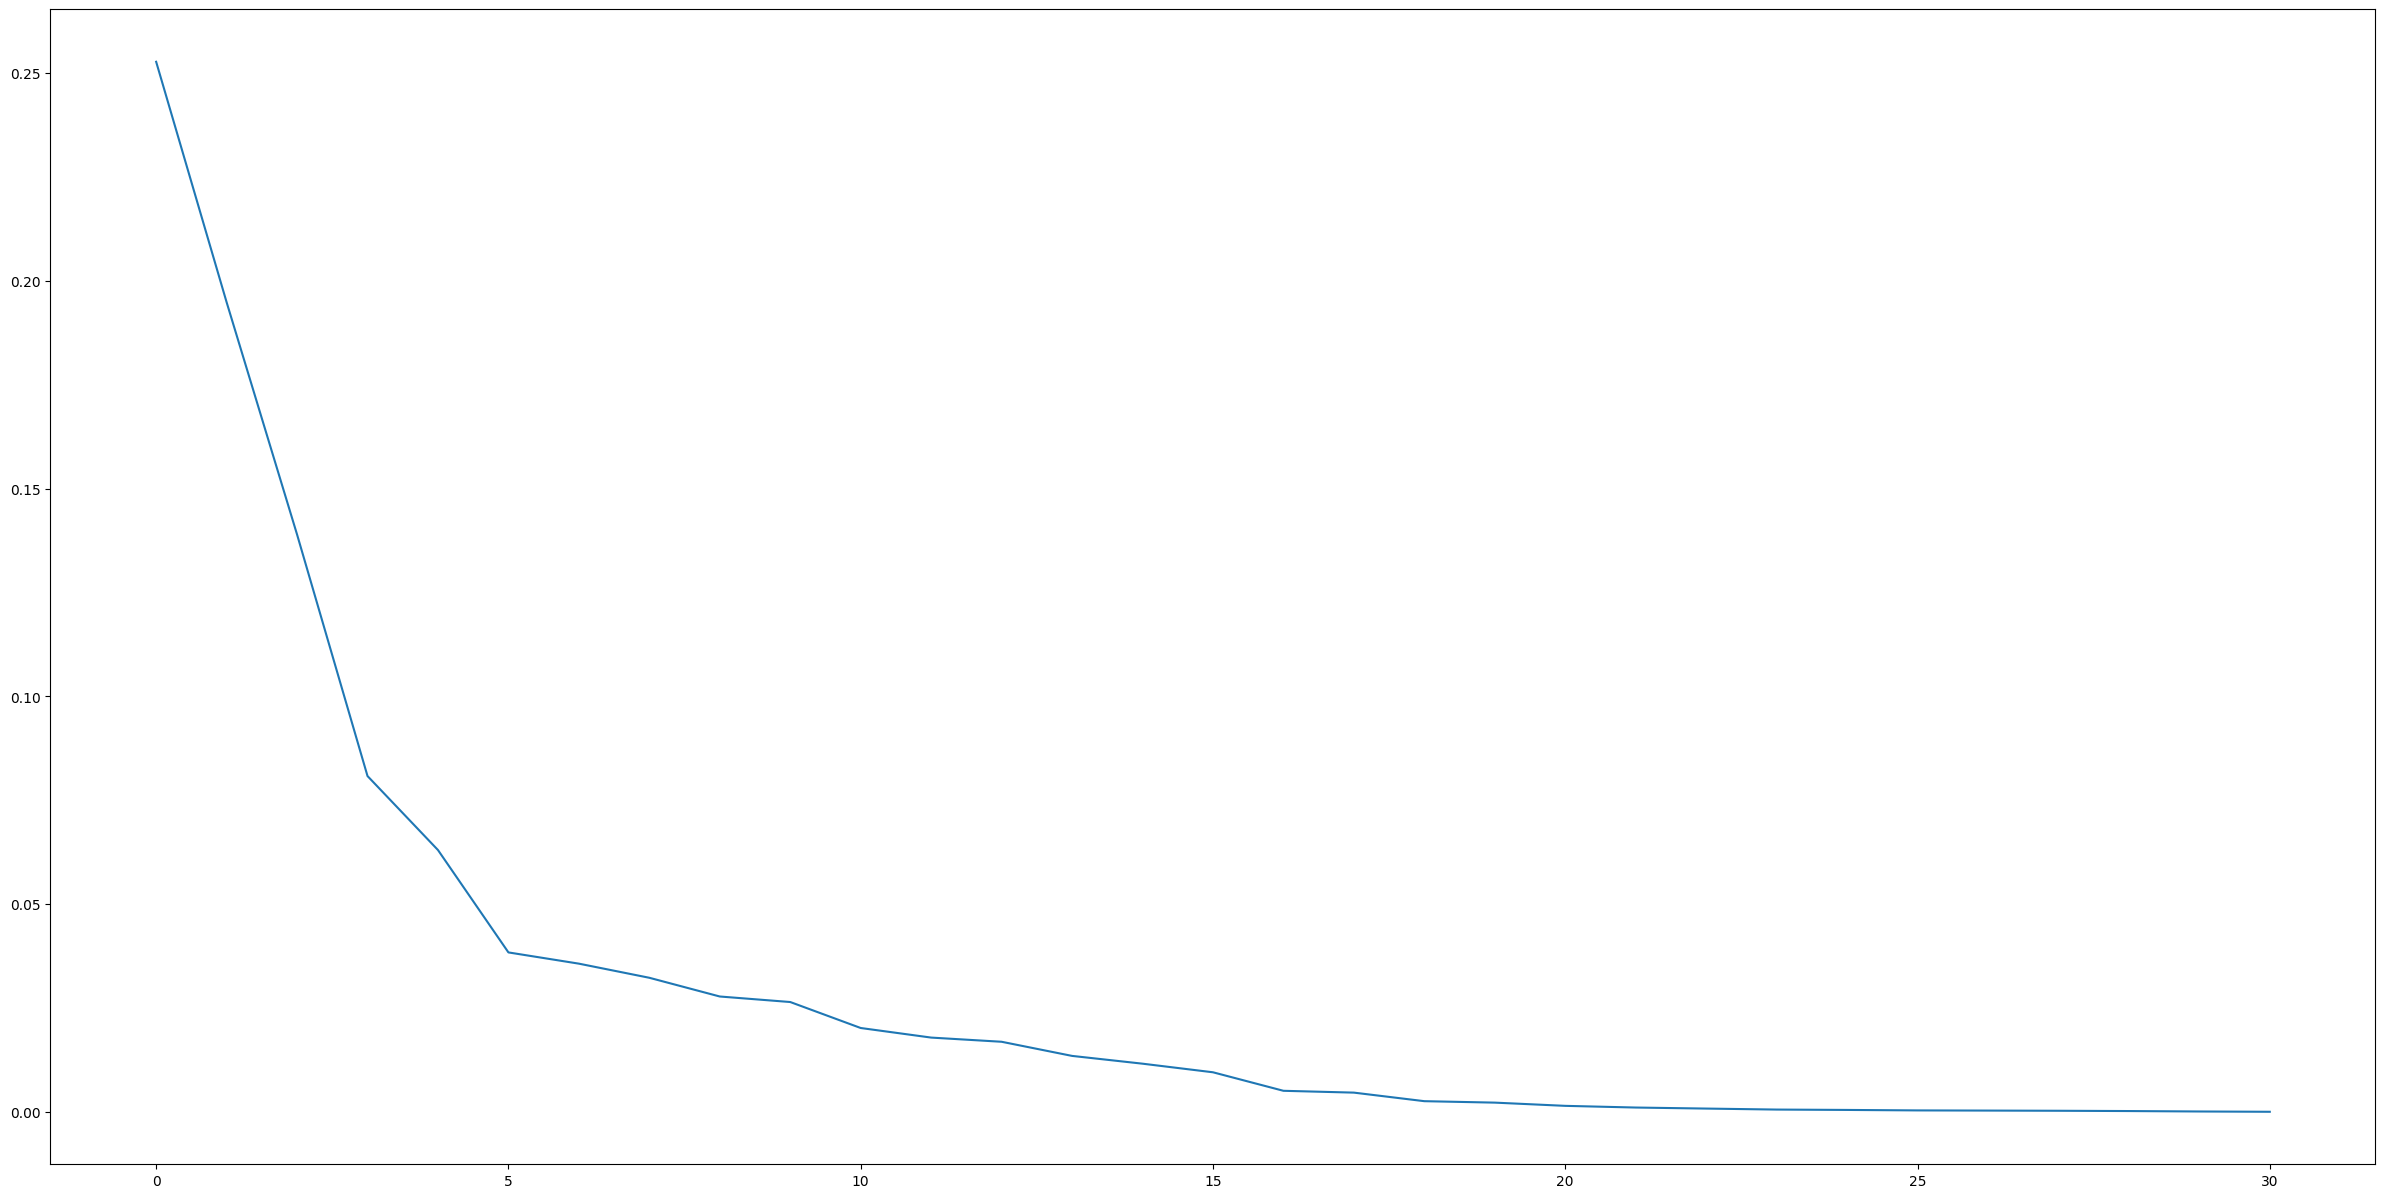

In [7]:
plt.plot(pca.explained_variance_ratio_)

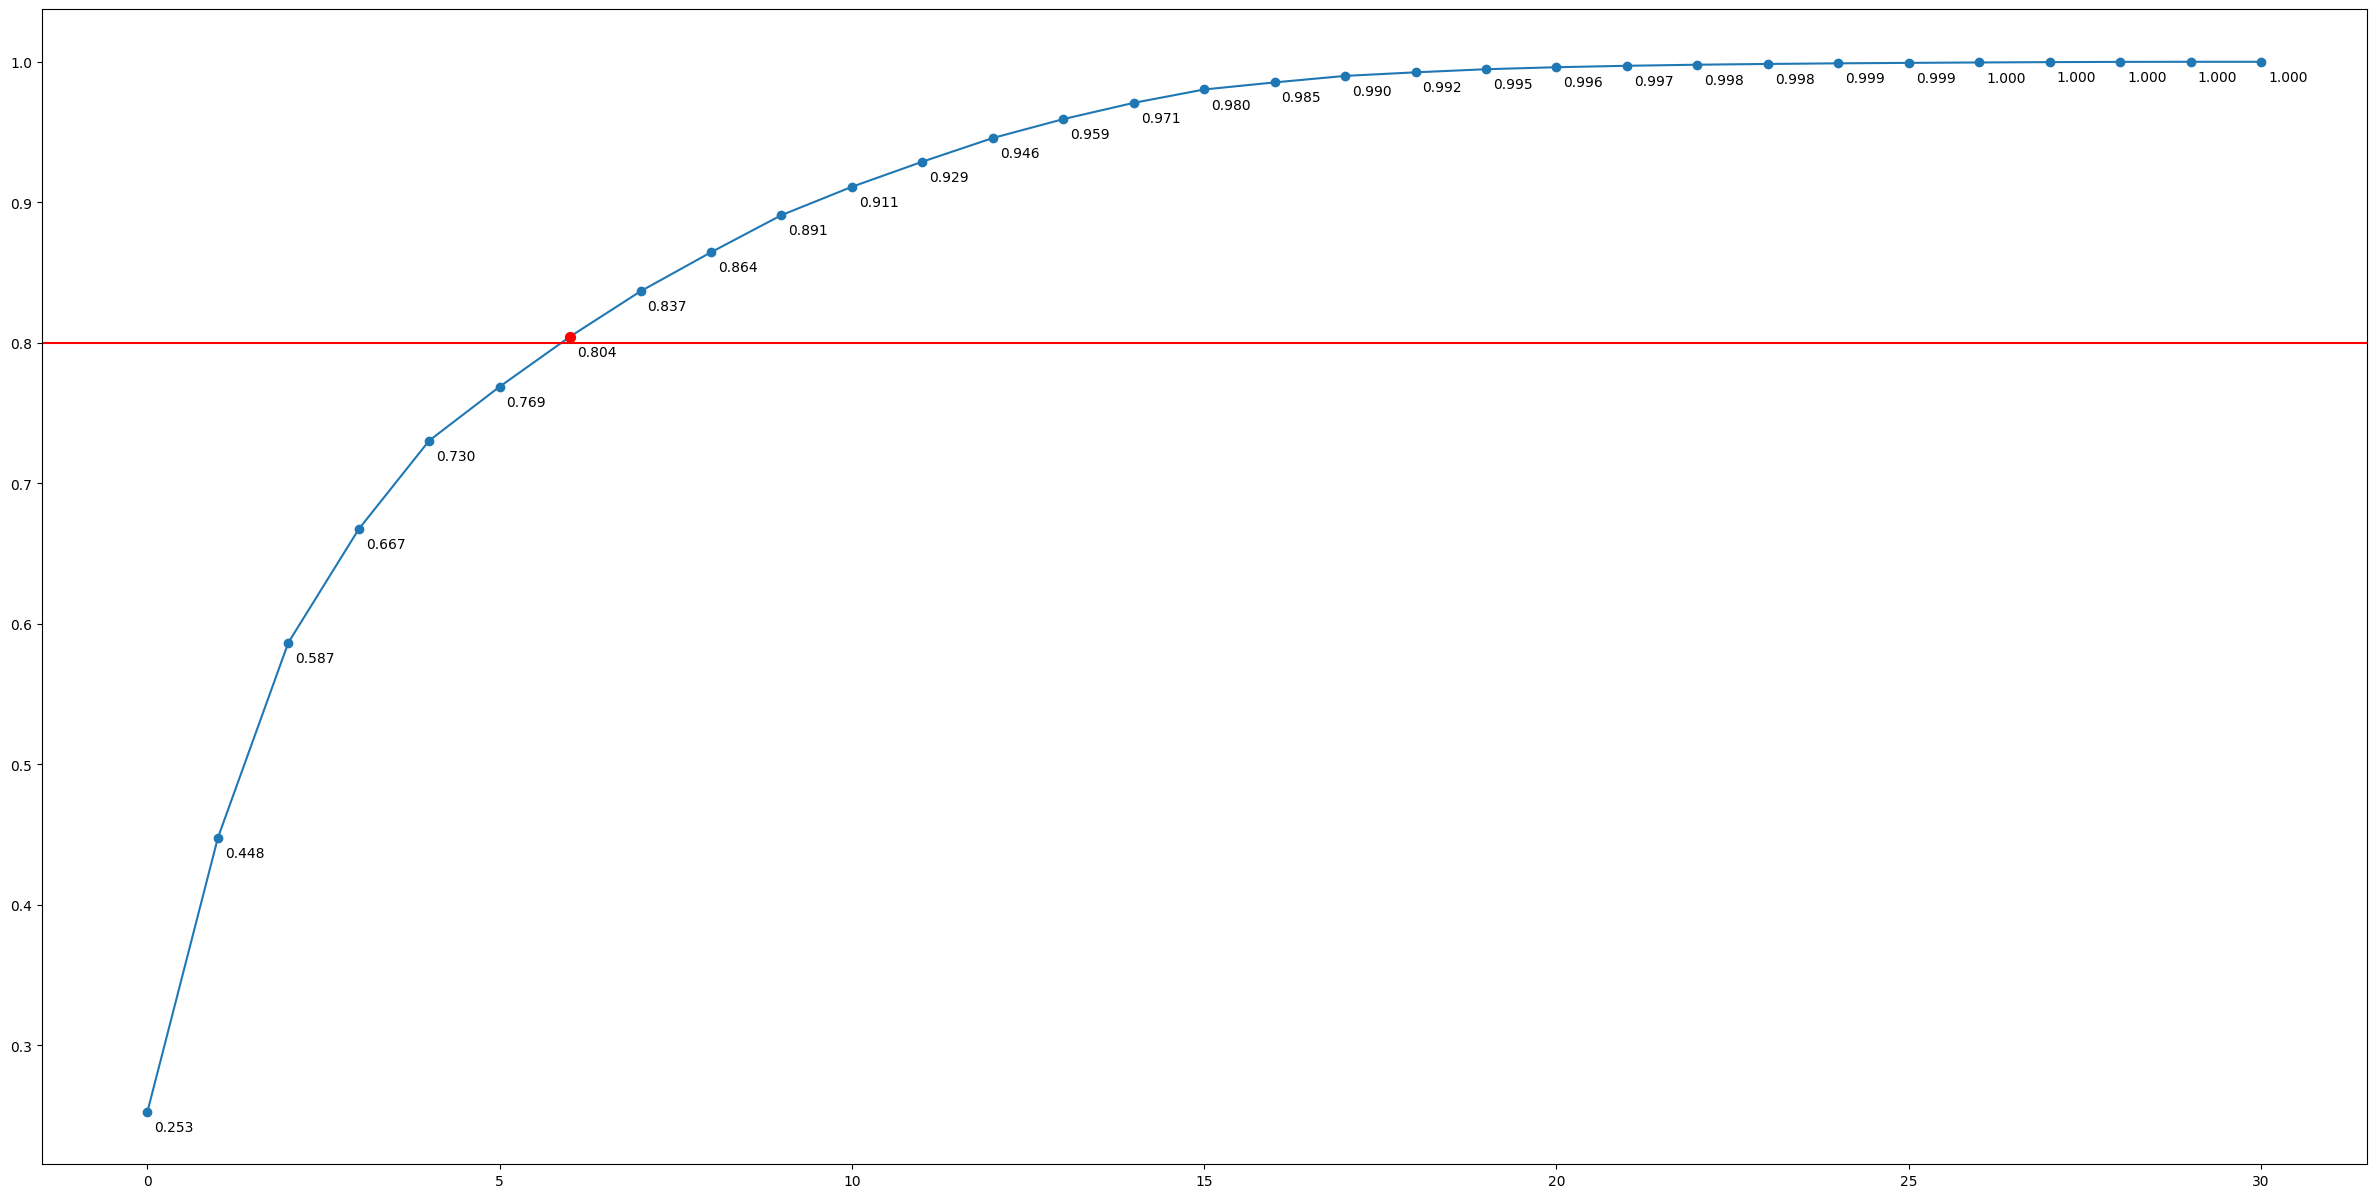

In [8]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.axhline(y = 0.8, color = 'r', linestyle = '-')
plt.scatter(6, pca.explained_variance_ratio_.cumsum()[6], color = 'red', s = 50, zorder = 10)
for i, value in enumerate(pca.explained_variance_ratio_.cumsum()):
    plt.annotate(f'{value:.3f}', (i, value), xytext=(5, -6), textcoords = 'offset points', ha = 'left', va = 'top')
plt.show()

In [9]:
pc_variables = pd.DataFrame(
    pca.components_.T, 
    columns = ['PC' + str(i) for i in range(0,31)], 
    index = people.columns
    )

In [10]:
pc = pd.DataFrame(components, index = people.index, columns = ['PC' + str(i) for i in range(0,31)]).iloc[:,:7]

# Clustering

In the notebook, the cluster analysis is grouped by data inputs - no scaling, principal components, standard scaler, minmax scaler, robust scaler. In each group, *n* methods of scaling were used and they are presented in this order:
1. KMeans
2. Single (Hierarchical)
3. Complete (Hierarchical)
4. Ward (Hierarchical)
5. Average (Hierarchical)
6. Meanshift [*if applied*]

In each application, it was chosen the best solution (from our perspective). In the situations that solutions of different number of clusters were compared the sacrificed ones were put as comment as well as the cluster comparision between them, in case that one would like to see the differences.

## No scaling

In [11]:
plot_inertia_and_silhouette(people_no_scl)

In [ ]:
# kmeans = KMeans(n_clusters = 4, random_state = 0).fit(people_no_scl)
# people['no_kmeans4'] = kmeans.predict(people_no_scl)

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(people_no_scl)
people['no_kmeans5'] = kmeans.predict(people_no_scl)

In [ ]:
# clusters_comparison(people, 'no_kmeans4', 'no_kmeans5')

In [ ]:
groupby_mean(people, 'no_kmeans5')

no_kmeans5                                        0             1  \
customer_gender                            0.507169      0.500210   
customer_age                              52.636580     56.219563   
customer_education                         0.492014      0.701511   
kids_home                                  0.871332      0.997901   
teens_home                                 0.395439      0.271620   
latitude                                  38.745949     38.747749   
longitude                                 -9.158924     -9.157703   
customer_loyalty                           0.046728      0.599916   
typical_hour                              11.361117     11.914568   
distinct_stores_visited                    8.560137      7.999580   
total_distinct_products                  272.170270   4011.462636   
percentage_of_products_bought_promotion    0.240281      0.149955   
number_complaints                          0.656563      1.551008   
spend_groceries                          578.300201  14993.307935   
spend_electronics                        129.611916    199.970403   
spend_vegetables                         690.863086    799.560034   
spend_nonalcohol_drinks                  188.502414    900.786104   
spend_alcohol_drinks                     220.468984    599.145886   
spend_meat                                94.523141   1501.016583   
spend_fish                                93.892059   1498.781276   
spend_hygiene                             67.558057    199.985306   
spend_videogames                          62.236015     50.012804   
percentage_spend_groceries                 0.245719      0.722259   
percentage_spend_electronics               0.048040      0.009665   
percentage_spend_vegetables                0.291181      0.038626   
percentage_spend_nonalcohol_drinks         0.111740      0.043512   
percentage_spend_alcohol_drinks            0.134898      0.028935   
percentage_spend_meat                      0.054499      0.072525   
percentage_spend_fish                      0.054167      0.072418   
percentage_spend_hygiene                   0.033056      0.009642   
percentage_spend_videogames                0.026700      0.002417   

no_kmeans5                                         2            3            4  
customer_gender                             0.490317     0.505857     0.499893  
customer_age                               29.517606    56.326247    56.162846  
customer_education                          1.582746     1.008894     0.995715  
kids_home                                   0.162852     0.689588     3.078852  
teens_home                                  0.000000     0.068547     1.811656  
latitude                                   38.749198    38.747749    38.749548  
longitude                                  -9.156626    -9.157489    -9.157408  
customer_loyalty                            0.199824     0.100000     0.299979  
typical_hour                               18.956426    20.951844    17.401971  
distinct_stores_visited                     3.009683     1.992625     3.007285  
total_distinct_products                   502.506162    99.785249  2001.371759  
percentage_of_products_bought_promotion     0.149835     0.100002     0.200119  
number_complaints                           0.018486     0.500000     0.933576  
spend_groceries                          6998.608715   200.406291  4997.018856  
spend_electronics                        1002.705986  4999.557484   200.006642  
spend_vegetables                          402.549736    20.033623   602.098779  
spend_nonalcohol_drinks                   400.469190  1500.946855   900.787872  
spend_alcohol_drinks                      402.982394   499.866161   500.900364  
spend_meat                                699.633363    57.739913  1100.662738  
spend_fish                                699.194542    58.946421  1101.494750  
spend_hygiene                             200.338908    49.912148   500.748018  
spend_vid

gamers | spenders | parents* | young adults* | others

---

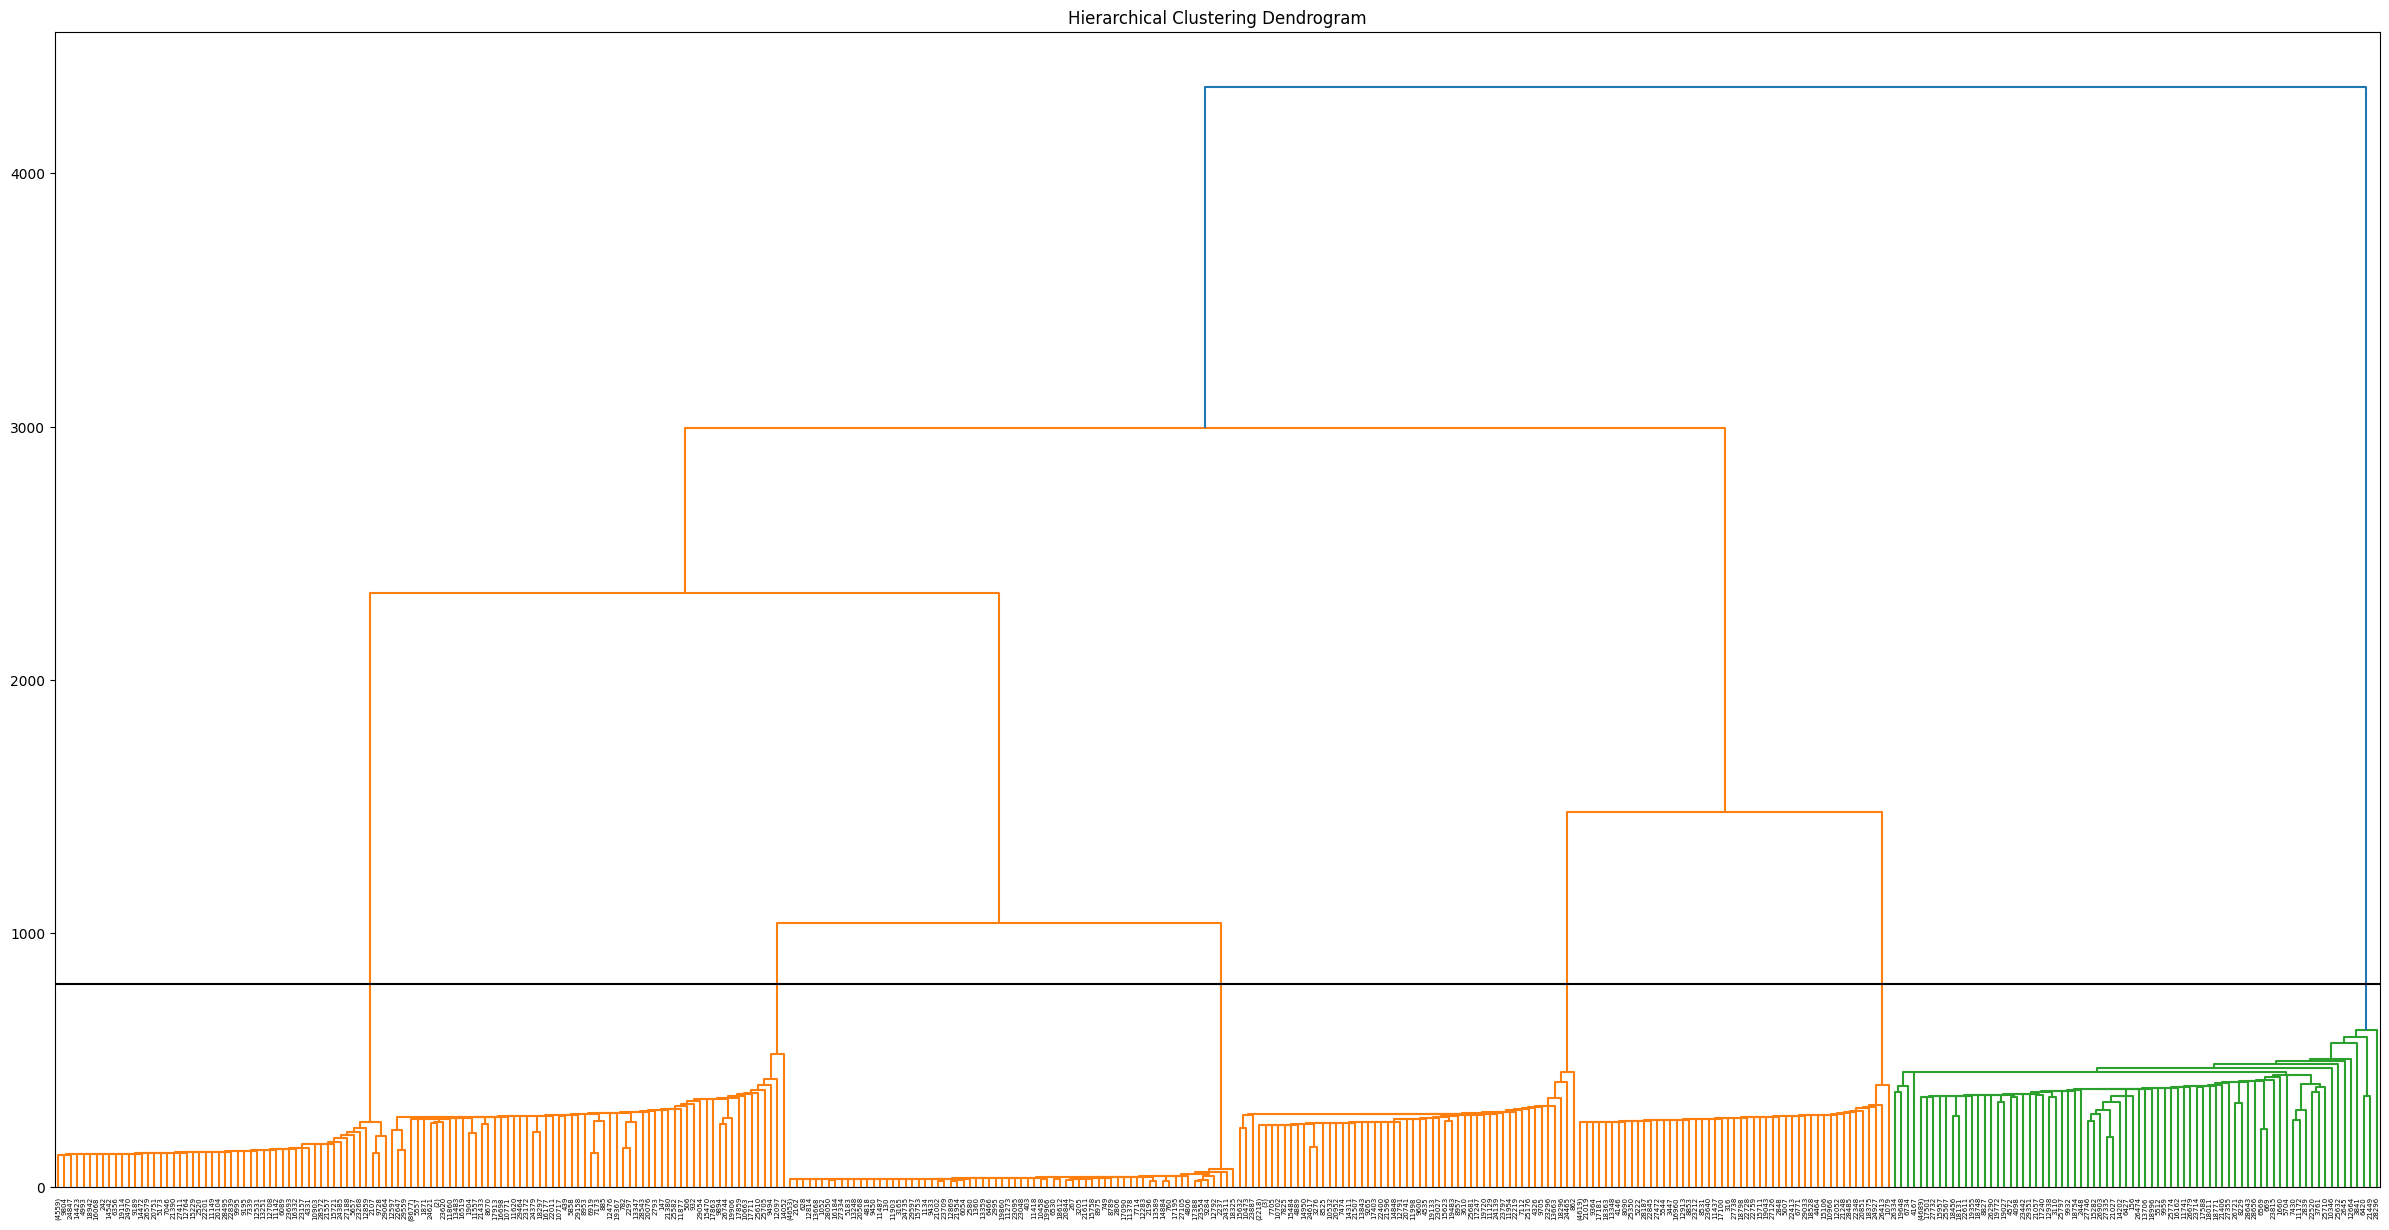

In [ ]:
plot_dendrogram(people_no_scl, 'single', cut_line = 800)

In [ ]:
people['no_single6'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 6
    ).fit_predict(people_no_scl)

In [ ]:
clusters_comparison(people, 'no_single6', 'no_kmeans5')

no_kmeans5 0 Cluster  no_kmeans5 1 Cluster  \
no_single6 0 Cluster                     0                  4764   
no_single6 1 Cluster                     0                     0   
no_single6 2 Cluster                  8739                     0   
no_single6 3 Cluster                     0                     0   
no_single6 4 Cluster                  4722                     0   
no_single6 5 Cluster                     0                     0   

                      no_kmeans5 2 Cluster  no_kmeans5 3 Cluster  \
no_single6 0 Cluster                     0                     0   
no_single6 1 Cluster                  2272                     0   
no_single6 2 Cluster                     0                     0   
no_single6 3 Cluster                     0                  4610   
no_single6 4 Cluster                     0                     0   
no_single6 5 Cluster                     0                     0   

                      no_kmeans5 4 Cluster  
no_single6 0 Cluster                     0  
no_single6 1 Cluster                     0  
no_single6 2 Cluster                     0  
no_single6 3 Cluster                     0  
no_single6 4 Cluster                     0  
no_single6 5 Cluster                  4667

In [ ]:
groupby_mean(people, 'no_single6')

no_single6                                          0            1  \
customer_gender                              0.500210     0.490317   
customer_age                                56.219563    29.517606   
customer_education                           0.701511     1.582746   
kids_home                                    0.997901     0.162852   
teens_home                                   0.271620     0.000000   
latitude                                    38.747749    38.749198   
longitude                                   -9.157703    -9.156626   
customer_loyalty                             0.599916     0.199824   
typical_hour                                11.914568    18.956426   
distinct_stores_visited                      7.999580     3.009683   
total_distinct_products                   4011.462636   502.506162   
percentage_of_products_bought_promotion      0.149955     0.149835   
number_complaints                            1.551008     0.018486   
spend_groceries                          14993.307935  6998.608715   
spend_electronics                          199.970403  1002.705986   
spend_vegetables                           799.560034   402.549736   
spend_nonalcohol_drinks                    900.786104   400.469190   
spend_alcohol_drinks                       599.145886   402.982394   
spend_meat                                1501.016583   699.633363   
spend_fish                                1498.781276   699.194542   
spend_hygiene                              199.985306   200.338908   
spend_videogames                            50.012804   502.893926   
percentage_spend_groceries                   0.722259     0.618400   
percentage_spend_electronics                 0.009665     0.088581   
percentage_spend_vegetables                  0.038626     0.035662   
percentage_spend_nonalcohol_drinks           0.043512     0.035484   
percentage_spend_alcohol_drinks              0.028935     0.035709   
percentage_spend_meat                        0.072525     0.062012   
percentage_spend_fish                        0.072418     0.061959   
percentage_spend_hygiene                     0.009642     0.017687   
percentage_spend_videogames                  0.002417     0.044507   

no_single6                                        2            3            4  \
customer_gender                            0.505893     0.505857     0.509530   
customer_age                              50.829500    56.326247    55.980940   
customer_education                         0.213411     1.008894     1.007624   
kids_home                                  0.715070     0.689588     1.160525   
teens_home                                 0.192242     0.068547     0.771495   
latitude                                  38.744499    38.747749    38.748634   
longitude                                 -9.159860    -9.157489    -9.157192   
customer_loyalty                           0.044971     0.100000     0.049979   
typical_hour                              12.102758    20.951844     9.988564   
distinct_stores_visited                   12.104703     1.992625     2.000212   
total_distinct_products                  311.323950    99.785249   199.708598   
percentage_of_products_bought_promotion    0.343103     0.100002     0.049988   
number_complaints                          0.843346     0.500000     0.310885   
spend_groceries                          351.763474   200.406291   997.551461   
spend_electronics                        172.609337  4999.557484    50.036637   
spend_vegetables                         253.797917    20.033623  1499.739094   
spend_nonalcohol_drinks                  279.547545  1500.946855    20.005294   
spend_alcohol_drinks                     328.726170   499.866161    20.117535   
spend_meat                               145.597437    57.739913     0.000000   
spend_fish                               144.625358    58.946421     0.000000   
spend_hygiene                             50.010642    49.

gamers | spenders | parents | young adults | veggies | others

---

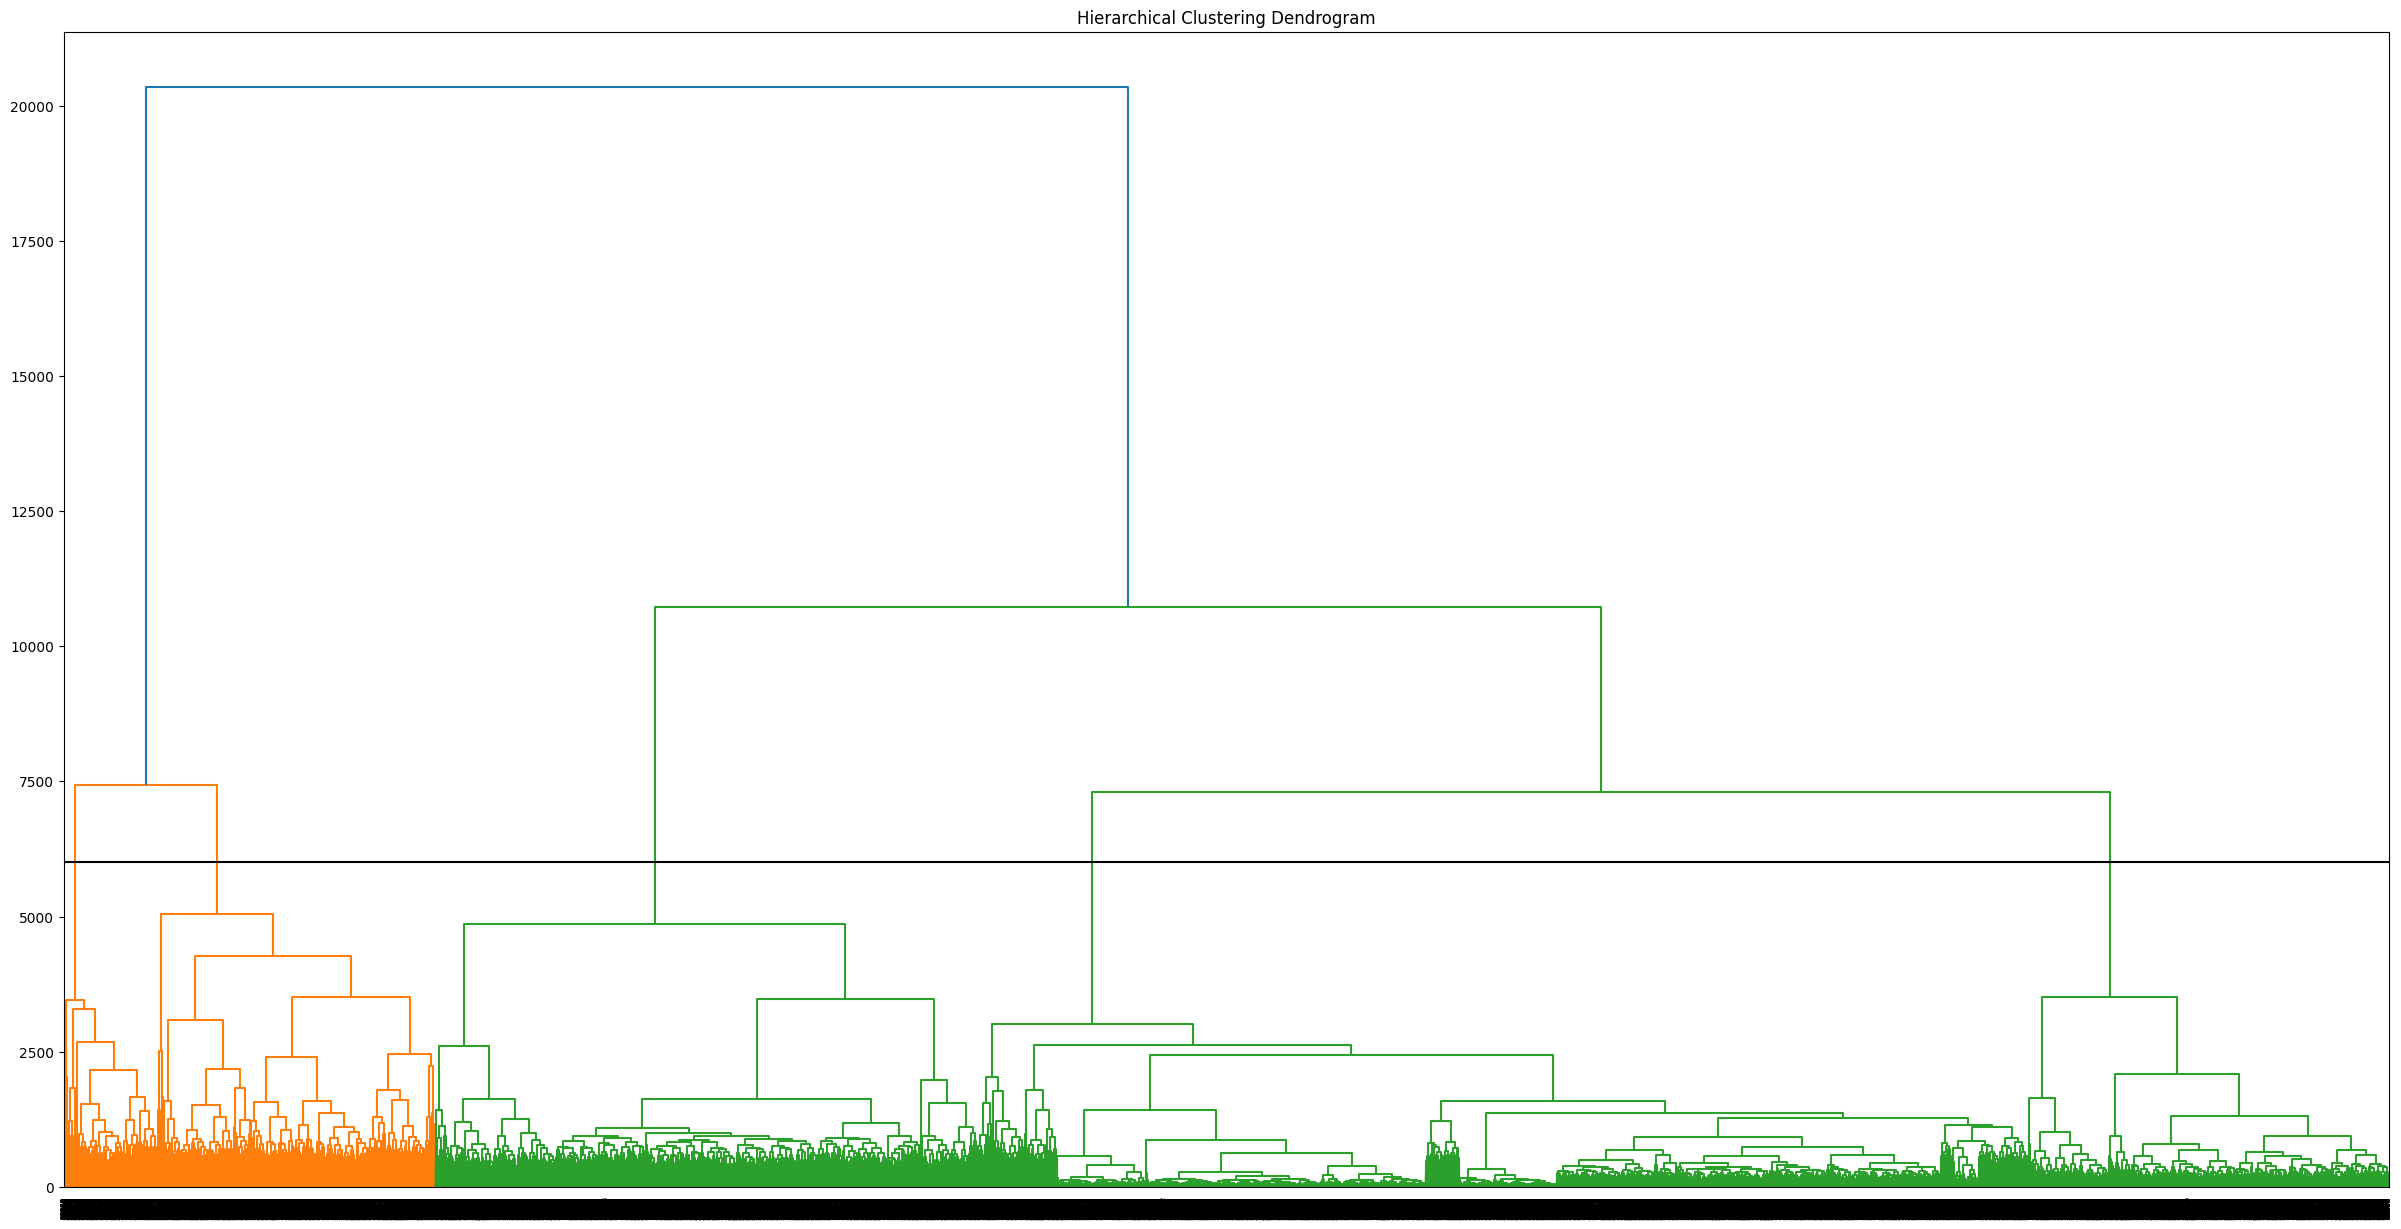

In [ ]:
plot_dendrogram(people_no_scl, 'complete', cut_line = 6000)

In [ ]:
people['no_complete5'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 5
    ).fit_predict(people_no_scl)

In [ ]:
clusters_comparison(people, 'no_single6', 'no_complete5')

no_complete5 0 Cluster  no_complete5 1 Cluster  \
no_single6 0 Cluster                    3565                       0   
no_single6 1 Cluster                       0                       0   
no_single6 2 Cluster                       0                       0   
no_single6 3 Cluster                       0                    4610   
no_single6 4 Cluster                       0                       0   
no_single6 5 Cluster                       0                       0   

                      no_complete5 2 Cluster  no_complete5 3 Cluster  \
no_single6 0 Cluster                       0                    1199   
no_single6 1 Cluster                    2272                       0   
no_single6 2 Cluster                       0                       0   
no_single6 3 Cluster                       0                       0   
no_single6 4 Cluster                       0                       0   
no_single6 5 Cluster                    4667                       0   

                      no_complete5 4 Cluster  
no_single6 0 Cluster                       0  
no_single6 1 Cluster                       0  
no_single6 2 Cluster                    8739  
no_single6 3 Cluster                       0  
no_single6 4 Cluster                    4722  
no_single6 5 Cluster                       0

In [ ]:
groupby_mean(people, 'no_complete5')

no_complete5                                        0            1  \
customer_gender                              0.497335     0.505857   
customer_age                                56.185414    56.326247   
customer_education                           0.706592     1.008894   
kids_home                                    0.997475     0.689588   
teens_home                                   0.273492     0.068547   
latitude                                    38.747987    38.747749   
longitude                                   -9.157623    -9.157489   
customer_loyalty                             0.605330     0.100000   
typical_hour                                11.947826    20.951844   
distinct_stores_visited                      8.008135     1.992625   
total_distinct_products                   3987.743058    99.785249   
percentage_of_products_bought_promotion      0.149911     0.100002   
number_complaints                            1.561010     0.500000   
spend_groceries                          15406.430575   200.406291   
spend_electronics                          199.885273  4999.557484   
spend_vegetables                           798.404769    20.033623   
spend_nonalcohol_drinks                    901.280505  1500.946855   
spend_alcohol_drinks                       599.529313   499.866161   
spend_meat                                1501.975877    57.739913   
spend_fish                                1498.952875    58.946421   
spend_hygiene                              200.293408    49.912148   
spend_videogames                            50.005891  2002.197397   
percentage_spend_groceries                   0.727937     0.021404   
percentage_spend_electronics                 0.009461     0.531238   
percentage_spend_vegetables                  0.037774     0.002140   
percentage_spend_nonalcohol_drinks           0.042638     0.160321   
percentage_spend_alcohol_drinks              0.028357     0.053375   
percentage_spend_meat                        0.071075     0.006150   
percentage_spend_fish                        0.070931     0.006280   
percentage_spend_hygiene                     0.009459     0.005326   
percentage_spend_videogames                  0.002367     0.213766   

no_complete5                                       2             3           4  
customer_gender                             0.496757      0.508757    0.507169  
customer_age                               47.438536     56.321101   52.636580  
customer_education                          1.187923      0.686405    0.492014  
kids_home                                   2.124081      0.999166    0.871332  
teens_home                                  1.218475      0.266055    0.395439  
latitude                                   38.749434     38.747038   38.745949  
longitude                                  -9.157152     -9.157940   -9.158924  
customer_loyalty                            0.267185      0.583820    0.046728  
typical_hour                               17.910938     11.815680   11.361117  
distinct_stores_visited                     3.008070      7.974145    8.560137  
total_distinct_products                  1510.606139   4081.988324  272.170270  
percentage_of_products_bought_promotion     0.183655      0.150086    0.240281  
number_complaints                           0.633953      1.521268    0.656563  
spend_groceries                          5652.388817  13764.965805  578.300201  
spend_electronics                         462.830235    200.223520  129.611916  
spend_vegetables                          536.761493    802.994996  690.863086  
spend_nonalcohol_drinks                   736.971177    899.316097  188.502414  
spend_alcohol_drinks                      468.839602    598.005838  220.468984  
spend_meat                                969.355815   1498.164304   94.523141  
spend_fish                                969.771725   1498.271059   93.892059  
spend_hygiene                             402.386655    19

gamers | +spenders | -spenders | parents & young adults | veggies & others

---

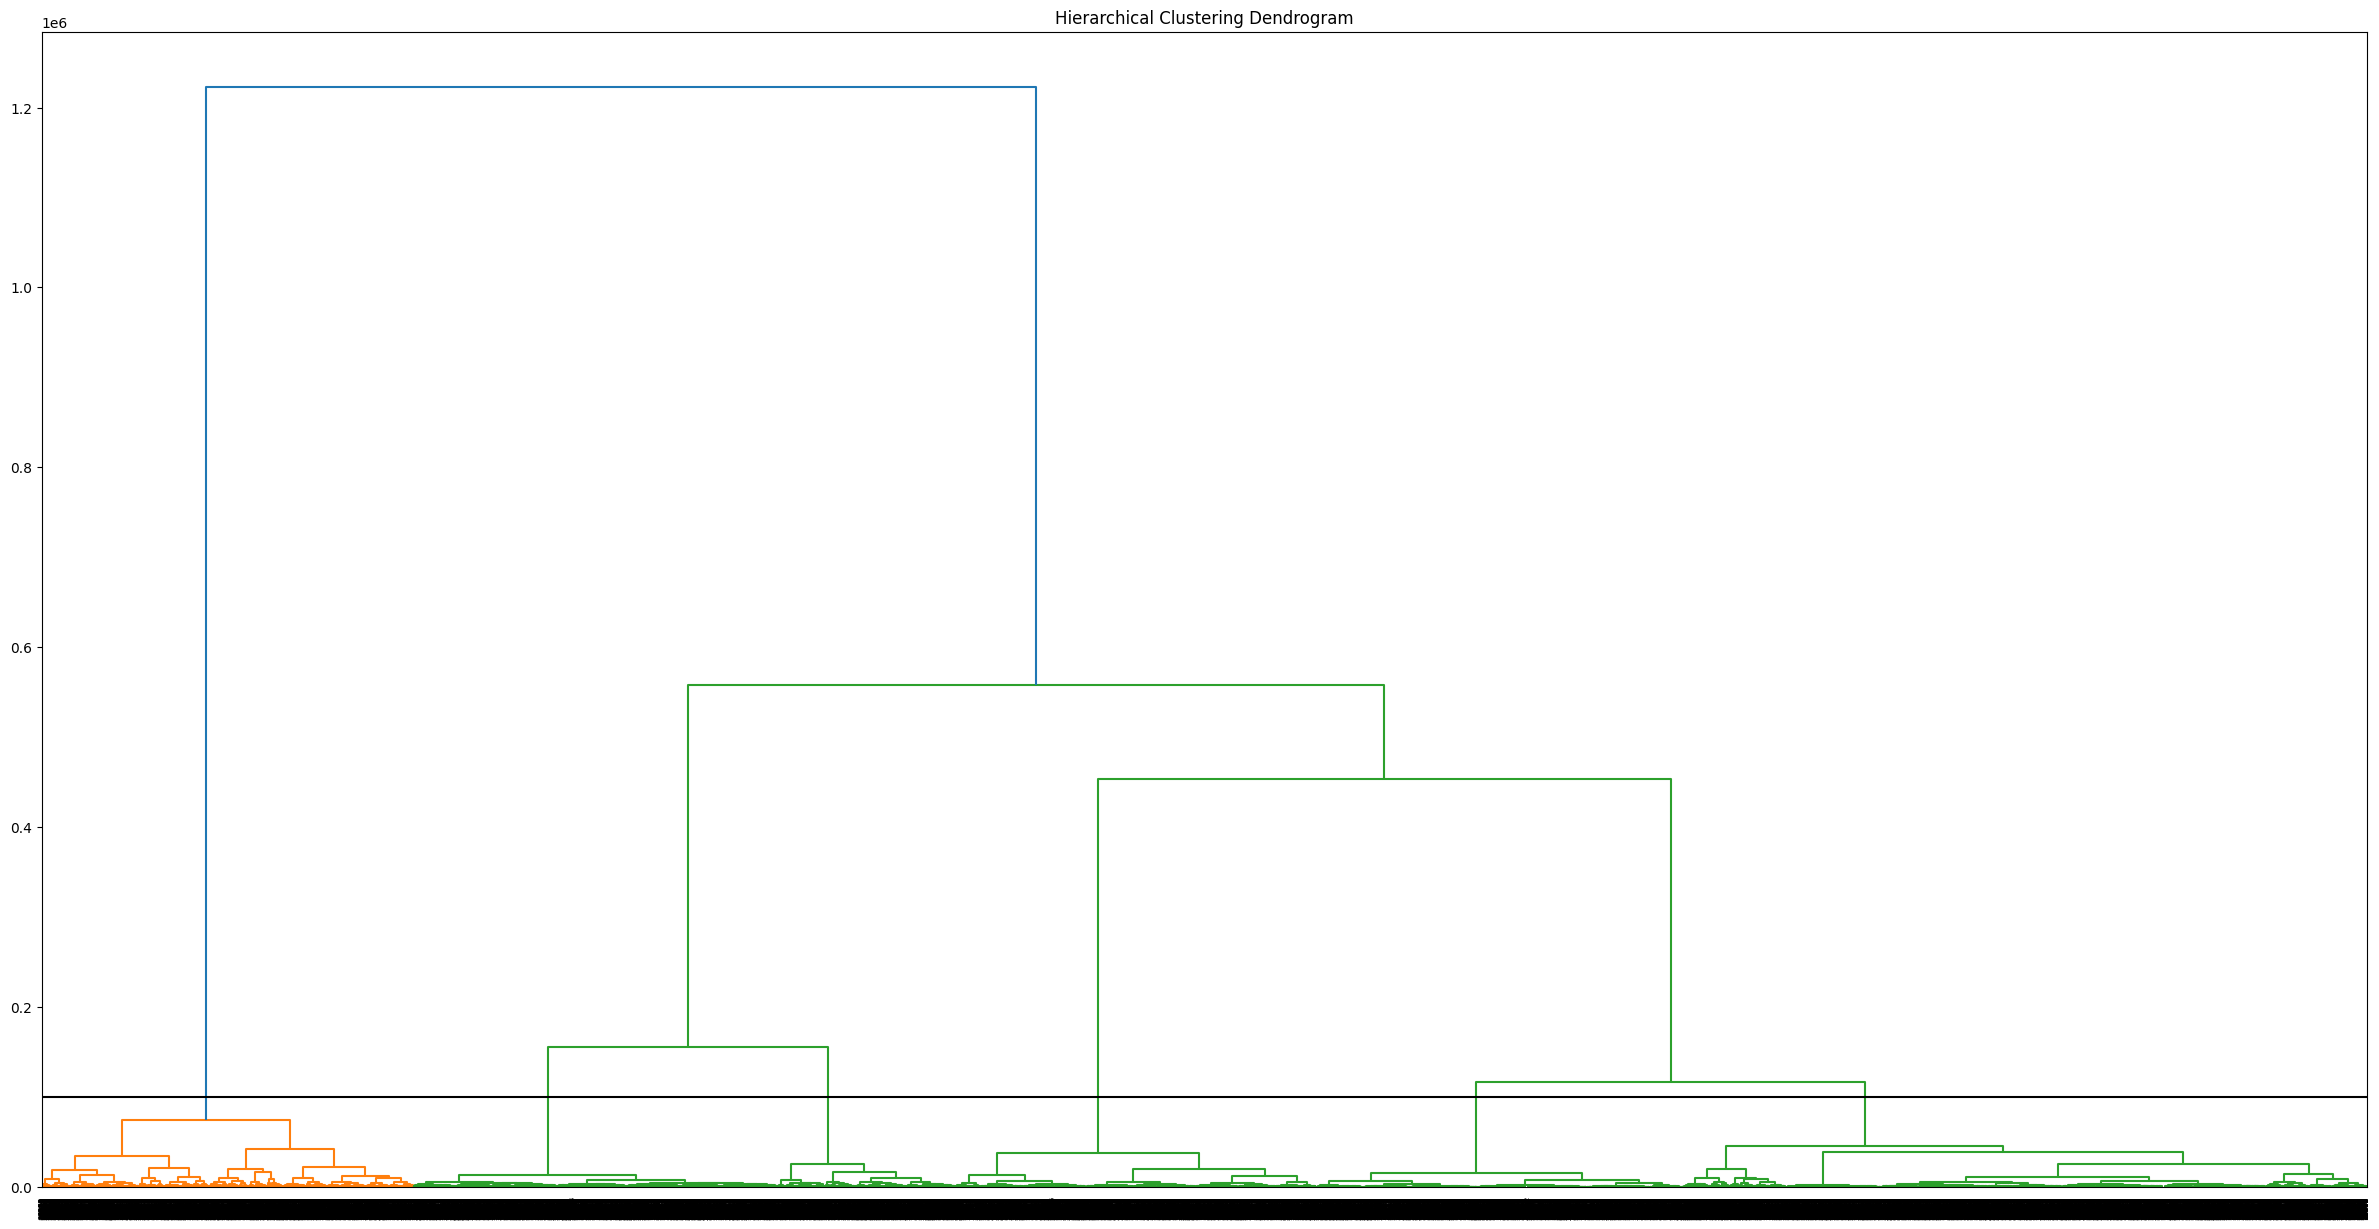

In [ ]:
plot_dendrogram(people_no_scl, 'ward', cut_line = 100000)

In [ ]:
# people['no_ward4'] = AgglomerativeClustering(
#     linkage = 'ward', n_clusters = 4
#     ).fit_predict(people_no_scl)

# people['no_ward5'] = AgglomerativeClustering(
#     linkage = 'ward', n_clusters = 5
#     ).fit_predict(people_no_scl)

people['no_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(people_no_scl)

In [ ]:
# clusters_comparison(people, 'no_ward4', 'no_ward5')
# clusters_comparison(people, 'no_ward5', 'no_ward6')

In [ ]:
clusters_comparison(people, 'no_single6', 'no_ward6')

no_ward6 0 Cluster  no_ward6 1 Cluster  \
no_single6 0 Cluster                4764                   0   
no_single6 1 Cluster                   0                   0   
no_single6 2 Cluster                   0                8739   
no_single6 3 Cluster                   0                   0   
no_single6 4 Cluster                   0                   0   
no_single6 5 Cluster                   0                   0   

                      no_ward6 2 Cluster  no_ward6 3 Cluster  \
no_single6 0 Cluster                   0                   0   
no_single6 1 Cluster                2272                   0   
no_single6 2 Cluster                   0                   0   
no_single6 3 Cluster                   0                4610   
no_single6 4 Cluster                   0                   0   
no_single6 5 Cluster                   0                   0   

                      no_ward6 4 Cluster  no_ward6 5 Cluster  
no_single6 0 Cluster                   0                   0  
no_single6 1 Cluster                   0                   0  
no_single6 2 Cluster                   0                   0  
no_single6 3 Cluster                   0                   0  
no_single6 4 Cluster                   0                4722  
no_single6 5 Cluster                4667                   0

In [ ]:
groupby_mean(people, 'no_ward6')

no_ward6                                            0           1  \
customer_gender                              0.500210    0.505893   
customer_age                                56.219563   50.829500   
customer_education                           0.701511    0.213411   
kids_home                                    0.997901    0.715070   
teens_home                                   0.271620    0.192242   
latitude                                    38.747749   38.744499   
longitude                                   -9.157703   -9.159860   
customer_loyalty                             0.599916    0.044971   
typical_hour                                11.914568   12.102758   
distinct_stores_visited                      7.999580   12.104703   
total_distinct_products                   4011.462636  311.323950   
percentage_of_products_bought_promotion      0.149955    0.343103   
number_complaints                            1.551008    0.843346   
spend_groceries                          14993.307935  351.763474   
spend_electronics                          199.970403  172.609337   
spend_vegetables                           799.560034  253.797917   
spend_nonalcohol_drinks                    900.786104  279.547545   
spend_alcohol_drinks                       599.145886  328.726170   
spend_meat                                1501.016583  145.597437   
spend_fish                                1498.781276  144.625358   
spend_hygiene                              199.985306   50.010642   
spend_videogames                            50.012804   68.885570   
percentage_spend_groceries                   0.722259    0.183436   
percentage_spend_electronics                 0.009665    0.064067   
percentage_spend_vegetables                  0.038626    0.150879   
percentage_spend_nonalcohol_drinks           0.043512    0.168149   
percentage_spend_alcohol_drinks              0.028935    0.203797   
percentage_spend_meat                        0.072525    0.083947   
percentage_spend_fish                        0.072418    0.083435   
percentage_spend_hygiene                     0.009642    0.031071   
percentage_spend_videogames                  0.002417    0.031220   

no_ward6                                           2            3  \
customer_gender                             0.490317     0.505857   
customer_age                               29.517606    56.326247   
customer_education                          1.582746     1.008894   
kids_home                                   0.162852     0.689588   
teens_home                                  0.000000     0.068547   
latitude                                   38.749198    38.747749   
longitude                                  -9.156626    -9.157489   
customer_loyalty                            0.199824     0.100000   
typical_hour                               18.956426    20.951844   
distinct_stores_visited                     3.009683     1.992625   
total_distinct_products                   502.506162    99.785249   
percentage_of_products_bought_promotion     0.149835     0.100002   
number_complaints                           0.018486     0.500000   
spend_groceries                          6998.608715   200.406291   
spend_electronics                        1002.705986  4999.557484   
spend_vegetables                          402.549736    20.033623   
spend_nonalcohol_drinks                   400.469190  1500.946855   
spend_alcohol_drinks                      402.982394   499.866161   
spend_meat                                699.633363    57.739913   
spend_fish                                699.194542    58.946421   
spend_hygiene                             200.338908    49.912148   
spend_videogames                          502.893926  2002.197397   
percentage_spend_groceries                  0.618400     0.021404   
percentage_spend_electronics                0.088581     0.531238   
percentage_spend_vegetables                 0.035662     0.002140 

gamers | spenders | parents | young adults | veggies | others

---

In [ ]:
plot_dendrogram(people_no_scl, 'average', cut_line = 4000)

KeyboardInterrupt: 

In [ ]:
people['no_average4'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 4
    ).fit_predict(people.iloc[:,:31])

In [ ]:
clusters_comparison(people, 'no_single6', 'no_average4')

no_average4 0 Cluster  no_average4 1 Cluster  \
no_single6 0 Cluster                   4764                      0   
no_single6 1 Cluster                      0                      0   
no_single6 2 Cluster                      0                   8739   
no_single6 3 Cluster                      0                      0   
no_single6 4 Cluster                      0                   4722   
no_single6 5 Cluster                      0                      0   

                      no_average4 2 Cluster  no_average4 3 Cluster  
no_single6 0 Cluster                      0                      0  
no_single6 1 Cluster                   2272                      0  
no_single6 2 Cluster                      0                      0  
no_single6 3 Cluster                      0                   4610  
no_single6 4 Cluster                      0                      0  
no_single6 5 Cluster                   4667                      0

In [ ]:
groupby_mean(people, 'no_average4')

no_average4                                         0           1  \
customer_gender                              0.500210    0.507169   
customer_age                                56.219563   52.636580   
kids_home                                    0.997901    0.871332   
teens_home                                   0.271620    0.395439   
number_complaints                            1.551008    0.656563   
distinct_stores_visited                      7.999580    8.560137   
spend_groceries                          14993.307935  578.300201   
spend_electronics                          199.970403  129.611916   
typical_hour                                11.914568   11.361117   
spend_vegetables                           799.560034  690.863086   
spend_nonalcohol_drinks                    900.786104  188.502414   
spend_alcohol_drinks                       599.145886  220.468984   
spend_meat                                1501.016583   94.523141   
spend_fish                                1498.781276   93.892059   
spend_hygiene                              199.985306   67.558057   
spend_videogames                            50.012804   62.236015   
total_distinct_products                   4011.462636  272.170270   
percentage_of_products_bought_promotion      0.149955    0.240281   
customer_loyalty                             0.599916    0.046728   
latitude                                    38.747749   38.745949   
longitude                                   -9.157703   -9.158924   
percentage_spend_groceries                   0.722259    0.245719   
percentage_spend_electronics                 0.009665    0.048040   
percentage_spend_vegetables                  0.038626    0.291181   
percentage_spend_nonalcohol_drinks           0.043512    0.111740   
percentage_spend_alcohol_drinks              0.028935    0.134898   
percentage_spend_meat                        0.072525    0.054499   
percentage_spend_fish                        0.072418    0.054167   
percentage_spend_hygiene                     0.009642    0.033056   
percentage_spend_videogames                  0.002417    0.026700   
customer_education                           0.701511    0.492014   

no_average4                                        2            3  
customer_gender                             0.496757     0.505857  
customer_age                               47.438536    56.326247  
kids_home                                   2.124081     0.689588  
teens_home                                  1.218475     0.068547  
number_complaints                           0.633953     0.500000  
distinct_stores_visited                     3.008070     1.992625  
spend_groceries                          5652.388817   200.406291  
spend_electronics                         462.830235  4999.557484  
typical_hour                               17.910938    20.951844  
spend_vegetables                          536.761493    20.033623  
spend_nonalcohol_drinks                   736.971177  1500.946855  
spend_alcohol_drinks                      468.839602   499.866161  
spend_meat                                969.355815    57.739913  
spend_fish                                969.771725    58.946421  
spend_hygiene                             402.386655    49.912148  
spend_videogames                          835.691166  2002.197397  
total_distinct_products                  1510.606139    99.785249  
percentage_of_products_bought_promotion     0.183655     0.100002  
customer_loyalty                            0.267185     0.100000  
latitude                                   38.749434    38.747749  
longitude                                  -9.157152    -9.157489  
percentage_spend_groceries                  0.510838     0.021404  
percentage_spend_electronics                0.041352     0.531238  
percentage_spend_vegetables                 0.048803     0.002140  
percentage_spend_nonalcohol_drinks          0.067189     0.160321  
percentage_spend_alcoho

gamers | spenders | young adults & parents | veggies & others

---
---

## PC

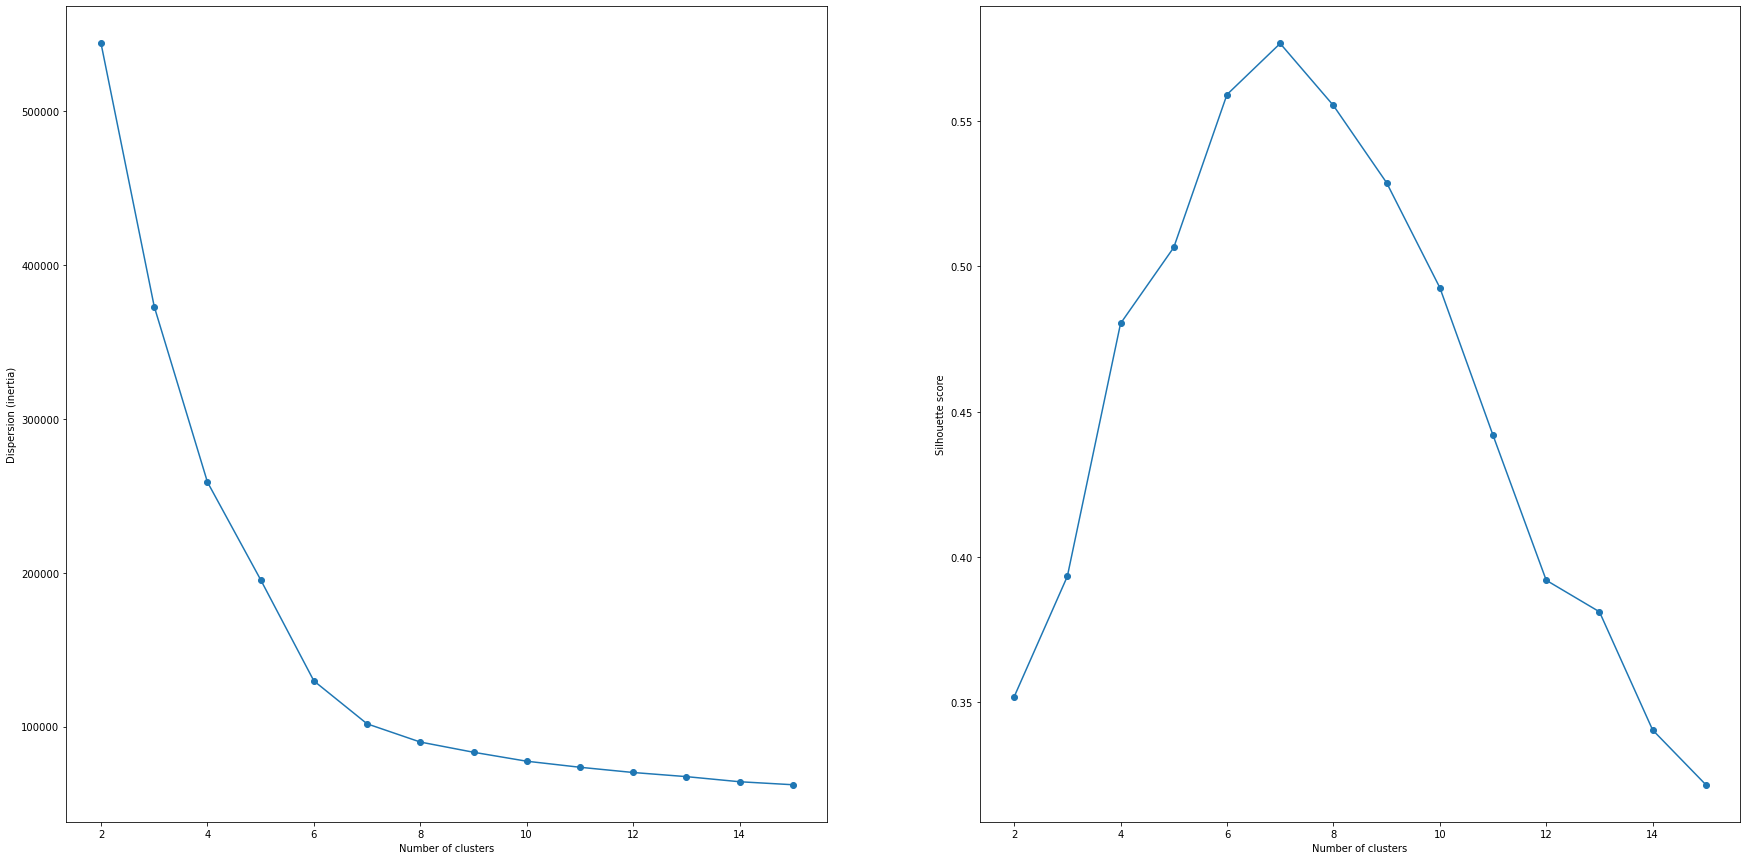

In [ ]:
plot_inertia_and_silhouette(pc)

In [ ]:
# kmeans = KMeans(n_clusters = 7, random_state = 0).fit(pc)
# people['pc_kmeans7'] = kmeans.predict(pc)

kmeans = KMeans(n_clusters = 8, random_state = 0).fit(pc)
people['pc_kmeans8'] = kmeans.predict(pc)

In [ ]:
# clusters_comparison(people, 'cluster_pc_kmeans7', 'cluster_pc_kmeans8')

In [ ]:
clusters_comparison(people, 'no_single6', 'pc_kmeans8')

pc_kmeans8 0 Cluster  pc_kmeans8 1 Cluster  \
no_single6 0 Cluster                     0                  4764   
no_single6 1 Cluster                     0                     0   
no_single6 2 Cluster                     0                     0   
no_single6 3 Cluster                     0                     0   
no_single6 4 Cluster                  4722                     0   
no_single6 5 Cluster                     0                     1   

                      pc_kmeans8 2 Cluster  pc_kmeans8 3 Cluster  \
no_single6 0 Cluster                     0                     0   
no_single6 1 Cluster                     0                     0   
no_single6 2 Cluster                     0                  5002   
no_single6 3 Cluster                  4610                     0   
no_single6 4 Cluster                     0                     0   
no_single6 5 Cluster                     0                     0   

                      pc_kmeans8 4 Cluster  pc_kmeans8 5 Cluster  \
no_single6 0 Cluster                     0                     0   
no_single6 1 Cluster                     0                  2272   
no_single6 2 Cluster                     0                    90   
no_single6 3 Cluster                     0                     0   
no_single6 4 Cluster                     0                     0   
no_single6 5 Cluster                  4646                    20   

                      pc_kmeans8 6 Cluster  pc_kmeans8 7 Cluster  
no_single6 0 Cluster                     0                     0  
no_single6 1 Cluster                     0                     0  
no_single6 2 Cluster                  1248                  2399  
no_single6 3 Cluster                     0                     0  
no_single6 4 Cluster                     0                     0  
no_single6 5 Cluster                     0                     0

In [ ]:
groupby_mean(people, 'pc_kmeans8')

pc_kmeans8                                         0             1  \
customer_gender                             0.509530      0.500315   
customer_age                               55.980940     56.222665   
kids_home                                   1.160525      0.997692   
teens_home                                  0.771495      0.271563   
number_complaints                           0.310885      1.550892   
distinct_stores_visited                     2.000212      7.998531   
spend_groceries                           997.551461  14991.097796   
spend_electronics                          50.036637    199.970409   
typical_hour                                9.988564     11.914795   
spend_vegetables                         1499.739094    799.559496   
spend_nonalcohol_drinks                    20.005294    900.777335   
spend_alcohol_drinks                       20.117535    599.136201   
spend_meat                                  0.000000   1500.920042   
spend_fish                                  0.000000   1498.736621   
spend_hygiene                             100.033037    200.006716   
spend_videogames                           49.929691     50.227072   
total_distinct_products                   199.708598   4011.047429   
percentage_of_products_bought_promotion     0.049988      0.149965   
customer_loyalty                            0.049979      0.600000   
latitude                                   38.748634     38.747747   
longitude                                  -9.157192     -9.157706   
percentage_spend_groceries                  0.360987      0.722196   
percentage_spend_electronics                0.018380      0.009667   
percentage_spend_vegetables                 0.550838      0.038634   
percentage_spend_nonalcohol_drinks          0.007344      0.043520   
percentage_spend_alcohol_drinks             0.007386      0.028940   
percentage_spend_meat                       0.000000      0.072530   
percentage_spend_fish                       0.000000      0.072428   
percentage_spend_hygiene                    0.036729      0.009646   
percentage_spend_videogames                 0.018336      0.002438   
customer_education                          1.007624      0.701574   

pc_kmeans8                                         2           3            4  \
customer_gender                             0.505857    0.509596     0.499354   
customer_age                               56.326247   56.144742    56.219974   
kids_home                                   0.689588    0.991803     3.090185   
teens_home                                  0.068547    0.076969     1.818984   
number_complaints                           0.500000    1.094362     0.933922   
distinct_stores_visited                     1.992625   19.694122     3.007533   
spend_groceries                           200.406291  300.988804  4997.470512   
spend_electronics                        4999.557484   19.840664   200.010116   
typical_hour                               20.951844    9.006997    17.402712   
spend_vegetables                           20.033623  296.986805   602.031210   
spend_nonalcohol_drinks                  1500.946855  297.182327   900.740207   
spend_alcohol_drinks                      499.866161  200.592563   500.697805   
spend_meat                                 57.739913  149.523591  1100.648084   
spend_fish                                 58.946421  148.024190  1101.607189   
spend_hygiene                              49.912148   50.025390   501.368704   
spend_videogames                         2002.197397    4.919032   997.690702   
total_distinct_products                    99.785249  493.105558  2001.482566   
percentage_of_products_bought_promotion     0.100002    0.495116     0.200122   
customer_loyalty                            0.100000    0.050180     0.297891   
latitude                                   38.747749   38.747820    38.749538   
longitude                                  -9.157489   -9.

gamers | spenders(+1) | veggies | parents(?) | young adults(??) | promo hunters(??) | alcoholics | low standards(??)

---

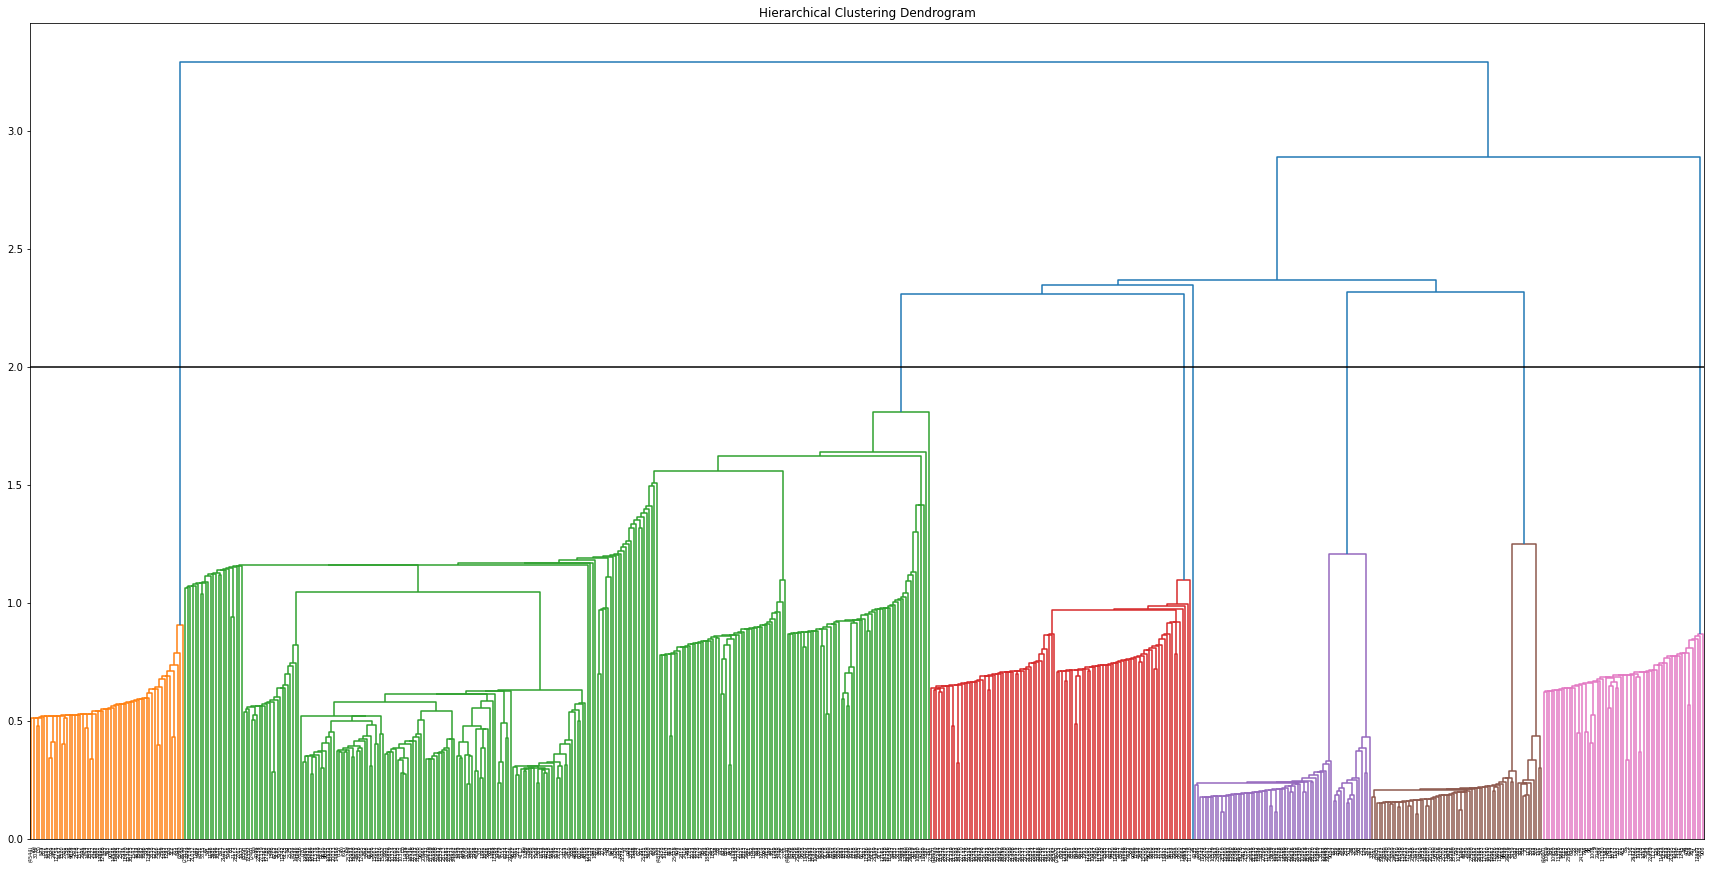

In [ ]:
plot_dendrogram(pc, 'single', cut_line = 2)

In [ ]:
people['pc_single7'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 7
    ).fit_predict(pc)

In [ ]:
clusters_comparison(people, 'pc_single7', 'no_single6')

no_single6 0 Cluster  no_single6 1 Cluster  \
pc_single7 0 Cluster                     0                  2272   
pc_single7 1 Cluster                     0                     0   
pc_single7 2 Cluster                     0                     0   
pc_single7 3 Cluster                     0                     0   
pc_single7 4 Cluster                     0                     0   
pc_single7 5 Cluster                     0                     0   
pc_single7 6 Cluster                  4764                     0   

                      no_single6 2 Cluster  no_single6 3 Cluster  \
pc_single7 0 Cluster                  7490                     0   
pc_single7 1 Cluster                   309                     0   
pc_single7 2 Cluster                   939                     0   
pc_single7 3 Cluster                     0                  4610   
pc_single7 4 Cluster                     1                     0   
pc_single7 5 Cluster                     0                     0   
pc_single7 6 Cluster                     0                     0   

                      no_single6 4 Cluster  no_single6 5 Cluster  
pc_single7 0 Cluster                     0                  4667  
pc_single7 1 Cluster                     0                     0  
pc_single7 2 Cluster                     0                     0  
pc_single7 3 Cluster                     0                     0  
pc_single7 4 Cluster                     0                     0  
pc_single7 5 Cluster                  4722                     0  
pc_single7 6 Cluster                     0                     0

In [ ]:
groupby_mean(people, 'pc_single7')

pc_single7                                         0           1           2  \
customer_gender                             0.501906    0.521036    0.494143   
customer_age                               51.607596   23.029126   22.982961   
kids_home                                   1.453115    0.016181    0.015974   
teens_home                                  0.702336    0.000000    0.000000   
number_complaints                           0.815580    0.000000    0.000000   
distinct_stores_visited                     8.604754    2.000000    2.000000   
spend_groceries                          2922.621665   99.883495  100.499468   
spend_electronics                         325.391988   19.828479   19.922258   
typical_hour                               14.074295   21.579288   21.615548   
spend_vegetables                          410.095918   19.860841   20.223642   
spend_nonalcohol_drinks                   506.425878  199.912621  199.935037   
spend_alcohol_drinks                      346.656664  899.802589  900.800852   
spend_meat                                550.017188   50.093851   49.767838   
spend_fish                                549.623536   49.462783   50.031949   
spend_hygiene                             219.494144   49.621359   49.767838   
spend_videogames                          434.933051   99.899676  100.254526   
total_distinct_products                   908.115531   78.453074   80.124601   
percentage_of_products_bought_promotion     0.278818    0.200175    0.199919   
customer_loyalty                            0.153926    0.032362    0.015974   
latitude                                   38.748639   38.661621   38.744656   
longitude                                  -9.157494   -9.204912   -9.161384   
percentage_spend_groceries                  0.350939    0.067017    0.067299   
percentage_spend_electronics                0.057528    0.013341    0.013378   
percentage_spend_vegetables                 0.113676    0.013357    0.013569   
percentage_spend_nonalcohol_drinks          0.122534    0.134463    0.134223   
percentage_spend_alcohol_drinks             0.091658    0.604291    0.603810   
percentage_spend_meat                       0.090357    0.033692    0.033410   
percentage_spend_fish                       0.090061    0.033265    0.033589   
percentage_spend_hygiene                    0.033556    0.033361    0.033410   
percentage_spend_videogames                 0.049690    0.067214    0.067312   
customer_education                          0.700326    0.000000    0.000000   

pc_single7                                         3           4            5  \
customer_gender                             0.505857    1.000000     0.509530   
customer_age                               56.326247   32.000000    55.980940   
kids_home                                   0.689588    1.000000     1.160525   
teens_home                                  0.068547    1.000000     0.771495   
number_complaints                           0.500000    1.000000     0.310885   
distinct_stores_visited                     1.992625    2.000000     2.000212   
spend_groceries                           200.406291  246.000000   997.551461   
spend_electronics                        4999.557484   97.000000    50.036637   
typical_hour                               20.951844    7.000000     9.988564   
spend_vegetables                           20.033623  127.000000  1499.739094   
spend_nonalcohol_drinks                  1500.946855   78.000000    20.005294   
spend_alcohol_drinks                      499.866161  216.000000    20.117535   
spend_meat                                 57.739913  327.000000     0.000000   
spend_fish                                 58.946421  345.000000     0.000000   
spend_hygiene                              49.912148   58.000000   100.033037   
spend_videogames                         2002.197397  195.000000    49.929691   
total_distinct_products                    99.785249   78.0000

gamers | spenders | veggies | (south)alcoholics* | (north)alcoholics* | others | 1

---

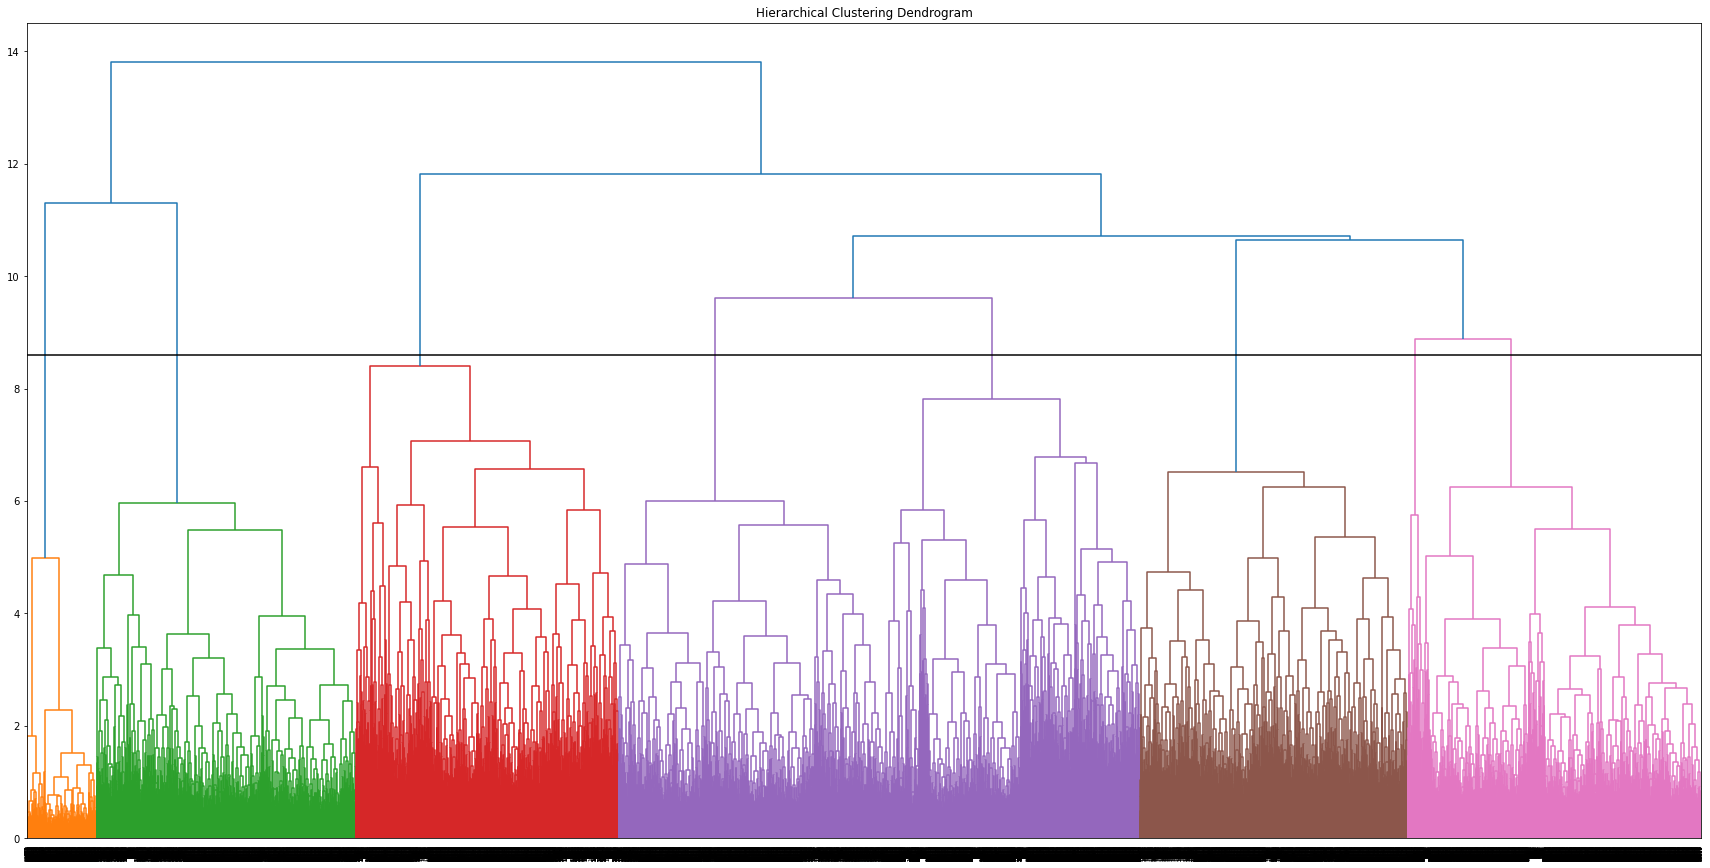

In [ ]:
plot_dendrogram(pc, 'complete', cut_line = 8.6)

In [ ]:
# people['pc_complete6'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 6
#     ).fit_predict(pc)

# people['pc_complete7'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 7
#     ).fit_predict(pc)

people['pc_complete8'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 8
    ).fit_predict(pc)

# people['pc_complete9'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 9
#     ).fit_predict(pc)

In [ ]:
# clusters_comparison(people, 'pc_complete6', 'pc_complete7')
# clusters_comparison(people, 'pc_complete7', 'pc_complete8')
# clusters_comparison(people, 'pc_complete8', 'pc_complete9')

In [ ]:
clusters_comparison(people, 'pc_complete8', 'no_single6')

no_single6 0 Cluster  no_single6 1 Cluster  \
pc_complete8 0 Cluster                     0                     0   
pc_complete8 1 Cluster                     0                  2272   
pc_complete8 2 Cluster                  4764                     0   
pc_complete8 3 Cluster                     0                     0   
pc_complete8 4 Cluster                     0                     0   
pc_complete8 5 Cluster                     0                     0   
pc_complete8 6 Cluster                     0                     0   
pc_complete8 7 Cluster                     0                     0   

                        no_single6 2 Cluster  no_single6 3 Cluster  \
pc_complete8 0 Cluster                     0                     0   
pc_complete8 1 Cluster                  2284                     0   
pc_complete8 2 Cluster                     0                     0   
pc_complete8 3 Cluster                   286                     0   
pc_complete8 4 Cluster                     0                  4610   
pc_complete8 5 Cluster                  4921                     0   
pc_complete8 6 Cluster                     0                     0   
pc_complete8 7 Cluster                  1248                     0   

                        no_single6 4 Cluster  no_single6 5 Cluster  
pc_complete8 0 Cluster                     0                  4667  
pc_complete8 1 Cluster                     0                     0  
pc_complete8 2 Cluster                     0                     0  
pc_complete8 3 Cluster                     0                     0  
pc_complete8 4 Cluster                     0                     0  
pc_complete8 5 Cluster                     0                     0  
pc_complete8 6 Cluster                  4722                     0  
pc_complete8 7 Cluster                     0                     0

In [ ]:
groupby_mean(people, 'pc_complete8')

pc_complete8                                       0            1  \
customer_gender                             0.499893     0.495171   
customer_age                               56.162846    41.057726   
kids_home                                   3.078852     0.338894   
teens_home                                  1.811656     0.258999   
number_complaints                           0.933576     0.261853   
distinct_stores_visited                     3.007285     2.504390   
spend_groceries                          4997.018856  3797.662862   
spend_electronics                         200.006642   803.446444   
typical_hour                               17.401971    16.407594   
spend_vegetables                          602.098779   351.478490   
spend_nonalcohol_drinks                   900.787872   350.376427   
spend_alcohol_drinks                      500.900364   350.345259   
spend_meat                               1100.662738   448.209614   
spend_fish                               1101.494750   447.766023   
spend_hygiene                             500.748018   125.047191   
spend_videogames                          997.704307   350.077480   
total_distinct_products                  2001.371759   280.012950   
percentage_of_products_bought_promotion     0.200119     0.125491   
customer_loyalty                            0.299979     0.125329   
latitude                                   38.749548    38.748734   
longitude                                  -9.157408    -9.156735   
percentage_spend_groceries                  0.458474     0.413604   
percentage_spend_electronics                0.018360     0.147857   
percentage_spend_vegetables                 0.055201     0.074597   
percentage_spend_nonalcohol_drinks          0.082623     0.074428   
percentage_spend_alcohol_drinks             0.045909     0.074742   
percentage_spend_meat                       0.100971     0.068115   
percentage_spend_fish                       0.101051     0.068142   
percentage_spend_hygiene                    0.045893     0.018569   
percentage_spend_videogames                 0.091518     0.059945   
customer_education                          0.995715     0.984197   

pc_complete8                                        2           3  \
customer_gender                              0.500210    0.531469   
customer_age                                56.219563   71.688811   
kids_home                                    0.997901    0.465035   
teens_home                                   0.271620    0.545455   
number_complaints                            1.551008    4.356643   
distinct_stores_visited                      7.999580    1.000000   
spend_groceries                          14993.307935  198.076923   
spend_electronics                          199.970403    9.877622   
typical_hour                                11.914568   10.031469   
spend_vegetables                           799.560034  100.101399   
spend_nonalcohol_drinks                    900.786104   99.930070   
spend_alcohol_drinks                       599.145886  297.723776   
spend_meat                                1501.016583   49.258741   
spend_fish                                1498.781276   51.199301   
spend_hygiene                              199.985306   49.730769   
spend_videogames                            50.012804    0.000000   
total_distinct_products                   4011.462636  100.437063   
percentage_of_products_bought_promotion      0.149955    0.199838   
customer_loyalty                             0.599916    0.017483   
latitude                                    38.747749   38.745995   
longitude                                   -9.157703   -9.175896   
percentage_spend_groceries                   0.722259    0.231732   
percentage_spend_electronics                 0.009665    0.011765   
percentage_spend_vegetables                  0.038626    0.118959   
percentage_spend_nonalcohol_drinks           0.043512    0.118822 

gamers | spenders | veggies | alcoholics | parents | promo hunters(??) | young adults & low standards(??)

---

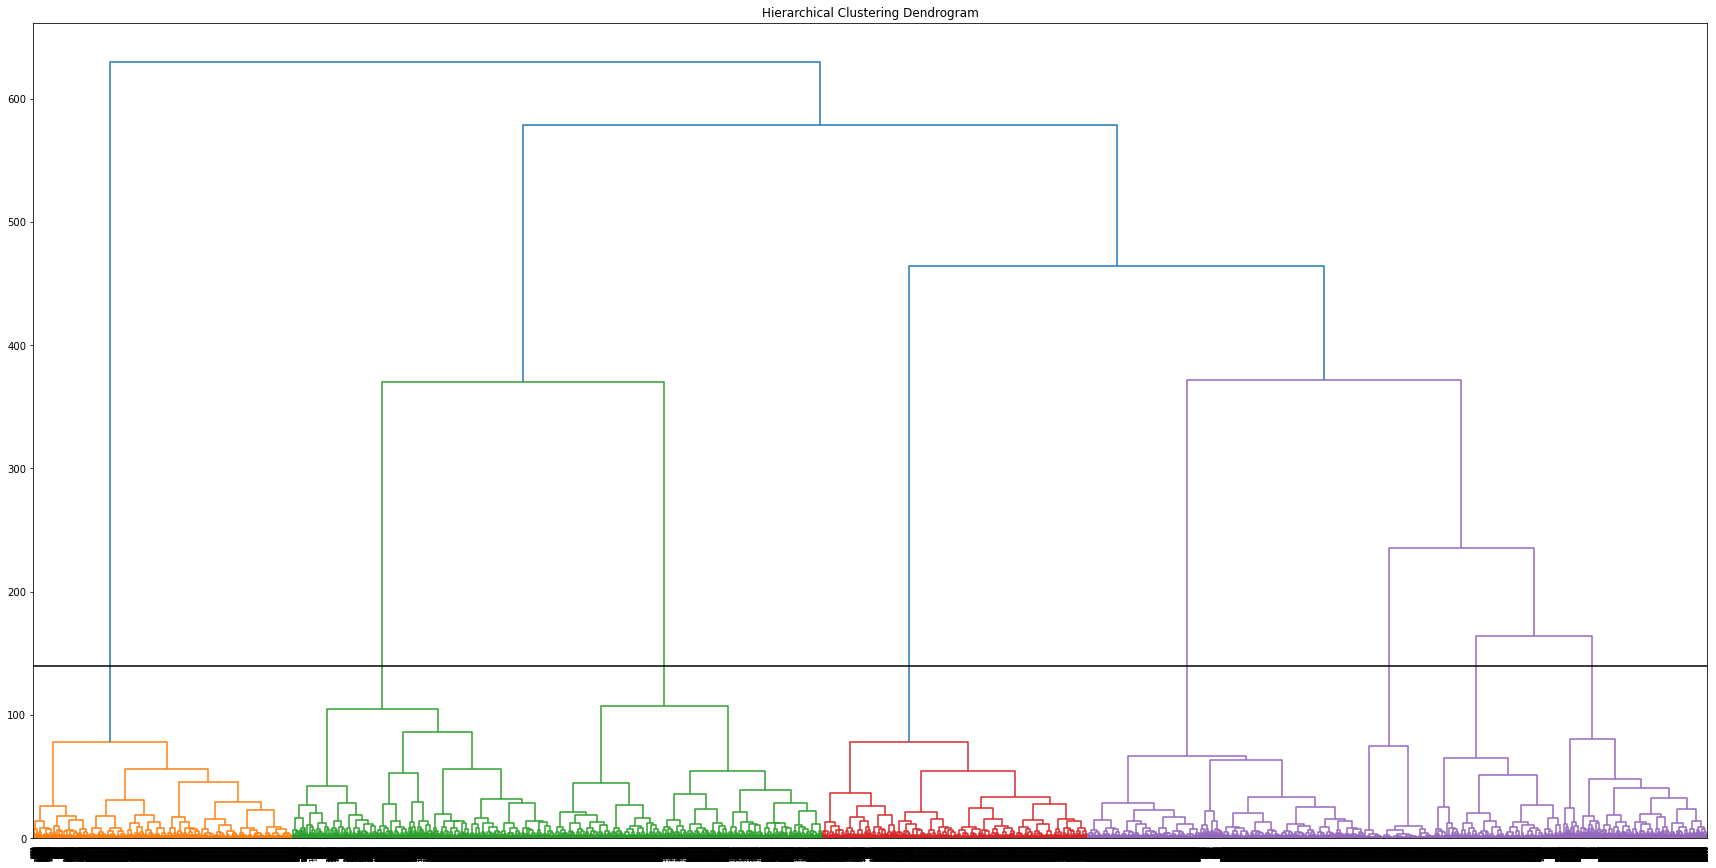

In [ ]:
plot_dendrogram(pc, 'ward', cut_line = 140)

In [ ]:
people['pc_ward8'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 8
    ).fit_predict(pc)

In [ ]:
clusters_comparison(people, 'no_single6', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
no_single6 0 Cluster                4764                   0   
no_single6 1 Cluster                   0                   0   
no_single6 2 Cluster                   0                   0   
no_single6 3 Cluster                   0                4610   
no_single6 4 Cluster                   0                   0   
no_single6 5 Cluster                   0                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
no_single6 0 Cluster                   0                   0   
no_single6 1 Cluster                   0                   0   
no_single6 2 Cluster                   0                   0   
no_single6 3 Cluster                   0                   0   
no_single6 4 Cluster                   0                4722   
no_single6 5 Cluster                4667                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
no_single6 0 Cluster                   0                   0   
no_single6 1 Cluster                   0                   0   
no_single6 2 Cluster                4921                2570   
no_single6 3 Cluster                   0                   0   
no_single6 4 Cluster                   0                   0   
no_single6 5 Cluster                   0                   0   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
no_single6 0 Cluster                   0                   0  
no_single6 1 Cluster                   0                2272  
no_single6 2 Cluster                1248                   0  
no_single6 3 Cluster                   0                   0  
no_single6 4 Cluster                   0                   0  
no_single6 5 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'pc_ward8')

pc_ward8                                            0            1  \
customer_gender                              0.500210     0.505857   
customer_age                                56.219563    56.326247   
kids_home                                    0.997901     0.689588   
teens_home                                   0.271620     0.068547   
number_complaints                            1.551008     0.500000   
distinct_stores_visited                      7.999580     1.992625   
spend_groceries                          14993.307935   200.406291   
spend_electronics                          199.970403  4999.557484   
typical_hour                                11.914568    20.951844   
spend_vegetables                           799.560034    20.033623   
spend_nonalcohol_drinks                    900.786104  1500.946855   
spend_alcohol_drinks                       599.145886   499.866161   
spend_meat                                1501.016583    57.739913   
spend_fish                                1498.781276    58.946421   
spend_hygiene                              199.985306    49.912148   
spend_videogames                            50.012804  2002.197397   
total_distinct_products                   4011.462636    99.785249   
percentage_of_products_bought_promotion      0.149955     0.100002   
customer_loyalty                             0.599916     0.100000   
latitude                                    38.747749    38.747749   
longitude                                   -9.157703    -9.157489   
percentage_spend_groceries                   0.722259     0.021404   
percentage_spend_electronics                 0.009665     0.531238   
percentage_spend_vegetables                  0.038626     0.002140   
percentage_spend_nonalcohol_drinks           0.043512     0.160321   
percentage_spend_alcohol_drinks              0.028935     0.053375   
percentage_spend_meat                        0.072525     0.006150   
percentage_spend_fish                        0.072418     0.006280   
percentage_spend_hygiene                     0.009642     0.005326   
percentage_spend_videogames                  0.002417     0.213766   
customer_education                           0.701511     1.008894   

pc_ward8                                           2            3           4  \
customer_gender                             0.499893     0.509530    0.508433   
customer_age                               56.162846    55.980940   55.883763   
kids_home                                   3.078852     1.160525    1.000203   
teens_home                                  1.811656     0.771495    0.069904   
number_complaints                           0.933576     0.310885    1.010567   
distinct_stores_visited                     3.007285     2.000212   20.001829   
spend_groceries                          4997.018856   997.551461  302.959764   
spend_electronics                         200.006642    50.036637   20.000000   
typical_hour                               17.401971     9.988564    8.991668   
spend_vegetables                          602.098779  1499.739094  300.231863   
spend_nonalcohol_drinks                   900.787872    20.005294  300.431823   
spend_alcohol_drinks                      500.900364    20.117535  199.776671   
spend_meat                               1100.662738     0.000000  151.107702   
spend_fish                               1101.494750     0.000000  149.465962   
spend_hygiene                             500.748018   100.033037   50.032514   
spend_videogames                          997.704307    49.929691    5.000000   
total_distinct_products                  2001.371759   199.708598  499.575493   
percentage_of_products_bought_promotion     0.200119     0.049988    0.499966   
customer_loyalty                            0.299979     0.049979    0.049990   
latitude                                   38.749548    38.748634   38.747834   
longitude                                  -9.157408    -9

gamers | spenders | veggies | alcoholics | parents | young adults | promo hunters | low standards

---

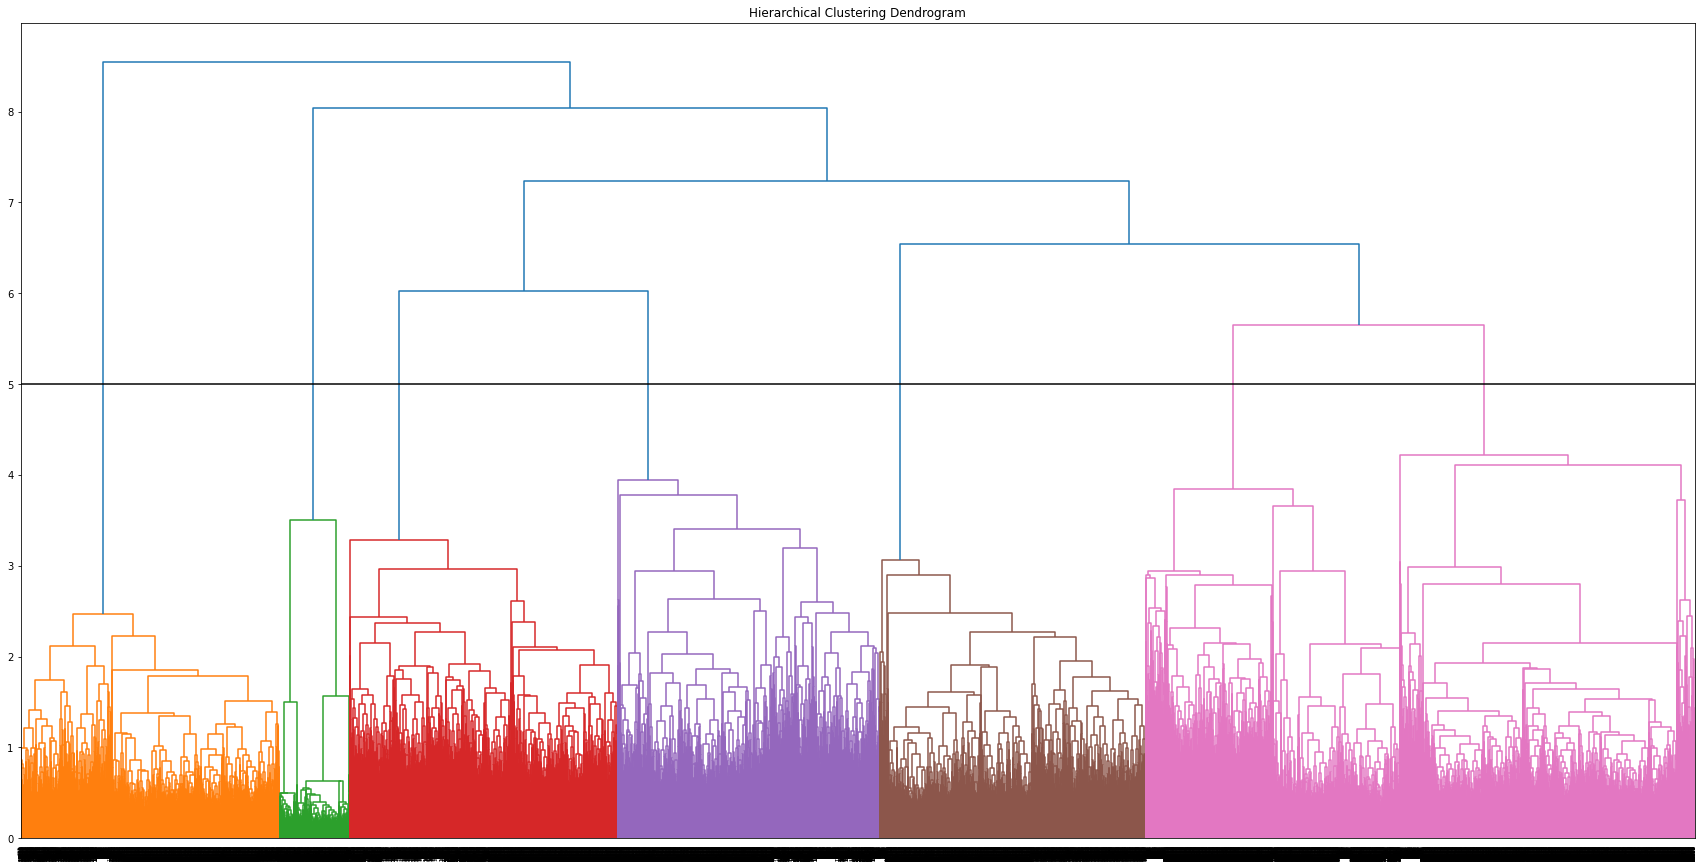

In [ ]:
plot_dendrogram(pc, 'average', cut_line = 5)

In [ ]:
people['pc_average7'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 7
    ).fit_predict(pc)

In [ ]:
clusters_comparison(people, 'pc_average7', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
pc_average7 0 Cluster                   0                   0   
pc_average7 1 Cluster                   0                   0   
pc_average7 2 Cluster                   0                   0   
pc_average7 3 Cluster                   0                4610   
pc_average7 4 Cluster                   0                   0   
pc_average7 5 Cluster                4764                   0   
pc_average7 6 Cluster                   0                   0   

                       pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
pc_average7 0 Cluster                   0                   0   
pc_average7 1 Cluster                4666                   0   
pc_average7 2 Cluster                   1                   0   
pc_average7 3 Cluster                   0                   0   
pc_average7 4 Cluster                   0                4722   
pc_average7 5 Cluster                   0                   0   
pc_average7 6 Cluster                   0                   0   

                       pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
pc_average7 0 Cluster                4921                 312   
pc_average7 1 Cluster                   0                   0   
pc_average7 2 Cluster                   0                2258   
pc_average7 3 Cluster                   0                   0   
pc_average7 4 Cluster                   0                   0   
pc_average7 5 Cluster                   0                   0   
pc_average7 6 Cluster                   0                   0   

                       pc_ward8 6 Cluster  pc_ward8 7 Cluster  
pc_average7 0 Cluster                   0                   0  
pc_average7 1 Cluster                   0                   0  
pc_average7 2 Cluster                   0                2272  
pc_average7 3 Cluster                   0                   0  
pc_average7 4 Cluster                   0                   0  
pc_average7 5 Cluster                   0                   0  
pc_average7 6 Cluster                1248                   0

In [ ]:
groupby_mean(people, 'pc_average7')

pc_average7                                       0            1            2  \
customer_gender                            0.509268     0.499786     0.495696   
customer_age                              56.787311    56.169524    40.923196   
kids_home                                  0.968660     3.079511     0.337674   
teens_home                                 0.098414     1.812045     0.257118   
number_complaints                          1.194535     0.933562     0.256456   
distinct_stores_visited                   18.869482     3.007072     2.512690   
spend_groceries                          296.875788  4996.968924  3818.438755   
spend_electronics                         19.484044   199.993356   807.779519   
typical_hour                               9.049685    17.401843    16.449128   
spend_vegetables                         288.439710   602.105658   352.807548   
spend_nonalcohol_drinks                  288.515001   900.765324   351.915030   
spend_alcohol_drinks                     205.559908   500.857908   350.789450   
spend_meat                               145.210778  1100.669524   450.433238   
spend_fish                               143.738009  1101.484355   450.045465   
spend_hygiene                             50.016243   500.758251   125.549768   
spend_videogames                           4.852092   997.690956   352.069521   
total_distinct_products                  475.738200  2001.394771   281.445818   
percentage_of_products_bought_promotion    0.482008     0.200119     0.125155   
customer_loyalty                           0.048920     0.300043     0.124917   
latitude                                  38.747797    38.749548    38.748667   
longitude                                 -9.158204    -9.157417    -9.156751   
percentage_spend_groceries                 0.199878     0.458475     0.414619   
percentage_spend_electronics               0.013635     0.018359     0.148560   
percentage_spend_vegetables                0.199891     0.055202     0.074311   
percentage_spend_nonalcohol_drinks         0.199938     0.082622     0.074222   
percentage_spend_alcohol_drinks            0.148206     0.045906     0.073474   
percentage_spend_meat                      0.100185     0.100973     0.068097   
percentage_spend_fish                      0.099264     0.101051     0.068139   
percentage_spend_hygiene                   0.035703     0.045895     0.018372   
percentage_spend_videogames                0.003301     0.091518     0.060206   
customer_education                         0.188420     0.995928     0.987641   

pc_average7                                        3            4  \
customer_gender                             0.505857     0.509530   
customer_age                               56.326247    55.980940   
kids_home                                   0.689588     1.160525   
teens_home                                  0.068547     0.771495   
number_complaints                           0.500000     0.310885   
distinct_stores_visited                     1.992625     2.000212   
spend_groceries                           200.406291   997.551461   
spend_electronics                        4999.557484    50.036637   
typical_hour                               20.951844     9.988564   
spend_vegetables                           20.033623  1499.739094   
spend_nonalcohol_drinks                  1500.946855    20.005294   
spend_alcohol_drinks                      499.866161    20.117535   
spend_meat                                 57.739913     0.000000   
spend_fish                                 58.946421     0.000000   
spend_hygiene                              49.912148   100.033037   
spend_videogames                         2002.197397    49.929691   
total_distinct_products                    99.785249   199.708598   
percentage_of_products_bought_promotion     0.100002     0.049988   
customer_loyalty                            0.100000     0.049979   
latitude                   

gamers | spenders | veggies | alcoholics | parents(-1) | promo hunters(??) | young adults & low standards(??)

---

In [ ]:
pc_meanshift = MeanShift(bandwidth = 2.5, n_jobs = -1, bin_seeding = True).fit(pc)
people['pc_meanshift8'] = pc_meanshift.labels_

In [ ]:
clusters_comparison(people, 'pc_meanshift8', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
pc_meanshift8 0 Cluster                   0                   0   
pc_meanshift8 1 Cluster                   0                   0   
pc_meanshift8 2 Cluster                   0                4610   
pc_meanshift8 3 Cluster                4764                   0   
pc_meanshift8 4 Cluster                   0                   0   
pc_meanshift8 5 Cluster                   0                   0   
pc_meanshift8 6 Cluster                   0                   0   
pc_meanshift8 7 Cluster                   0                   0   

                         pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
pc_meanshift8 0 Cluster                   0                   0   
pc_meanshift8 1 Cluster                   0                4722   
pc_meanshift8 2 Cluster                   0                   0   
pc_meanshift8 3 Cluster                   0                   0   
pc_meanshift8 4 Cluster                4663                   0   
pc_meanshift8 5 Cluster                   4                   0   
pc_meanshift8 6 Cluster                   0                   0   
pc_meanshift8 7 Cluster                   0                   0   

                         pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
pc_meanshift8 0 Cluster                4921                 287   
pc_meanshift8 1 Cluster                   0                   0   
pc_meanshift8 2 Cluster                   0                   0   
pc_meanshift8 3 Cluster                   0                   0   
pc_meanshift8 4 Cluster                   0                   0   
pc_meanshift8 5 Cluster                   0                2282   
pc_meanshift8 6 Cluster                   0                   0   
pc_meanshift8 7 Cluster                   0                   1   

                         pc_ward8 6 Cluster  pc_ward8 7 Cluster  
pc_meanshift8 0 Cluster                   0                   0  
pc_meanshift8 1 Cluster                   0                   0  
pc_meanshift8 2 Cluster                   0                   0  
pc_meanshift8 3 Cluster                   0                   0  
pc_meanshift8 4 Cluster                   0                   0  
pc_meanshift8 5 Cluster                   0                2272  
pc_meanshift8 6 Cluster                 939                   0  
pc_meanshift8 7 Cluster                 309                   0

In [ ]:
groupby_mean(people, 'pc_meanshift8')

pc_meanshift8                                     0            1            2  \
customer_gender                            0.509409     0.509530     0.505857   
customer_age                              56.713326    55.980940    56.326247   
kids_home                                  0.971198     1.160525     0.689588   
teens_home                                 0.096582     0.771495     0.068547   
number_complaints                          1.191244     0.310885     0.500000   
distinct_stores_visited                   18.958525     2.000212     1.992625   
spend_groceries                          296.833333   997.551461   200.406291   
spend_electronics                         20.341206    50.036637  4999.557484   
typical_hour                               9.030722     9.988564    20.951844   
spend_vegetables                         289.870584  1499.739094    20.033623   
spend_nonalcohol_drinks                  290.205645    20.005294  1500.946855   
spend_alcohol_drinks                     204.374424    20.117535   499.866161   
spend_meat                               146.235407     0.000000    57.739913   
spend_fish                               144.973118     0.000000    58.946421   
spend_hygiene                             50.024194   100.033037    49.912148   
spend_videogames                           5.533410    49.929691  2002.197397   
total_distinct_products                  477.379416   199.708598    99.785249   
percentage_of_products_bought_promotion    0.483011     0.049988     0.100002   
customer_loyalty                           0.048387     0.049979     0.100000   
latitude                                  38.747781    38.748634    38.747749   
longitude                                 -9.158118    -9.157192    -9.157489   
percentage_spend_groceries                 0.199046     0.360987     0.021404   
percentage_spend_electronics               0.014014     0.018380     0.531238   
percentage_spend_vegetables                0.200425     0.550838     0.002140   
percentage_spend_nonalcohol_drinks         0.200614     0.007344     0.160321   
percentage_spend_alcohol_drinks            0.146250     0.007386     0.053375   
percentage_spend_meat                      0.100646     0.000000     0.006150   
percentage_spend_fish                      0.099799     0.000000     0.006280   
percentage_spend_hygiene                   0.035533     0.036729     0.005326   
percentage_spend_videogames                0.003674     0.018336     0.213766   
customer_education                         0.187980     1.007624     1.008894   

pc_meanshift8                                       3            4  \
customer_gender                              0.500210     0.499678   
customer_age                                56.219563    56.173922   
kids_home                                    0.997901     3.081064   
teens_home                                   0.271620     1.812996   
number_complaints                            1.551008     0.933734   
distinct_stores_visited                      7.999580     3.007506   
spend_groceries                          14993.307935  4997.094574   
spend_electronics                          199.970403   200.018229   
typical_hour                                11.914568    17.402316   
spend_vegetables                           799.560034   602.009865   
spend_nonalcohol_drinks                    900.786104   900.808921   
spend_alcohol_drinks                       599.145886   500.866181   
spend_meat                                1501.016583  1100.688827   
spend_fish                                1498.781276  1101.512546   
spend_hygiene                              199.985306   500.904568   
spend_videogames                            50.012804   997.695261   
total_distinct_products                   4011.462636  2001.455286   
percentage_of_products_bought_promotion      0.149955     0.200117   
customer_loyalty                             0.599916     0.299593   
latitud

gamers | spenders | veggies | north alcoholics | south alcoholics(+1) | parents(-4) | promo hunters(??) | young adults & low standards(??)

---
---

## Standard

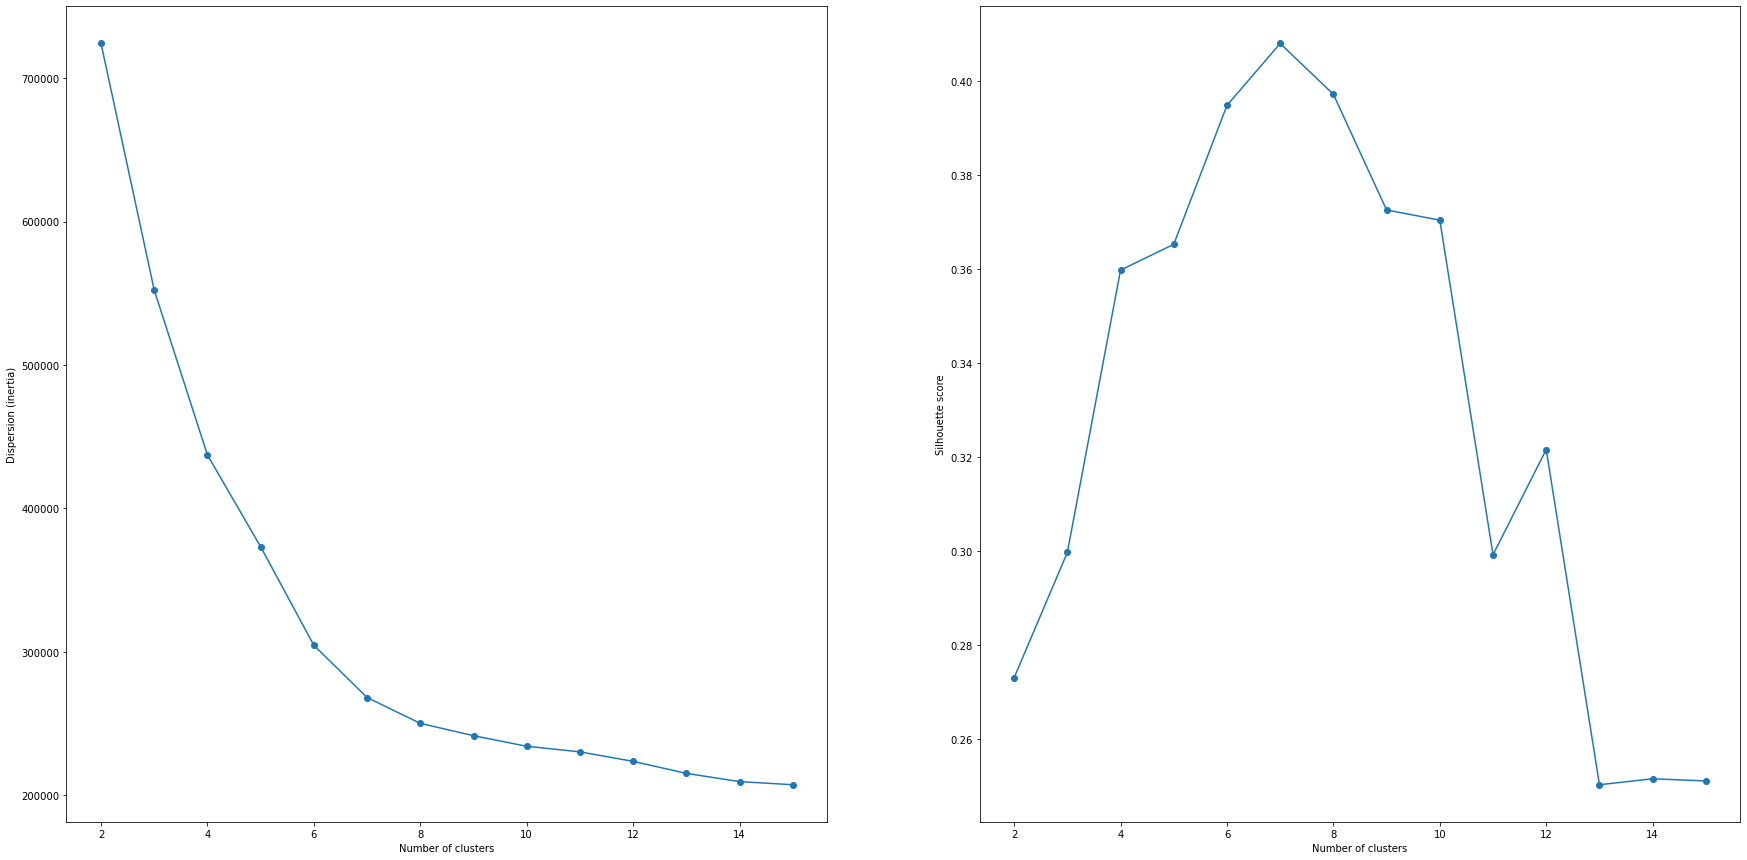

In [ ]:
plot_inertia_and_silhouette(people_st_scl)

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state = 0).fit(people_st_scl)
people['st_kmeans7'] = kmeans.predict(people_st_scl)

In [ ]:
clusters_comparison(people, 'st_kmeans7', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
st_kmeans7 0 Cluster                   0                   0   
st_kmeans7 1 Cluster                   0                4610   
st_kmeans7 2 Cluster                   0                   0   
st_kmeans7 3 Cluster                   0                   0   
st_kmeans7 4 Cluster                   0                   0   
st_kmeans7 5 Cluster                4764                   0   
st_kmeans7 6 Cluster                   0                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
st_kmeans7 0 Cluster                   0                4722   
st_kmeans7 1 Cluster                   0                   0   
st_kmeans7 2 Cluster                4667                   0   
st_kmeans7 3 Cluster                   0                   0   
st_kmeans7 4 Cluster                   0                   0   
st_kmeans7 5 Cluster                   0                   0   
st_kmeans7 6 Cluster                   0                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
st_kmeans7 0 Cluster                   0                   0   
st_kmeans7 1 Cluster                   0                   0   
st_kmeans7 2 Cluster                   0                   0   
st_kmeans7 3 Cluster                   0                   9   
st_kmeans7 4 Cluster                4921                 285   
st_kmeans7 5 Cluster                   0                   0   
st_kmeans7 6 Cluster                   0                2276   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
st_kmeans7 0 Cluster                   0                   0  
st_kmeans7 1 Cluster                   0                   0  
st_kmeans7 2 Cluster                   0                   0  
st_kmeans7 3 Cluster                1248                   0  
st_kmeans7 4 Cluster                   0                   0  
st_kmeans7 5 Cluster                   0                   0  
st_kmeans7 6 Cluster                   0                2272

In [ ]:
groupby_mean(people, 'st_kmeans7')

st_kmeans7                                         0            1  \
customer_gender                             0.509530     0.505857   
customer_age                               55.980940    56.326247   
kids_home                                   1.160525     0.689588   
teens_home                                  0.771495     0.068547   
number_complaints                           0.310885     0.500000   
distinct_stores_visited                     2.000212     1.992625   
spend_groceries                           997.551461   200.406291   
spend_electronics                          50.036637  4999.557484   
typical_hour                                9.988564    20.951844   
spend_vegetables                         1499.739094    20.033623   
spend_nonalcohol_drinks                    20.005294  1500.946855   
spend_alcohol_drinks                       20.117535   499.866161   
spend_meat                                  0.000000    57.739913   
spend_fish                                  0.000000    58.946421   
spend_hygiene                             100.033037    49.912148   
spend_videogames                           49.929691  2002.197397   
total_distinct_products                   199.708598    99.785249   
percentage_of_products_bought_promotion     0.049988     0.100002   
customer_loyalty                            0.049979     0.100000   
latitude                                   38.748634    38.747749   
longitude                                  -9.157192    -9.157489   
percentage_spend_groceries                  0.360987     0.021404   
percentage_spend_electronics                0.018380     0.531238   
percentage_spend_vegetables                 0.550838     0.002140   
percentage_spend_nonalcohol_drinks          0.007344     0.160321   
percentage_spend_alcohol_drinks             0.007386     0.053375   
percentage_spend_meat                       0.000000     0.006150   
percentage_spend_fish                       0.000000     0.006280   
percentage_spend_hygiene                    0.036729     0.005326   
percentage_spend_videogames                 0.018336     0.213766   
customer_education                          1.007624     1.008894   

st_kmeans7                                         2           3           4  \
customer_gender                             0.499893    0.501193    0.509220   
customer_age                               56.162846   23.340493   56.734537   
kids_home                                   3.078852    0.019093    0.971379   
teens_home                                  1.811656    0.002387    0.096619   
number_complaints                           0.933576    0.012729    1.195544   
distinct_stores_visited                     3.007285    1.992840   18.962159   
spend_groceries                          4997.018856  100.741448  297.163081   
spend_electronics                         200.006642   19.815434   19.563773   
typical_hour                               17.401971   21.529037    9.044180   
spend_vegetables                          602.098779   20.703262  289.349981   
spend_nonalcohol_drinks                   900.787872  199.211615  289.576450   
spend_alcohol_drinks                      500.900364  897.134447  204.892432   
spend_meat                               1100.662738   49.751790  145.622167   
spend_fish                               1101.494750   49.838504  144.159047   
spend_hygiene                             500.748018   49.711217   50.023819   
spend_videogames                          997.704307   99.449483    4.800807   
total_distinct_products                  2001.371759   79.903739  477.685555   
percentage_of_products_bought_promotion     0.200119    0.199981    0.483506   
customer_loyalty                            0.299979    0.019889    0.048598   
latitude                                   38.749548   38.724245   38.747815   
longitude                                  -9.157408   -9.172173   -9.158119   
percentage_spend_groceries     

gamers | spenders | veggies | parents | alcoholics(+9) | young adults & low standards(???) | promo hunters(???)

---

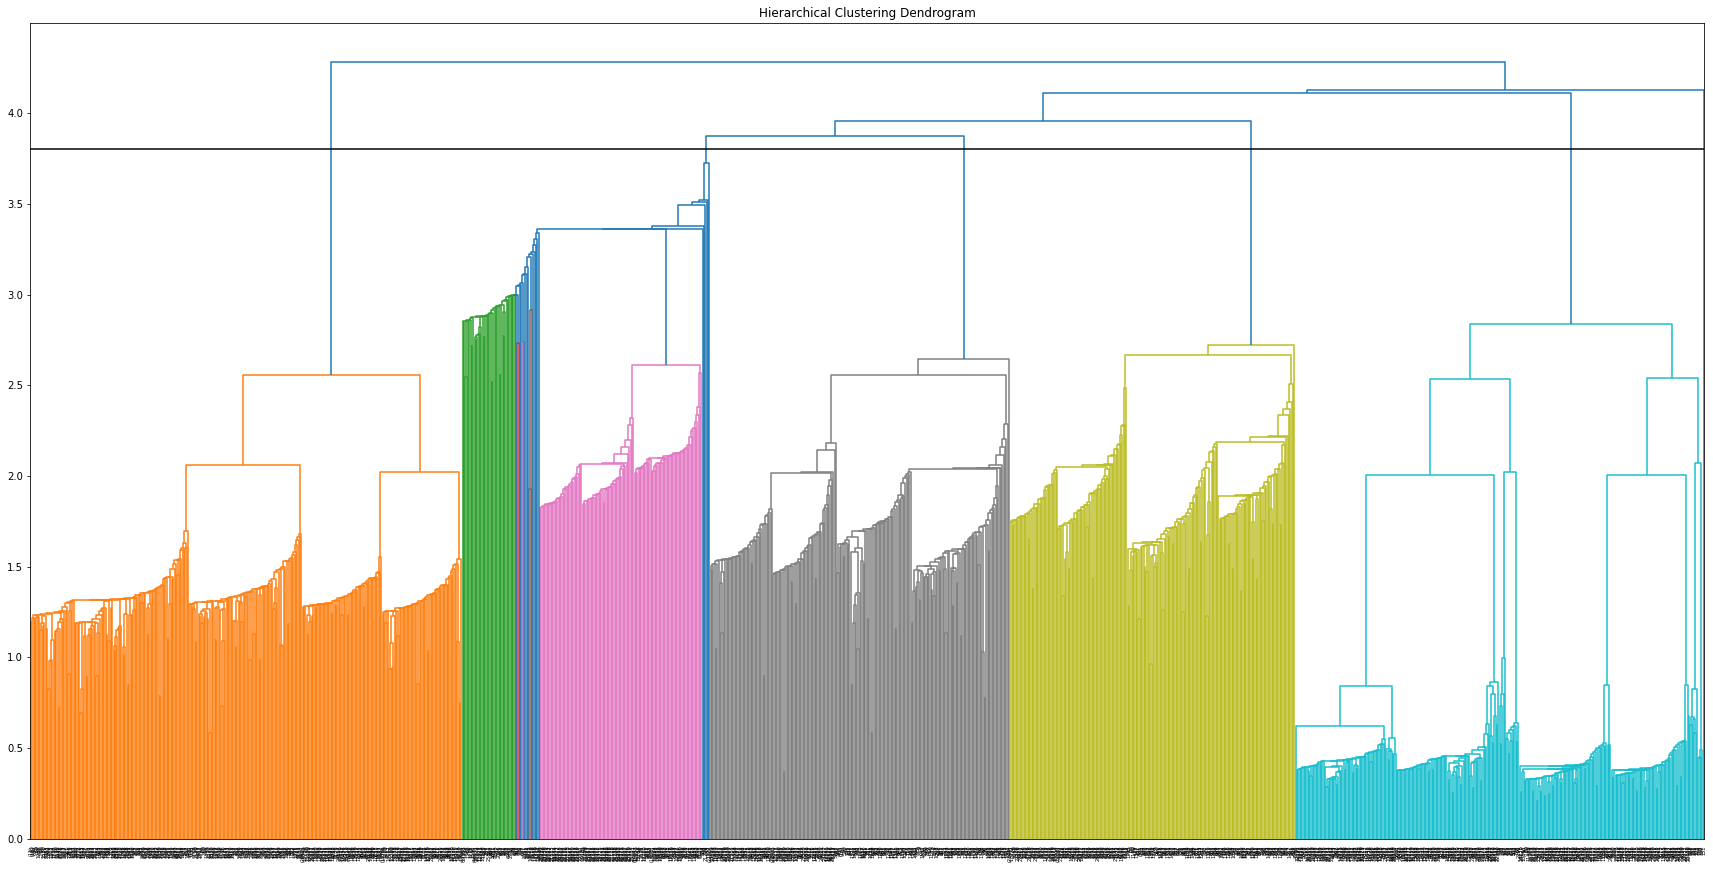

In [ ]:
plot_dendrogram(people_st_scl, 'single', cut_line = 3.8)

In [ ]:
people['st_single6'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 6
    ).fit_predict(people_st_scl)

In [ ]:
clusters_comparison(people, 'st_single6', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
st_single6 0 Cluster                4764                   0   
st_single6 1 Cluster                   0                   0   
st_single6 2 Cluster                   0                   0   
st_single6 3 Cluster                   0                4610   
st_single6 4 Cluster                   0                   0   
st_single6 5 Cluster                   0                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
st_single6 0 Cluster                4667                   0   
st_single6 1 Cluster                   0                   0   
st_single6 2 Cluster                   0                4722   
st_single6 3 Cluster                   0                   0   
st_single6 4 Cluster                   0                   0   
st_single6 5 Cluster                   0                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
st_single6 0 Cluster                   0                2569   
st_single6 1 Cluster                   0                   0   
st_single6 2 Cluster                   0                   0   
st_single6 3 Cluster                   0                   0   
st_single6 4 Cluster                4921                   0   
st_single6 5 Cluster                   0                   1   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
st_single6 0 Cluster                   0                2272  
st_single6 1 Cluster                1248                   0  
st_single6 2 Cluster                   0                   0  
st_single6 3 Cluster                   0                   0  
st_single6 4 Cluster                   0                   0  
st_single6 5 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'st_single6')

st_single6                                         0           1            2  \
customer_gender                             0.499089    0.500801     0.509530   
customer_age                               51.670684   22.994391    55.980940   
kids_home                                   1.457329    0.016026     1.160525   
teens_home                                  0.776696    0.000000     0.771495   
number_complaints                           0.993764    0.000000     0.310885   
distinct_stores_visited                     4.473094    2.000000     2.000212   
spend_groceries                          7855.077775  100.346955   997.551461   
spend_electronics                         388.831698   19.899038    50.036637   
typical_hour                               15.105591   21.606571     9.988564   
spend_vegetables                          577.982413   20.133814  1499.739094   
spend_nonalcohol_drinks                   709.088635  199.929487    20.005294   
spend_alcohol_drinks                      481.584221  900.553686    20.117535   
spend_meat                               1005.024944   49.848558     0.000000   
spend_fish                               1004.448220   49.891026     0.000000   
spend_hygiene                             271.412906   49.731571   100.033037   
spend_videogames                          454.701513  100.166667    49.929691   
total_distinct_products                  2084.878223   79.710737   199.708598   
percentage_of_products_bought_promotion     0.159545    0.199982     0.049988   
customer_loyalty                            0.338635    0.020032     0.049979   
latitude                                   38.748619   38.724097    38.748634   
longitude                                  -9.157659   -9.172161    -9.157192   
percentage_spend_groceries                  0.527664    0.067229     0.360987   
percentage_spend_electronics                0.056665    0.013369     0.018380   
percentage_spend_vegetables                 0.057134    0.013517     0.550838   
percentage_spend_nonalcohol_drinks          0.067675    0.134282     0.007344   
percentage_spend_alcohol_drinks             0.055359    0.603929     0.007386   
percentage_spend_meat                       0.080130    0.033480     0.000000   
percentage_spend_fish                       0.080170    0.033509     0.000000   
percentage_spend_hygiene                    0.025334    0.033398     0.036729   
percentage_spend_videogames                 0.049870    0.067288     0.018336   
customer_education                          0.873739    0.000000     1.007624   

st_single6                                         3           4           5  
customer_gender                             0.505857    0.508433    1.000000  
customer_age                               56.326247   55.883763   60.000000  
kids_home                                   0.689588    1.000203    1.000000  
teens_home                                  0.068547    0.069904    0.000000  
number_complaints                           0.500000    1.010567    2.000000  
distinct_stores_visited                     1.992625   20.001829    1.000000  
spend_groceries                           200.406291  302.959764  338.000000  
spend_electronics                        4999.557484   20.000000   11.000000  
typical_hour                               20.951844    8.991668   11.000000  
spend_vegetables                           20.033623  300.231863   99.000000  
spend_nonalcohol_drinks                  1500.946855  300.431823  104.000000  
spend_alcohol_drinks                      499.866161  199.776671  185.000000  
spend_meat                                 57.739913  151.107702   51.000000  
spend_fish                                 58.946421  149.465962   50.000000  
spend_hygiene                              49.912148   50.032514   54.000000  
spend_videogames                         2002.197397    5.000000    0.000000  
total_distinct_products                    99.785249  499.575493

gamers | veggies | alcoholics | promos hunters | spenders & parents & young adults(-1) & low standards | 1 |

---

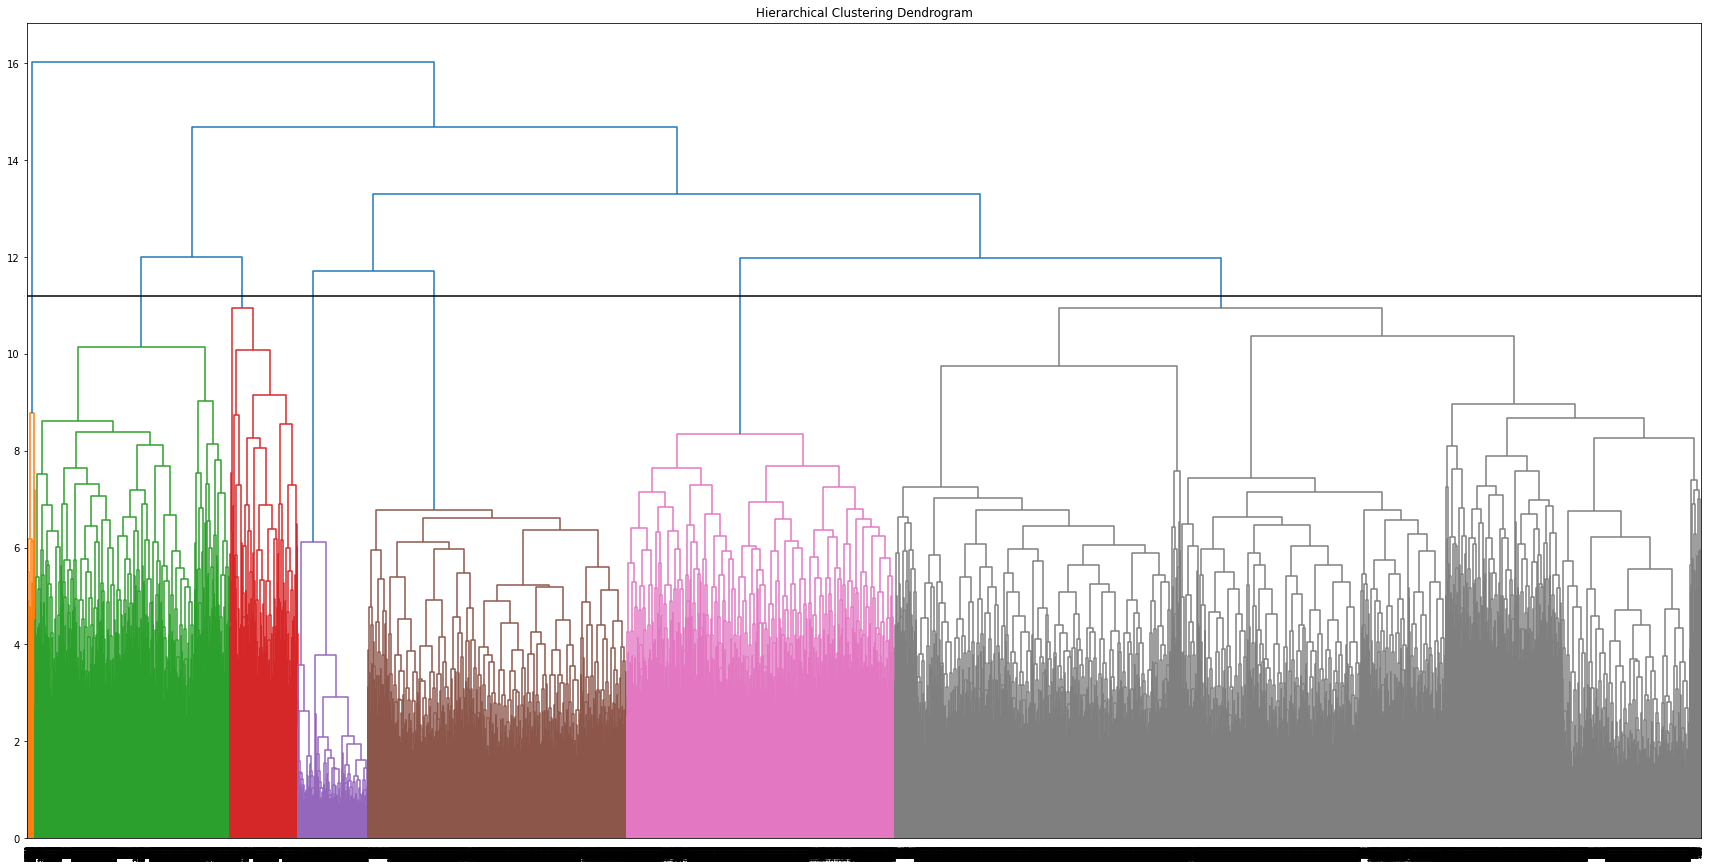

In [ ]:
plot_dendrogram(people_st_scl, 'complete', cut_line = 11.2)

In [ ]:
people['st_complete7'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 7
    ).fit_predict(people_st_scl)

# people['st_complete8'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 8
#     ).fit_predict(people_st_scl)

# people['st_complete9'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 9
#     ).fit_predict(people_st_scl)

In [ ]:
# clusters_comparison(people, 'st_complete7', 'st_complete8')
# clusters_comparison(people, 'st_complete8', 'st_complete9')

In [ ]:
clusters_comparison(people, 'st_complete7', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
st_complete7 0 Cluster                   0                   0   
st_complete7 1 Cluster                   0                   0   
st_complete7 2 Cluster                4764                   0   
st_complete7 3 Cluster                   0                   0   
st_complete7 4 Cluster                   0                   0   
st_complete7 5 Cluster                   0                4610   
st_complete7 6 Cluster                   0                   0   

                        pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
st_complete7 0 Cluster                1210                   0   
st_complete7 1 Cluster                   0                4722   
st_complete7 2 Cluster                   0                   0   
st_complete7 3 Cluster                   0                   0   
st_complete7 4 Cluster                3457                   0   
st_complete7 5 Cluster                   0                   0   
st_complete7 6 Cluster                   0                   0   

                        pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
st_complete7 0 Cluster                   0                   0   
st_complete7 1 Cluster                4921                2423   
st_complete7 2 Cluster                   0                   0   
st_complete7 3 Cluster                   0                 147   
st_complete7 4 Cluster                   0                   0   
st_complete7 5 Cluster                   0                   0   
st_complete7 6 Cluster                   0                   0   

                        pc_ward8 6 Cluster  pc_ward8 7 Cluster  
st_complete7 0 Cluster                   0                   0  
st_complete7 1 Cluster                   0                2272  
st_complete7 2 Cluster                   0                   0  
st_complete7 3 Cluster                   0                   0  
st_complete7 4 Cluster                   0                   0  
st_complete7 5 Cluster                   0                   0  
st_complete7 6 Cluster                1248                   0

In [ ]:
groupby_mean(people, 'st_complete7')

st_complete7                                       0            1  \
customer_gender                             0.528099     0.504812   
customer_age                               55.326446    51.360371   
kids_home                                   3.228099     0.837913   
teens_home                                  3.390083     0.365323   
number_complaints                           0.953719     0.559423   
distinct_stores_visited                     3.000826     8.329125   
spend_groceries                          4987.081818  1641.229809   
spend_electronics                         199.023140   278.740410   
typical_hour                               17.376033    11.686288   
spend_vegetables                          597.494215   709.616822   
spend_nonalcohol_drinks                   900.180992   222.004673   
spend_alcohol_drinks                      499.649587   189.179941   
spend_meat                               1099.421488   194.785605   
spend_fish                               1097.217355   194.076649   
spend_hygiene                             519.675207    90.344051   
spend_videogames                          999.325620   129.399219   
total_distinct_products                  1999.181818   327.189915   
percentage_of_products_bought_promotion     0.200244     0.229869   
customer_loyalty                            0.281818     0.073441   
latitude                                   38.748991    38.748395   
longitude                                  -9.155775    -9.157234   
percentage_spend_groceries                  0.457647     0.320563   
percentage_spend_electronics                0.018274     0.057857   
percentage_spend_vegetables                 0.054787     0.276645   
percentage_spend_nonalcohol_drinks          0.082589     0.097639   
percentage_spend_alcohol_drinks             0.045816     0.076022   
percentage_spend_meat                       0.100867     0.057517   
percentage_spend_fish                       0.100675     0.057150   
percentage_spend_hygiene                    0.047655     0.030345   
percentage_spend_videogames                 0.091690     0.026263   
customer_education                          0.937190     0.712721   

st_complete7                                        2           3  \
customer_gender                              0.500210    0.530612   
customer_age                                56.219563   71.448980   
kids_home                                    0.997901    0.442177   
teens_home                                   0.271620    0.578231   
number_complaints                            1.551008    5.843537   
distinct_stores_visited                      7.999580    1.000000   
spend_groceries                          14993.307935  191.510204   
spend_electronics                          199.970403    9.795918   
typical_hour                                11.914568   10.054422   
spend_vegetables                           799.560034   99.918367   
spend_nonalcohol_drinks                    900.786104   99.877551   
spend_alcohol_drinks                       599.145886  319.428571   
spend_meat                                1501.016583   46.911565   
spend_fish                                1498.781276   51.129252   
spend_hygiene                              199.985306   48.646259   
spend_videogames                            50.012804    0.000000   
total_distinct_products                   4011.462636   99.659864   
percentage_of_products_bought_promotion      0.149955    0.200032   
customer_loyalty                             0.599916    0.034014   
latitude                                    38.747749   38.743097   
longitude                                   -9.157703   -9.175839   
percentage_spend_groceries                   0.722259    0.221098   
percentage_spend_electronics                 0.009665    0.011517   
percentage_spend_vegetables                  0.038626    0.117075   
percentage_spend_nonalcohol_drinks           0.043512    0.117088 

gamers | spenders | alcoholics | +parents | -parents | veggies & promo hunters & young adults & low standards(??) | old low standards

---

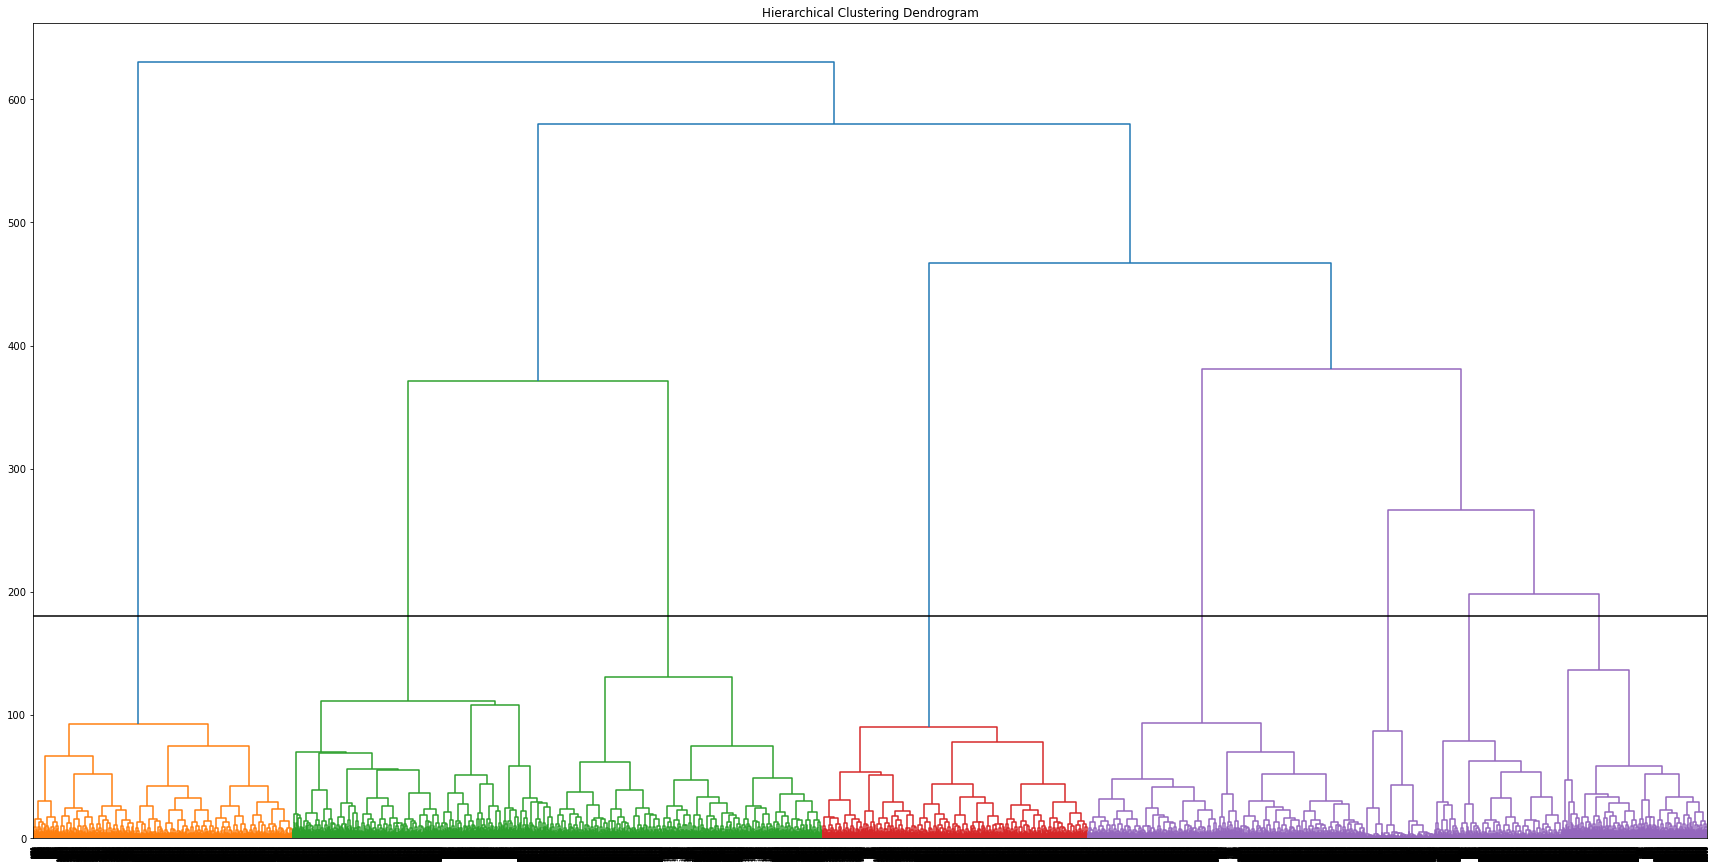

In [ ]:
plot_dendrogram(people_st_scl, 'ward', cut_line = 180)

In [ ]:
people['st_ward8'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 8
    ).fit_predict(people_st_scl)

In [ ]:
clusters_comparison(people, 'st_ward8', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
st_ward8 0 Cluster                   0                   0   
st_ward8 1 Cluster                   0                   0   
st_ward8 2 Cluster                4764                   0   
st_ward8 3 Cluster                   0                   0   
st_ward8 4 Cluster                   0                4610   
st_ward8 5 Cluster                   0                   0   
st_ward8 6 Cluster                   0                   0   
st_ward8 7 Cluster                   0                   0   

                    pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
st_ward8 0 Cluster                   0                   0   
st_ward8 1 Cluster                   0                   0   
st_ward8 2 Cluster                   0                   0   
st_ward8 3 Cluster                   0                4722   
st_ward8 4 Cluster                   0                   0   
st_ward8 5 Cluster                4667                   0   
st_ward8 6 Cluster                   0                   0   
st_ward8 7 Cluster                   0                   0   

                    pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
st_ward8 0 Cluster                   0                2570   
st_ward8 1 Cluster                4921                   0   
st_ward8 2 Cluster                   0                   0   
st_ward8 3 Cluster                   0                   0   
st_ward8 4 Cluster                   0                   0   
st_ward8 5 Cluster                   0                   0   
st_ward8 6 Cluster                   0                   0   
st_ward8 7 Cluster                   0                   0   

                    pc_ward8 6 Cluster  pc_ward8 7 Cluster  
st_ward8 0 Cluster                   0                   0  
st_ward8 1 Cluster                   0                   0  
st_ward8 2 Cluster                   0                   0  
st_ward8 3 Cluster                   0                   0  
st_ward8 4 Cluster                   0                   0  
st_ward8 5 Cluster                   0                   0  
st_ward8 6 Cluster                1248                   0  
st_ward8 7 Cluster                   0                2272

In [ ]:
groupby_mean(people, 'st_ward8')

st_ward8                                          0           1             2  \
customer_gender                            0.503502    0.508433      0.500210   
customer_age                              54.668482   55.883763     56.219563   
kids_home                                  0.508560    1.000203      0.997901   
teens_home                                 0.519844    0.069904      0.271620   
number_complaints                          0.932685    1.010567      1.551008   
distinct_stores_visited                    1.890272   20.001829      7.999580   
spend_groceries                          567.300778  302.959764  14993.307935   
spend_electronics                        538.980156   20.000000    199.970403   
typical_hour                              13.444747    8.991668     11.914568   
spend_vegetables                         278.354864  300.231863    799.560034   
spend_nonalcohol_drinks                  278.221401  300.431823    900.786104   
spend_alcohol_drinks                     297.955642  199.776671    599.145886   
spend_meat                               181.542412  151.107702   1501.016583   
spend_fish                               181.359922  149.465962   1498.781276   
spend_hygiene                             50.104280   50.032514    199.985306   
spend_videogames                         176.022568    5.000000     50.012804   
total_distinct_products                   63.334630  499.575493   4011.462636   
percentage_of_products_bought_promotion    0.112244    0.499966      0.149955   
customer_loyalty                           0.047471    0.049990      0.599916   
latitude                                  38.748020   38.747834     38.747749   
longitude                                 -9.158964   -9.157208     -9.157703   
percentage_spend_groceries                 0.212316    0.197824      0.722259   
percentage_spend_electronics               0.185115    0.013706      0.009665   
percentage_spend_vegetables                0.113954    0.204999      0.038626   
percentage_spend_nonalcohol_drinks         0.113797    0.205122      0.043512   
percentage_spend_alcohol_drinks            0.138933    0.136196      0.028935   
percentage_spend_meat                      0.072392    0.102781      0.072525   
percentage_spend_fish                      0.072709    0.101698      0.072418   
percentage_spend_hygiene                   0.023861    0.034247      0.009642   
percentage_spend_videogames                0.066922    0.003427      0.002417   
customer_education                         0.345525    0.198537      0.701511   

st_ward8                                           3            4  \
customer_gender                             0.509530     0.505857   
customer_age                               55.980940    56.326247   
kids_home                                   1.160525     0.689588   
teens_home                                  0.771495     0.068547   
number_complaints                           0.310885     0.500000   
distinct_stores_visited                     2.000212     1.992625   
spend_groceries                           997.551461   200.406291   
spend_electronics                          50.036637  4999.557484   
typical_hour                                9.988564    20.951844   
spend_vegetables                         1499.739094    20.033623   
spend_nonalcohol_drinks                    20.005294  1500.946855   
spend_alcohol_drinks                       20.117535   499.866161   
spend_meat                                  0.000000    57.739913   
spend_fish                                  0.000000    58.946421   
spend_hygiene                             100.033037    49.912148   
spend_videogames                           49.929691  2002.197397   
total_distinct_products                   199.708598    99.785249   
percentage_of_products_bought_promotion     0.049988     0.100002   
customer_loyalty                            0.049979     0.100000   
latitude                   

gamers | spenders | veggies | alcoholics | parents | promo hunters | young adults | low standards

----

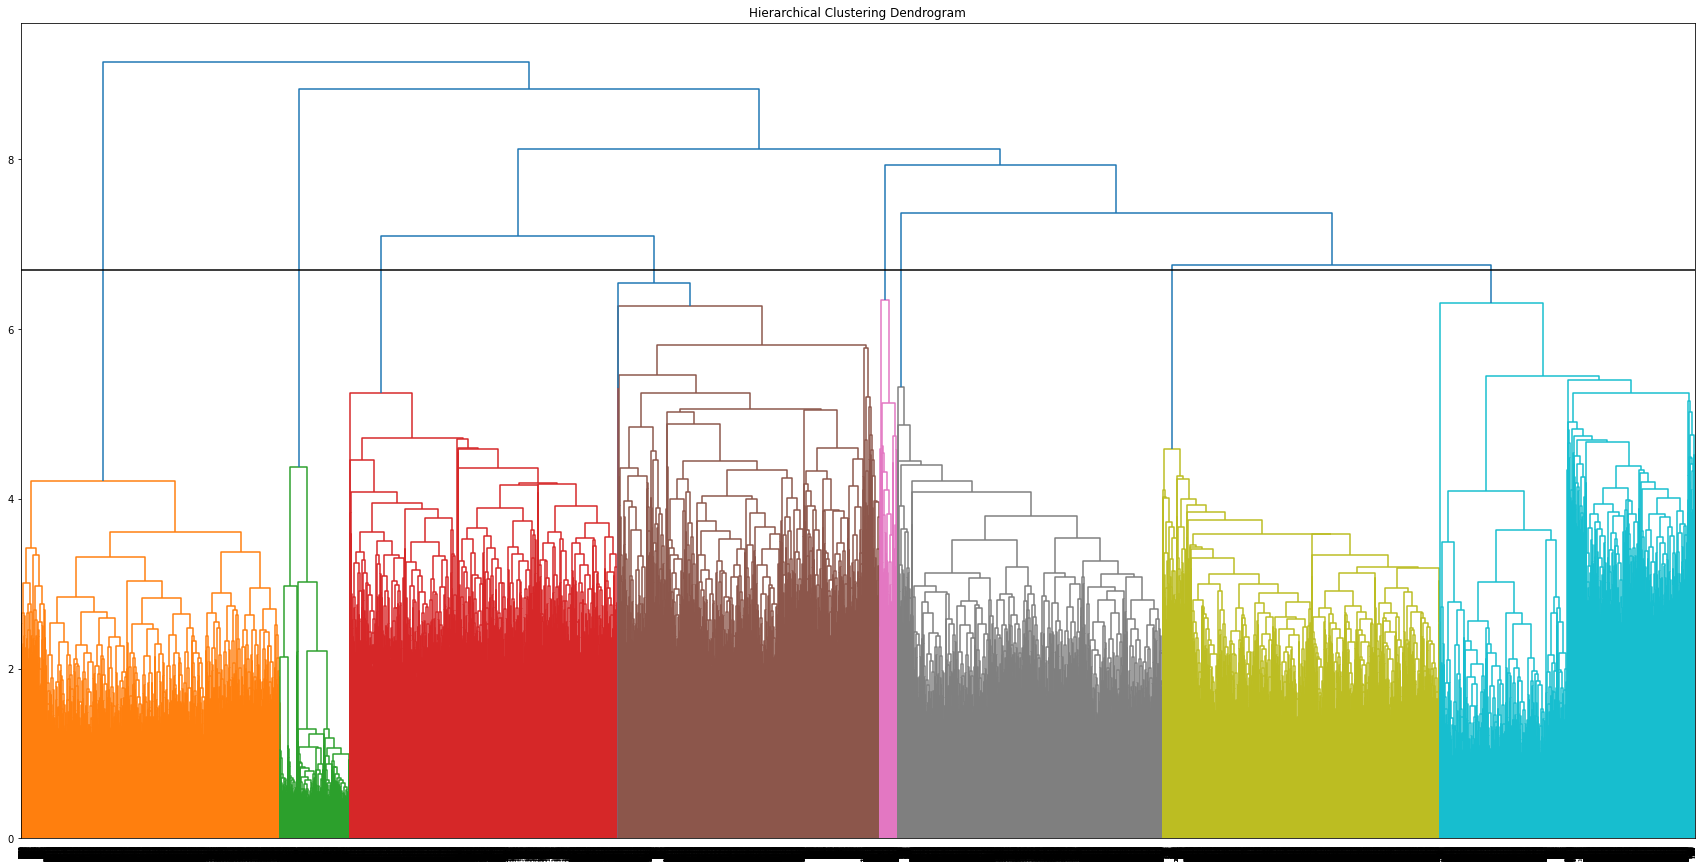

In [ ]:
plot_dendrogram(people_st_scl, 'average', cut_line = 6.7)

In [ ]:
people['st_average8'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 8
    ).fit_predict(people_st_scl)

In [ ]:
clusters_comparison(people, 'st_average8', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
st_average8 0 Cluster                   0                   0   
st_average8 1 Cluster                   0                   0   
st_average8 2 Cluster                   0                   0   
st_average8 3 Cluster                   0                   0   
st_average8 4 Cluster                   0                   0   
st_average8 5 Cluster                   0                   0   
st_average8 6 Cluster                4764                   0   
st_average8 7 Cluster                   0                4610   

                       pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
st_average8 0 Cluster                4667                   0   
st_average8 1 Cluster                   0                   0   
st_average8 2 Cluster                   0                4722   
st_average8 3 Cluster                   0                   0   
st_average8 4 Cluster                   0                   0   
st_average8 5 Cluster                   0                   0   
st_average8 6 Cluster                   0                   0   
st_average8 7 Cluster                   0                   0   

                       pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
st_average8 0 Cluster                   0                   0   
st_average8 1 Cluster                   0                 308   
st_average8 2 Cluster                   0                   0   
st_average8 3 Cluster                4921                   0   
st_average8 4 Cluster                   0                2262   
st_average8 5 Cluster                   0                   0   
st_average8 6 Cluster                   0                   0   
st_average8 7 Cluster                   0                   0   

                       pc_ward8 6 Cluster  pc_ward8 7 Cluster  
st_average8 0 Cluster                   0                   0  
st_average8 1 Cluster                   0                   0  
st_average8 2 Cluster                   0                   0  
st_average8 3 Cluster                   0                   0  
st_average8 4 Cluster                   0                2272  
st_average8 5 Cluster                1248                   0  
st_average8 6 Cluster                   0                   0  
st_average8 7 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'st_average8')

st_average8                                        0           1            2  \
customer_gender                             0.499893    0.522727     0.509530   
customer_age                               56.162846   71.399351    55.980940   
kids_home                                   3.078852    0.474026     1.160525   
teens_home                                  1.811656    0.548701     0.771495   
number_complaints                           0.933576    4.139610     0.310885   
distinct_stores_visited                     3.007285    1.000000     2.000212   
spend_groceries                          4997.018856  199.211039   997.551461   
spend_electronics                         200.006642    9.948052    50.036637   
typical_hour                               17.401971   10.048701     9.988564   
spend_vegetables                          602.098779  100.224026  1499.739094   
spend_nonalcohol_drinks                   900.787872   99.925325    20.005294   
spend_alcohol_drinks                      500.900364  296.506494    20.117535   
spend_meat                               1100.662738   49.402597     0.000000   
spend_fish                               1101.494750   51.175325     0.000000   
spend_hygiene                             500.748018   49.707792   100.033037   
spend_videogames                          997.704307    0.000000    49.929691   
total_distinct_products                  2001.371759  100.538961   199.708598   
percentage_of_products_bought_promotion     0.200119    0.199909     0.049988   
customer_loyalty                            0.299979    0.029221     0.049979   
latitude                                   38.749548   38.747348    38.748634   
longitude                                  -9.157408   -9.174110    -9.157192   
percentage_spend_groceries                  0.458474    0.233096     0.360987   
percentage_spend_electronics                0.018360    0.011844     0.018380   
percentage_spend_vegetables                 0.055201    0.119057     0.550838   
percentage_spend_nonalcohol_drinks          0.082623    0.118742     0.007344   
percentage_spend_alcohol_drinks             0.045909    0.339900     0.007386   
percentage_spend_meat                       0.100971    0.058205     0.000000   
percentage_spend_fish                       0.101051    0.060095     0.000000   
percentage_spend_hygiene                    0.045893    0.059062     0.036729   
percentage_spend_videogames                 0.091518    0.000000     0.018336   
customer_education                          0.995715    0.019481     1.007624   

st_average8                                       3            4           5  \
customer_gender                            0.508433     0.495589    0.500801   
customer_age                              55.883763    40.928760   22.994391   
kids_home                                  1.000203     0.337671    0.016026   
teens_home                                 0.069904     0.257389    0.000000   
number_complaints                          1.010567     0.256727    0.000000   
distinct_stores_visited                   20.001829     2.511689    2.000000   
spend_groceries                          302.959764  3815.051831  100.346955   
spend_electronics                         20.000000   807.292236   19.899038   
typical_hour                               8.991668    16.437362   21.606571   
spend_vegetables                         300.231863   352.689899   20.133814   
spend_nonalcohol_drinks                  300.431823   351.591972  199.929487   
spend_alcohol_drinks                     199.776671   350.683282  900.553686   
spend_meat                               151.107702   450.135642   49.848558   
spend_fish                               149.465962   449.691884   49.891026   
spend_hygiene                             50.032514   125.414204   49.731571   
spend_videogames                           5.000000   351.776136  100.166667   
total_distinct_products                  499.57

gamers | spenders | veggies | alcoholics | parents | promo hunters | young adults & low standards(???) | old low standards

---

In [ ]:
st_meanshift = MeanShift(bandwidth = 4.5, n_jobs = -1, bin_seeding = True).fit(people_st_scl)
people['st_meanshift5'] = st_meanshift.labels_

In [ ]:
clusters_comparison(people, 'st_meanshift5', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
st_meanshift5 0 Cluster                   0                   0   
st_meanshift5 1 Cluster                1755                4610   
st_meanshift5 2 Cluster                3009                   0   
st_meanshift5 3 Cluster                   0                   0   
st_meanshift5 4 Cluster                   0                   0   

                         pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
st_meanshift5 0 Cluster                   0                   0   
st_meanshift5 1 Cluster                   0                4722   
st_meanshift5 2 Cluster                4667                   0   
st_meanshift5 3 Cluster                   0                   0   
st_meanshift5 4 Cluster                   0                   0   

                         pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
st_meanshift5 0 Cluster                4921                   2   
st_meanshift5 1 Cluster                   0                2266   
st_meanshift5 2 Cluster                   0                   0   
st_meanshift5 3 Cluster                   0                   2   
st_meanshift5 4 Cluster                   0                 300   

                         pc_ward8 6 Cluster  pc_ward8 7 Cluster  
st_meanshift5 0 Cluster                   0                   0  
st_meanshift5 1 Cluster                   0                2272  
st_meanshift5 2 Cluster                   0                   0  
st_meanshift5 3 Cluster                1248                   0  
st_meanshift5 4 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'st_meanshift5')

st_meanshift5                                     0            1            2  \
customer_gender                            0.508227     0.503680     0.499609   
customer_age                              55.887264    51.085440    57.531266   
kids_home                                  1.000000     0.748160     2.296378   
teens_home                                 0.069876     0.344896     1.236060   
number_complaints                          1.010360     0.447808     1.261725   
distinct_stores_visited                   19.994719     2.819200     4.965477   
spend_groceries                          302.855576  3155.110656  8908.791298   
spend_electronics                         20.116392  1746.878336   199.982543   
typical_hour                               8.989031    15.312320    15.250130   
spend_vegetables                         300.221613   650.803840   680.505862   
spend_nonalcohol_drinks                  300.480601   651.130560   902.700495   
spend_alcohol_drinks                     199.840748   321.700928   541.395779   
spend_meat                               151.149096   315.524544  1259.058494   
spend_fish                               149.503352   315.176320  1259.341324   
spend_hygiene                             50.032501    96.233216   398.297551   
spend_videogames                           5.076782   713.495808   626.190464   
total_distinct_products                  499.379037   611.107008  2811.300156   
percentage_of_products_bought_promotion    0.499810     0.097815     0.180475   
customer_loyalty                           0.049970     0.137216     0.440073   
latitude                                  38.747837    38.748286    38.748830   
longitude                                 -9.157195    -9.157189    -9.157590   
percentage_spend_groceries                 0.197751     0.317343     0.560956   
percentage_spend_electronics               0.013755     0.206463     0.014943   
percentage_spend_vegetables                0.204965     0.193039     0.048719   
percentage_spend_nonalcohol_drinks         0.205121     0.075934     0.067348   
percentage_spend_alcohol_drinks            0.136209     0.042631     0.039326   
percentage_spend_meat                      0.102787     0.029743     0.089831   
percentage_spend_fish                      0.101705     0.029756     0.089868   
percentage_spend_hygiene                   0.034243     0.018740     0.032422   
percentage_spend_videogames                0.003463     0.086351     0.056587   
customer_education                         0.198456     0.957120     0.901641   

st_meanshift5                                     3           4  
customer_gender                            0.501600    0.516667  
customer_age                              23.065600   71.420000  
kids_home                                  0.016000    0.470000  
teens_home                                 0.000800    0.553333  
number_complaints                          0.000000    4.250000  
distinct_stores_visited                    1.998400    1.000000  
spend_groceries                          100.459200  197.996667  
spend_electronics                         19.879200    9.940000  
typical_hour                              21.589600   10.033333  
spend_vegetables                          20.267200  100.190000  
spend_nonalcohol_drinks                  199.773600   99.856667  
spend_alcohol_drinks                     899.728000  296.393333  
spend_meat                                49.826400   49.220000  
spend_fish                                49.870400   51.290000  
spend_hygiene                             49.728800   49.793333  
spend_videogames                         100.006400    0.000000  
total_distinct_products                   79.738400  100.650000  
percentage_of_products_bought_promotion    0.199977    0.199903  
customer_loyalty                           0.020000    0.030000  
latitude                                  38.724143   38.747235  
longitude            

promo hunters(+2) | alcoholics (+2) | ? | ? | ? |

---
---

## MinMax

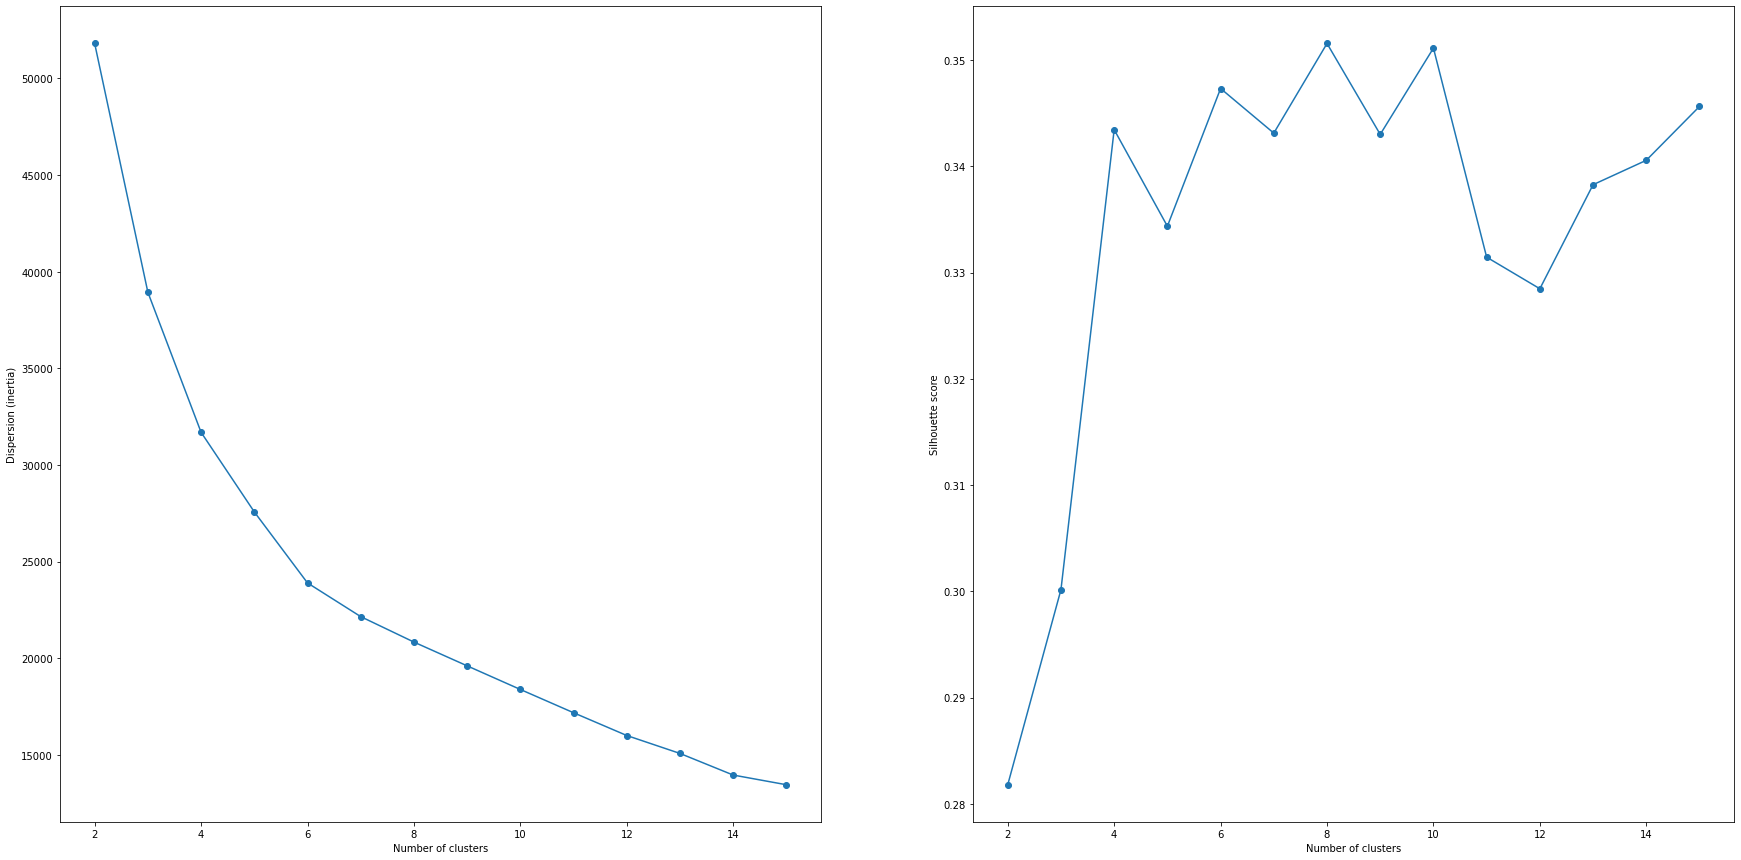

In [ ]:
plot_inertia_and_silhouette(people_mm_scl)

In [ ]:
kmeans = KMeans(n_clusters = 8, random_state = 0).fit(people_mm_scl)
people['mm_kmeans8'] = kmeans.predict(people_mm_scl)

In [ ]:
clusters_comparison(people, 'mm_kmeans8', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
mm_kmeans8 0 Cluster                   0                   0   
mm_kmeans8 1 Cluster                   0                   0   
mm_kmeans8 2 Cluster                   0                4610   
mm_kmeans8 3 Cluster                   0                   0   
mm_kmeans8 4 Cluster                   0                   0   
mm_kmeans8 5 Cluster                2858                   0   
mm_kmeans8 6 Cluster                   0                   0   
mm_kmeans8 7 Cluster                1906                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
mm_kmeans8 0 Cluster                   0                4722   
mm_kmeans8 1 Cluster                2333                   0   
mm_kmeans8 2 Cluster                   0                   0   
mm_kmeans8 3 Cluster                   0                   0   
mm_kmeans8 4 Cluster                2334                   0   
mm_kmeans8 5 Cluster                   0                   0   
mm_kmeans8 6 Cluster                   0                   0   
mm_kmeans8 7 Cluster                   0                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
mm_kmeans8 0 Cluster                   0                   1   
mm_kmeans8 1 Cluster                   0                  28   
mm_kmeans8 2 Cluster                   0                   0   
mm_kmeans8 3 Cluster                4921                   0   
mm_kmeans8 4 Cluster                   0                  26   
mm_kmeans8 5 Cluster                   0                   0   
mm_kmeans8 6 Cluster                   0                2515   
mm_kmeans8 7 Cluster                   0                   0   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
mm_kmeans8 0 Cluster                   0                   0  
mm_kmeans8 1 Cluster                   0                1114  
mm_kmeans8 2 Cluster                   0                   0  
mm_kmeans8 3 Cluster                   0                   0  
mm_kmeans8 4 Cluster                   0                1158  
mm_kmeans8 5 Cluster                   0                   0  
mm_kmeans8 6 Cluster                1248                   0  
mm_kmeans8 7 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'mm_kmeans8')

mm_kmeans8                                         0            1  \
customer_gender                             0.509634     1.000000   
customer_age                               55.985179    47.407482   
kids_home                                   1.160491     2.107050   
teens_home                                  0.771544     1.252086   
number_complaints                           0.310819     0.637986   
distinct_stores_visited                     2.000212     2.998849   
spend_groceries                           997.545416  5609.511655   
spend_electronics                          50.056320   458.199712   
typical_hour                                9.987296    17.865612   
spend_vegetables                         1499.493542   536.474245   
spend_nonalcohol_drinks                    20.084904   737.174388   
spend_alcohol_drinks                       20.134448   467.447770   
spend_meat                                  0.010586   964.495252   
spend_fish                                  0.014398   967.640000   
spend_hygiene                             100.021808   402.074532   
spend_videogames                           49.962100   833.494101   
total_distinct_products                   199.686005  1506.143022   
percentage_of_products_bought_promotion     0.049999     0.183291   
customer_loyalty                            0.049968     0.277698   
latitude                                   38.748640    38.749317   
longitude                                  -9.157197    -9.156902   
percentage_spend_groceries                  0.360999     0.508308   
percentage_spend_electronics                0.018390     0.041626   
percentage_spend_vegetables                 0.550753     0.049441   
percentage_spend_nonalcohol_drinks          0.007378     0.067729   
percentage_spend_alcohol_drinks             0.007394     0.043096   
percentage_spend_meat                       0.000005     0.088239   
percentage_spend_fish                       0.000006     0.088506   
percentage_spend_hygiene                    0.036725     0.036739   
percentage_spend_videogames                 0.018350     0.076316   
customer_education                          1.008046     1.205468   

mm_kmeans8                                         2           3            4  \
customer_gender                             0.505857    0.508433     0.000000   
customer_age                               56.326247   55.883763    47.519898   
kids_home                                   0.689588    1.000203     2.117965   
teens_home                                  0.068547    0.069904     1.174815   
number_complaints                           0.500000    1.010567     0.629335   
distinct_stores_visited                     1.992625   20.001829     3.000853   
spend_groceries                           200.406291  302.959764  5622.779420   
spend_electronics                        4999.557484   20.000000   467.341956   
typical_hour                               20.951844    8.991668    17.889710   
spend_vegetables                           20.033623  300.231863   533.449687   
spend_nonalcohol_drinks                  1500.946855  300.431823   729.859295   
spend_alcohol_drinks                      499.866161  199.776671   467.518761   
spend_meat                                 57.739913  151.107702   962.732234   
spend_fish                                 58.946421  149.465962   960.291359   
spend_hygiene                              49.912148   50.032514   397.297897   
spend_videogames                         2002.197397    5.000000   828.054576   
total_distinct_products                    99.785249  499.575493  1492.613132   
percentage_of_products_bought_promotion     0.100002    0.499966     0.182774   
customer_loyalty                            0.100000    0.049990     0.264923   
latitude                                   38.747749   38.747834    38.749461   
longitude                                  -9.157489   -9.157208    -9.157391   
percentag

gamers | veggies | graduated spenders | nongraduated spenders | promo hunters | young adults & +parents | young adults & -parents |

---

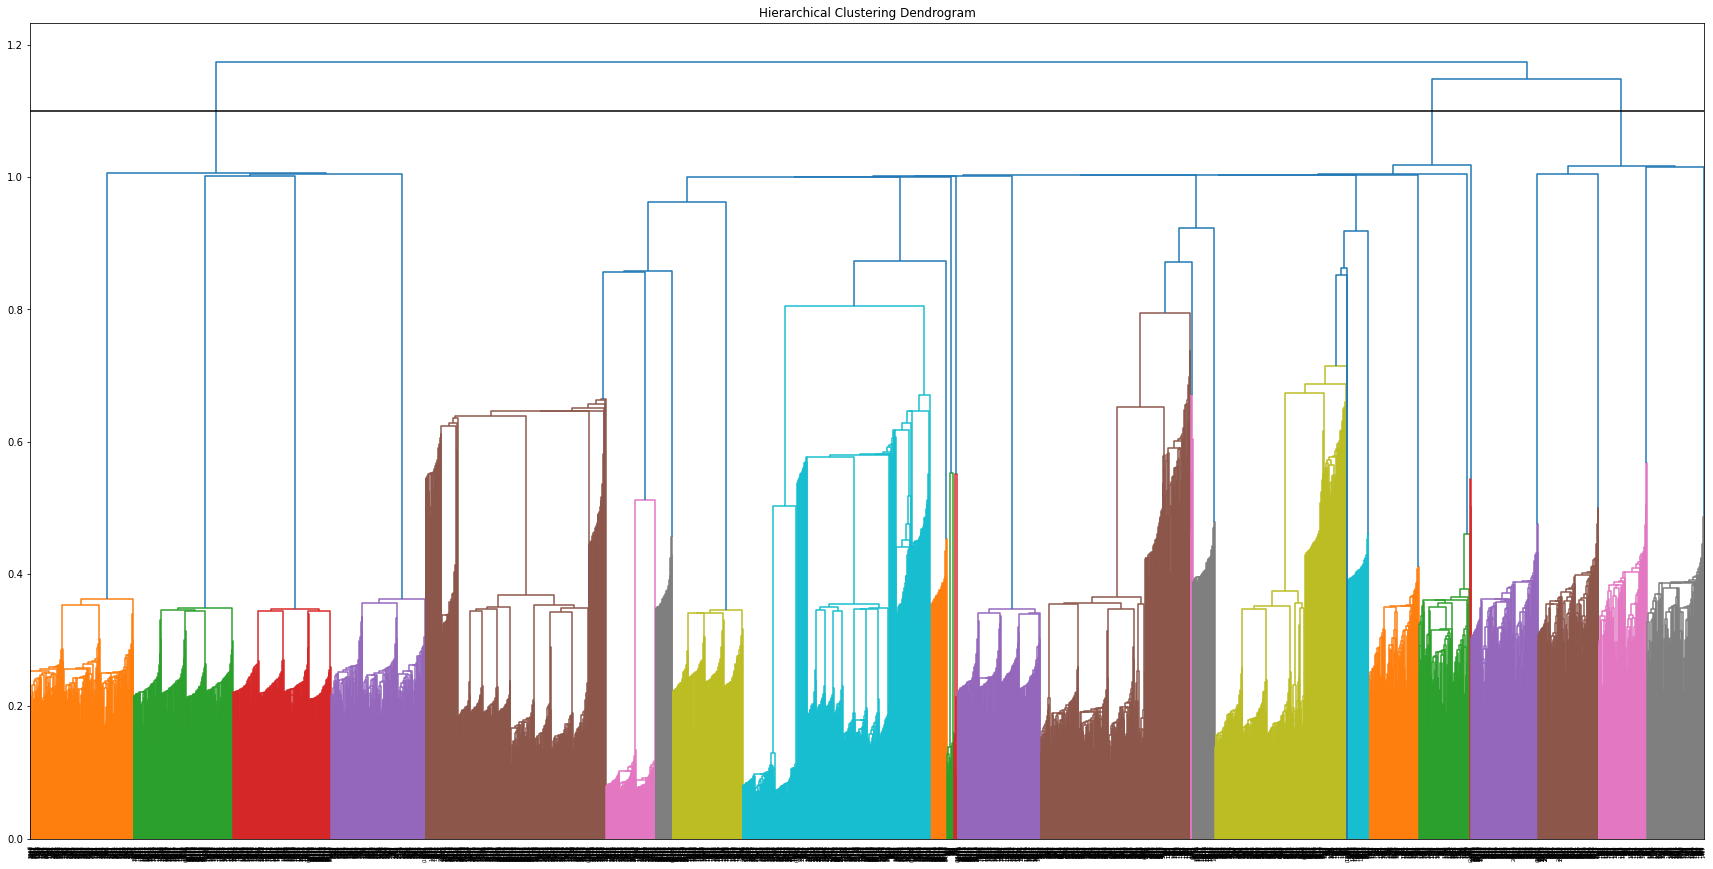

In [ ]:
plot_dendrogram(people_mm_scl, 'single', cut_line = 1.1)

In [ ]:
people['mm_single3'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 3
    ).fit_predict(people_mm_scl)

In [ ]:
clusters_comparison(people, 'mm_single3', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
mm_single3 0 Cluster                4764                   0   
mm_single3 1 Cluster                   0                4610   
mm_single3 2 Cluster                   0                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
mm_single3 0 Cluster                4667                4722   
mm_single3 1 Cluster                   0                   0   
mm_single3 2 Cluster                   0                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
mm_single3 0 Cluster                   0                2570   
mm_single3 1 Cluster                   0                   0   
mm_single3 2 Cluster                4921                   0   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
mm_single3 0 Cluster                1248                2272  
mm_single3 1 Cluster                   0                   0  
mm_single3 2 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'mm_single3')

mm_single3                                         0            1           2
customer_gender                             0.501655     0.505857    0.508433
customer_age                               50.908610    56.326247   55.883763
kids_home                                   1.299215     0.689588    1.000203
teens_home                                  0.727560     0.068547    0.069904
number_complaints                           0.773255     0.500000    1.010567
distinct_stores_visited                     3.743615     1.992625   20.001829
spend_groceries                          5776.993479   200.406291  302.959764
spend_electronics                         287.038680  4999.557484   20.000000
typical_hour                               14.312552    20.951844    8.991668
spend_vegetables                          758.581189    20.033623  300.231863
spend_nonalcohol_drinks                   516.929012  1500.946855  300.431823
spend_alcohol_drinks                      399.755026   499.866161  199.776671
spend_meat                                711.652324    57.739913  151.107702
spend_fish                                711.248283    58.946421  149.465962
spend_hygiene                             217.758237    49.912148   50.032514
spend_videogames                          338.402213  2002.197397    5.000000
total_distinct_products                  1521.413674    99.785249  499.575493
percentage_of_products_bought_promotion     0.136485     0.100002    0.499966
customer_loyalty                            0.251692     0.100000    0.049990
latitude                                   38.747109    38.747749   38.747834
longitude                                  -9.158446    -9.157489   -9.157208
percentage_spend_groceries                  0.460390     0.021404    0.197824
percentage_spend_electronics                0.045063     0.531238    0.013706
percentage_spend_vegetables                 0.169612     0.002140    0.204999
percentage_spend_nonalcohol_drinks          0.057711     0.160321    0.205122
percentage_spend_alcohol_drinks             0.077996     0.053375    0.136196
percentage_spend_meat                       0.058562     0.006150    0.102781
percentage_spend_fish                       0.058591     0.006280    0.101698
percentage_spend_hygiene                    0.028491     0.005326    0.034247
percentage_spend_videogames                 0.043585     0.213766    0.003427
customer_education                          0.851208     1.008894    0.198537

gamers | promo hunters | others

---

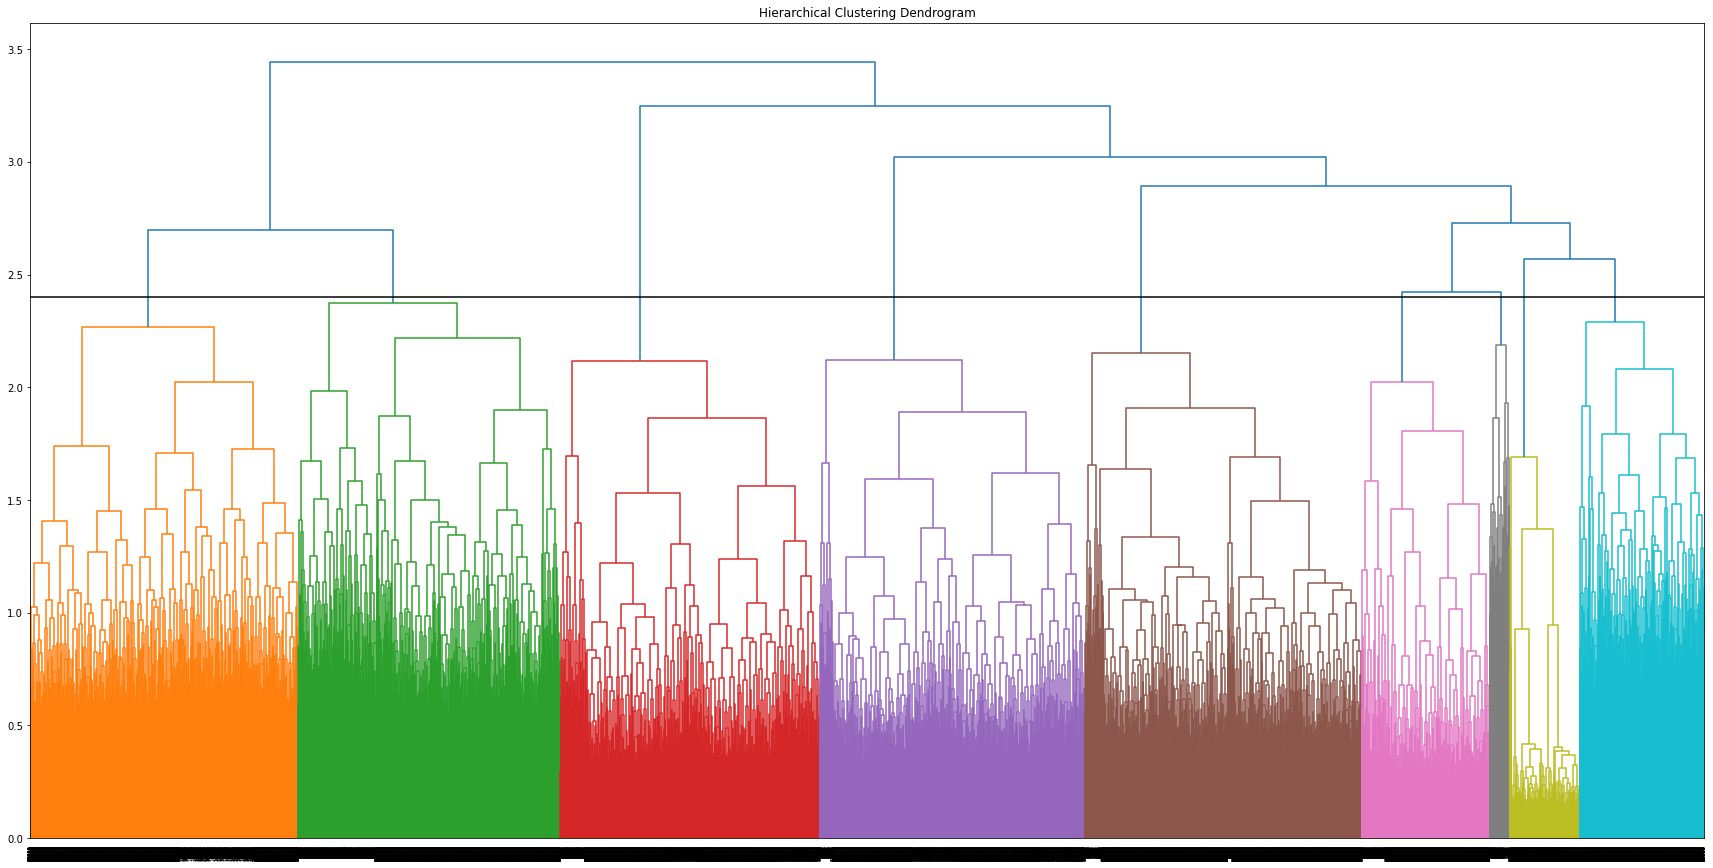

In [ ]:
plot_dendrogram(people_mm_scl, 'complete', cut_line = 2.4)

In [ ]:
# people['mm_complete8'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 8
#     ).fit_predict(people_mm_scl)

people['mm_complete9'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 9
    ).fit_predict(people_mm_scl)

In [ ]:
# clusters_comparison(people, 'mm_complete8', 'mm_complete9')

In [ ]:
clusters_comparison(people, 'mm_complete9', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
mm_complete9 0 Cluster                   0                   0   
mm_complete9 1 Cluster                   0                   0   
mm_complete9 2 Cluster                   0                   0   
mm_complete9 3 Cluster                   0                   0   
mm_complete9 4 Cluster                   0                   0   
mm_complete9 5 Cluster                   0                4610   
mm_complete9 6 Cluster                4764                   0   
mm_complete9 7 Cluster                   0                   0   
mm_complete9 8 Cluster                   0                   0   

                        pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
mm_complete9 0 Cluster                4667                   0   
mm_complete9 1 Cluster                   0                   0   
mm_complete9 2 Cluster                   0                   0   
mm_complete9 3 Cluster                   0                4722   
mm_complete9 4 Cluster                   0                   0   
mm_complete9 5 Cluster                   0                   0   
mm_complete9 6 Cluster                   0                   0   
mm_complete9 7 Cluster                   0                   0   
mm_complete9 8 Cluster                   0                   0   

                        pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
mm_complete9 0 Cluster                   0                   0   
mm_complete9 1 Cluster                   0                 363   
mm_complete9 2 Cluster                   0                2207   
mm_complete9 3 Cluster                   0                   0   
mm_complete9 4 Cluster                4921                   0   
mm_complete9 5 Cluster                   0                   0   
mm_complete9 6 Cluster                   0                   0   
mm_complete9 7 Cluster                   0                   0   
mm_complete9 8 Cluster                   0                   0   

                        pc_ward8 6 Cluster  pc_ward8 7 Cluster  
mm_complete9 0 Cluster                   0                   0  
mm_complete9 1 Cluster                   0                   0  
mm_complete9 2 Cluster                   0                   0  
mm_complete9 3 Cluster                   0                   0  
mm_complete9 4 Cluster                   0                   0  
mm_complete9 5 Cluster                   0                   0  
mm_complete9 6 Cluster                   0                   0  
mm_complete9 7 Cluster                1248                   0  
mm_complete9 8 Cluster                   0                2272

In [ ]:
groupby_mean(people, 'mm_complete9')

mm_complete9                                       0           1           2  \
customer_gender                             0.499893    0.495868    0.504758   
customer_age                               56.162846   50.049587   55.428183   
kids_home                                   3.078852    0.534435    0.504304   
teens_home                                  1.811656    0.523416    0.519257   
number_complaints                           0.933576    0.539945    0.997281   
distinct_stores_visited                     3.007285    1.994490    1.873131   
spend_groceries                          4997.018856  662.126722  551.704123   
spend_electronics                         200.006642  567.991736  534.208428   
typical_hour                               17.401971   13.793388   13.387404   
spend_vegetables                          602.098779  293.225895  275.908926   
spend_nonalcohol_drinks                   900.787872  292.688705  275.841867   
spend_alcohol_drinks                      500.900364  301.198347  297.422293   
spend_meat                               1100.662738  203.517906  177.927957   
spend_fish                               1101.494750  195.567493  179.023108   
spend_hygiene                             500.748018   50.195592   50.089261   
spend_videogames                          997.704307  199.666667  172.133666   
total_distinct_products                  2001.371759   59.658402   63.939284   
percentage_of_products_bought_promotion     0.200119    0.101143    0.114069   
customer_loyalty                            0.299979    0.314050    0.003625   
latitude                                   38.749548   38.746781   38.748224   
longitude                                  -9.157408   -9.156384   -9.159388   
percentage_spend_groceries                  0.458474    0.226846    0.209926   
percentage_spend_electronics                0.018360    0.196098    0.183309   
percentage_spend_vegetables                 0.055201    0.110104    0.114587   
percentage_spend_nonalcohol_drinks          0.082623    0.108802    0.114619   
percentage_spend_alcohol_drinks             0.045909    0.113887    0.143052   
percentage_spend_meat                       0.100971    0.075983    0.071802   
percentage_spend_fish                       0.101051    0.073135    0.072639   
percentage_spend_hygiene                    0.045893    0.019186    0.024630   
percentage_spend_videogames                 0.091518    0.075960    0.065436   
customer_education                          0.995715    2.168044    0.045763   

mm_complete9                                       3           4            5  \
customer_gender                             0.509530    0.508433     0.505857   
customer_age                               55.980940   55.883763    56.326247   
kids_home                                   1.160525    1.000203     0.689588   
teens_home                                  0.771495    0.069904     0.068547   
number_complaints                           0.310885    1.010567     0.500000   
distinct_stores_visited                     2.000212   20.001829     1.992625   
spend_groceries                           997.551461  302.959764   200.406291   
spend_electronics                          50.036637   20.000000  4999.557484   
typical_hour                                9.988564    8.991668    20.951844   
spend_vegetables                         1499.739094  300.231863    20.033623   
spend_nonalcohol_drinks                    20.005294  300.431823  1500.946855   
spend_alcohol_drinks                       20.117535  199.776671   499.866161   
spend_meat                                  0.000000  151.107702    57.739913   
spend_fish                                  0.000000  149.465962    58.946421   
spend_hygiene                             100.033037   50.032514    49.912148   
spend_videogames                           49.929691    5.000000  2002.197397   
total_distinct_products                   199.708598  499.5754

gamers | spenders | veggies | alcoholics | parents | promo hunters | young adults | graduated low standards | nongraduated low standards

---

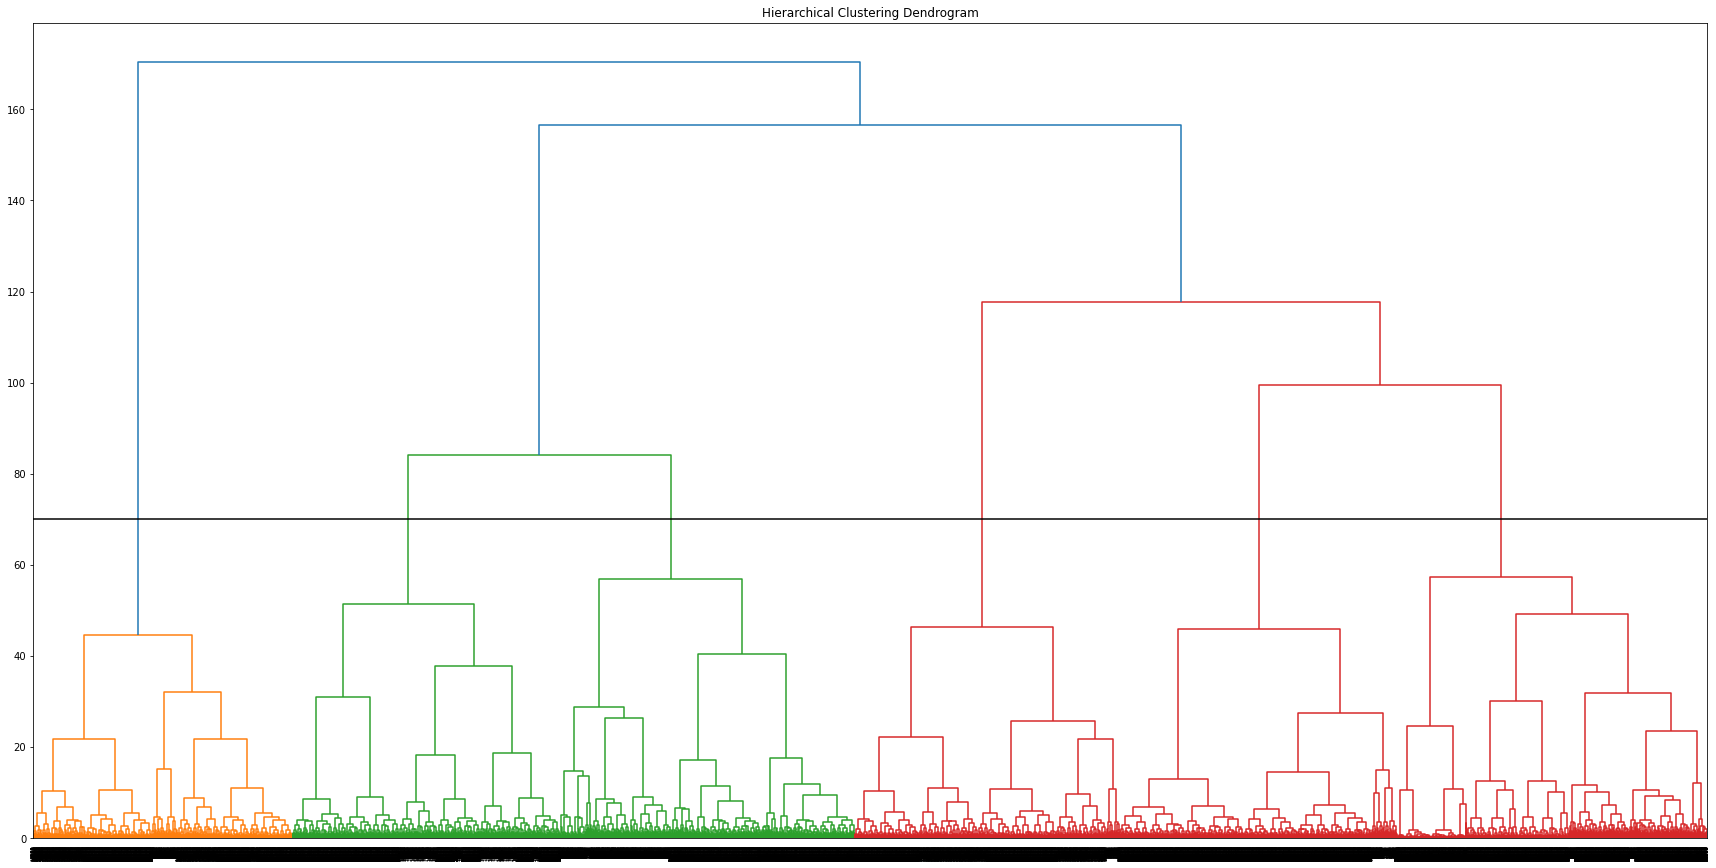

In [ ]:
plot_dendrogram(people_mm_scl, 'ward', cut_line = 70)

In [ ]:
people['mm_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(people_mm_scl)

In [ ]:
clusters_comparison(people, 'mm_ward6', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
mm_ward6 0 Cluster                   0                   0   
mm_ward6 1 Cluster                   0                   0   
mm_ward6 2 Cluster                   0                   0   
mm_ward6 3 Cluster                   0                4610   
mm_ward6 4 Cluster                   0                   0   
mm_ward6 5 Cluster                4764                   0   

                    pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
mm_ward6 0 Cluster                   0                   0   
mm_ward6 1 Cluster                   0                4722   
mm_ward6 2 Cluster                4667                   0   
mm_ward6 3 Cluster                   0                   0   
mm_ward6 4 Cluster                   0                   0   
mm_ward6 5 Cluster                   0                   0   

                    pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
mm_ward6 0 Cluster                   0                2456   
mm_ward6 1 Cluster                   0                   0   
mm_ward6 2 Cluster                   0                 114   
mm_ward6 3 Cluster                   0                   0   
mm_ward6 4 Cluster                4921                   0   
mm_ward6 5 Cluster                   0                   0   

                    pc_ward8 6 Cluster  pc_ward8 7 Cluster  
mm_ward6 0 Cluster                1248                1818  
mm_ward6 1 Cluster                   0                   0  
mm_ward6 2 Cluster                   0                 454  
mm_ward6 3 Cluster                   0                   0  
mm_ward6 4 Cluster                   0                   0  
mm_ward6 5 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'mm_ward6')

mm_ward6                                           0            1  \
customer_gender                             0.501449     0.509530   
customer_age                               39.261137    55.980940   
kids_home                                   0.283412     1.160525   
teens_home                                  0.231619     0.771495   
number_complaints                           0.427744     0.310885   
distinct_stores_visited                     2.281239     2.000212   
spend_groceries                          2577.631293   997.551461   
spend_electronics                         574.451648    50.036637   
typical_hour                               17.101050     9.988564   
spend_vegetables                          260.316733  1499.739094   
spend_nonalcohol_drinks                   300.791199    20.005294   
spend_alcohol_drinks                      468.339008    20.117535   
spend_meat                                321.808584     0.000000   
spend_fish                                322.447121     0.000000   
spend_hygiene                              99.494205   100.033037   
spend_videogames                          265.960159    49.929691   
total_distinct_products                   211.797899   199.708598   
percentage_of_products_bought_promotion     0.144681     0.049988   
customer_loyalty                            0.005976     0.049979   
latitude                                   38.743068    38.748634   
longitude                                  -9.161133    -9.157192   
percentage_spend_groceries                  0.313224     0.360987   
percentage_spend_electronics                0.114422     0.018380   
percentage_spend_vegetables                 0.065413     0.550838   
percentage_spend_nonalcohol_drinks          0.092773     0.007344   
percentage_spend_alcohol_drinks             0.210294     0.007386   
percentage_spend_meat                       0.060016     0.000000   
percentage_spend_fish                       0.060405     0.000000   
percentage_spend_hygiene                    0.024065     0.036729   
percentage_spend_videogames                 0.059389     0.018336   
customer_education                          0.607026     1.007624   

mm_ward6                                           2            3           4  \
customer_gender                             0.496084     0.505857    0.508433   
customer_age                               53.786246    56.326247   55.883763   
kids_home                                   2.770010     0.689588    1.000203   
teens_home                                  1.625979     0.068547    0.069904   
number_complaints                           0.846991     0.500000    1.010567   
distinct_stores_visited                     2.985673     1.992625   20.001829   
spend_groceries                          5075.729131   200.406291  302.959764   
spend_electronics                         276.880611  4999.557484   20.000000   
typical_hour                               17.453677    20.951844    8.991668   
spend_vegetables                          578.341547    20.033623  300.231863   
spend_nonalcohol_drinks                   843.823305  1500.946855  300.431823   
spend_alcohol_drinks                      488.394842   499.866161  199.776671   
spend_meat                               1046.438968    57.739913  151.107702   
spend_fish                               1046.237249    58.946421  149.465962   
spend_hygiene                             464.868577    49.912148   50.032514   
spend_videogames                          937.462273  2002.197397    5.000000   
total_distinct_products                  1828.996562    99.785249  499.575493   
percentage_of_products_bought_promotion     0.193600     0.100002    0.499966   
customer_loyalty                            0.375931     0.100000    0.049990   
latitude                                   38.749414    38.747749   38.747834   
longitude                                  -9.157420    -9.157489   -9.157208   
percentag

gamers | spenders | veggies | promo hunters | parents(???) | alcoholics & low standards(??) & young adults(???)

---

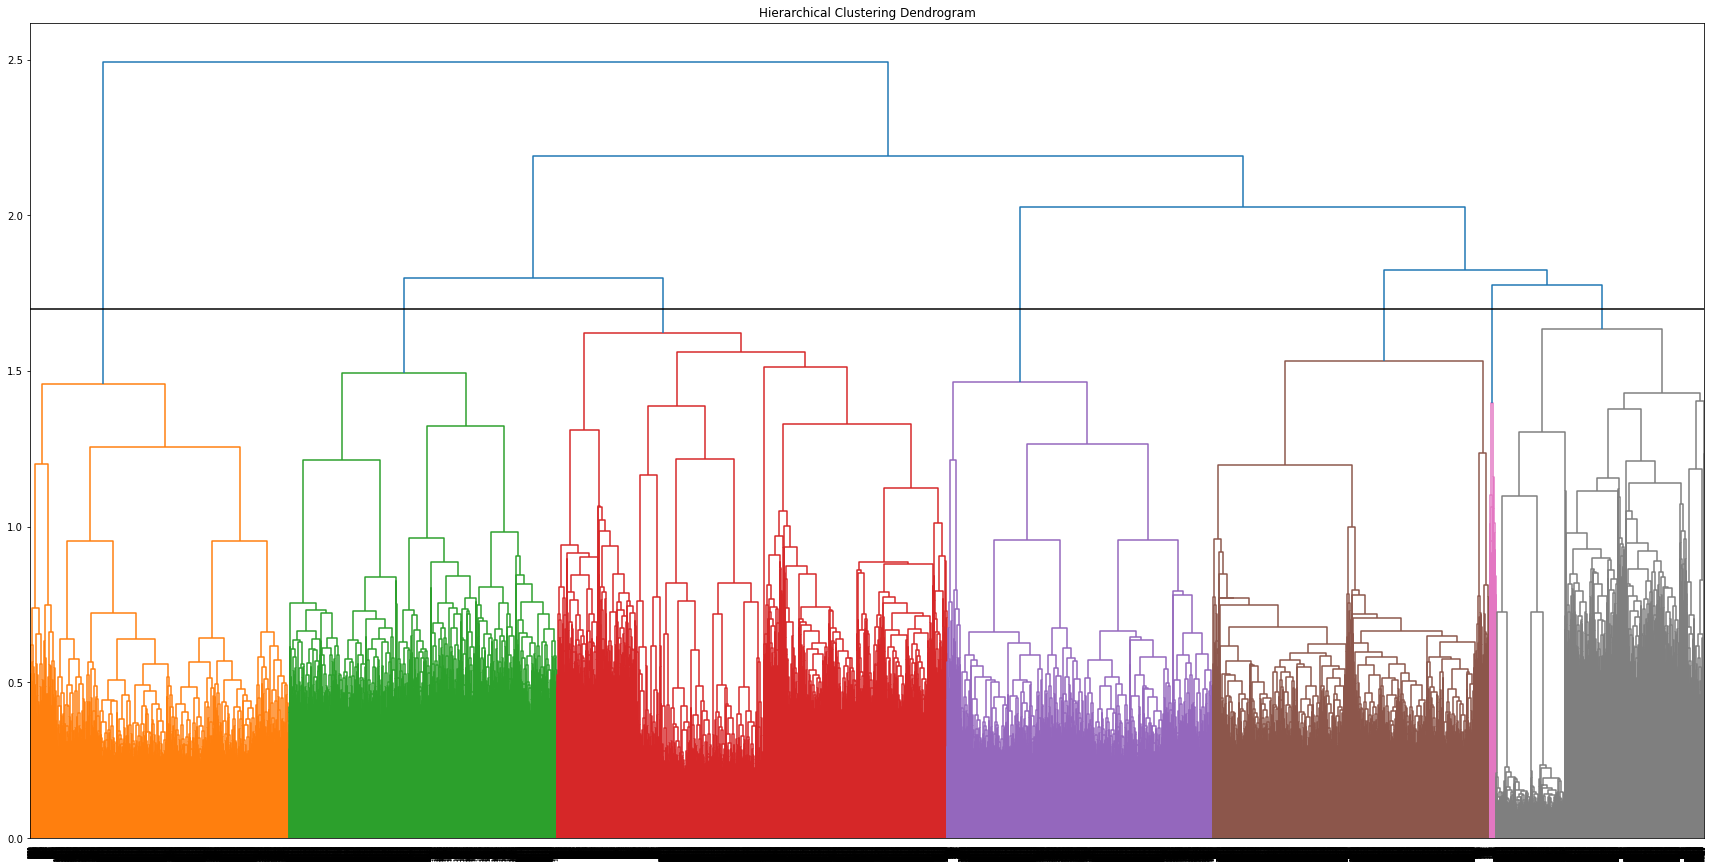

In [ ]:
plot_dendrogram(people_mm_scl, 'average', cut_line = 1.7)

In [ ]:
people['mm_average7'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 7
    ).fit_predict(people_mm_scl)

In [ ]:
clusters_comparison(people, 'mm_average7', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
mm_average7 0 Cluster                   0                   0   
mm_average7 1 Cluster                   0                   0   
mm_average7 2 Cluster                   0                   0   
mm_average7 3 Cluster                   0                4610   
mm_average7 4 Cluster                   0                   0   
mm_average7 5 Cluster                4764                   0   
mm_average7 6 Cluster                   0                   0   

                       pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
mm_average7 0 Cluster                   0                   0   
mm_average7 1 Cluster                   0                   0   
mm_average7 2 Cluster                4667                   0   
mm_average7 3 Cluster                   0                   0   
mm_average7 4 Cluster                   0                4722   
mm_average7 5 Cluster                   0                   0   
mm_average7 6 Cluster                   0                   0   

                       pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
mm_average7 0 Cluster                   0                2456   
mm_average7 1 Cluster                4921                   0   
mm_average7 2 Cluster                   0                   0   
mm_average7 3 Cluster                   0                   0   
mm_average7 4 Cluster                   0                   0   
mm_average7 5 Cluster                   0                   0   
mm_average7 6 Cluster                   0                 114   

                       pc_ward8 6 Cluster  pc_ward8 7 Cluster  
mm_average7 0 Cluster                1248                   0  
mm_average7 1 Cluster                   0                   0  
mm_average7 2 Cluster                   0                2272  
mm_average7 3 Cluster                   0                   0  
mm_average7 4 Cluster                   0                   0  
mm_average7 5 Cluster                   0                   0  
mm_average7 6 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'mm_average7')

mm_average7                                       0           1            2  \
customer_gender                            0.503510    0.508433     0.496757   
customer_age                              44.040497   55.883763    47.438536   
kids_home                                  0.340443    1.000203     2.124081   
teens_home                                 0.345302    0.069904     1.218475   
number_complaints                          0.628780    1.010567     0.633953   
distinct_stores_visited                    1.924946   20.001829     3.008070   
spend_groceries                          408.773218  302.959764  5652.388817   
spend_electronics                        363.229482   20.000000   462.830235   
typical_hour                              16.189795    8.991668    17.910938   
spend_vegetables                         190.698974  300.231863   536.761493   
spend_nonalcohol_drinks                  251.684395  300.431823   736.971177   
spend_alcohol_drinks                     500.201134  199.776671   468.839602   
spend_meat                               136.355832  151.107702   969.355815   
spend_fish                               137.140119  149.465962   969.771725   
spend_hygiene                             49.975702   50.032514   402.386655   
spend_videogames                         149.770788    5.000000   835.691166   
total_distinct_products                   68.921166  499.575493  1510.606139   
percentage_of_products_bought_promotion    0.142164    0.499966     0.183655   
customer_loyalty                           0.008909    0.049990     0.267185   
latitude                                  38.739959   38.747834    38.749434   
longitude                                 -9.163503   -9.157208    -9.157152   
percentage_spend_groceries                 0.163557    0.197824     0.510838   
percentage_spend_electronics               0.127015    0.013706     0.041352   
percentage_spend_vegetables                0.080034    0.204999     0.048803   
percentage_spend_nonalcohol_drinks         0.120879    0.205122     0.067189   
percentage_spend_alcohol_drinks            0.295966    0.136196     0.042569   
percentage_spend_meat                      0.059040    0.102781     0.088215   
percentage_spend_fish                      0.059611    0.101698     0.088251   
percentage_spend_hygiene                   0.027191    0.034247     0.036658   
percentage_spend_videogames                0.066706    0.003427     0.076125   
customer_education                         0.181425    0.198537     1.187923   

mm_average7                                        3            4  \
customer_gender                             0.505857     0.509530   
customer_age                               56.326247    55.980940   
kids_home                                   0.689588     1.160525   
teens_home                                  0.068547     0.771495   
number_complaints                           0.500000     0.310885   
distinct_stores_visited                     1.992625     2.000212   
spend_groceries                           200.406291   997.551461   
spend_electronics                        4999.557484    50.036637   
typical_hour                               20.951844     9.988564   
spend_vegetables                           20.033623  1499.739094   
spend_nonalcohol_drinks                  1500.946855    20.005294   
spend_alcohol_drinks                      499.866161    20.117535   
spend_meat                                 57.739913     0.000000   
spend_fish                                 58.946421     0.000000   
spend_hygiene                              49.912148   100.033037   
spend_videogames                         2002.197397    49.929691   
total_distinct_products                    99.785249   199.708598   
percentage_of_products_bought_promotion     0.100002     0.049988   
customer_loyalty                            0.100000     0.049979   
latitude                                   38.747749    38.

gamers | spenders | veggies | promo hunters | parents & young adults | alcoholics & low standards(??) | pseudo low standards

---

In [ ]:
mm_meanshift = MeanShift(bandwidth = 1.02, n_jobs = -1, bin_seeding = True).fit(people_mm_scl)
people['mm_meanshift7'] = mm_meanshift.labels_

In [ ]:
clusters_comparison(people, 'mm_meanshift7', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
mm_meanshift7 0 Cluster                   0                   0   
mm_meanshift7 1 Cluster                   0                4610   
mm_meanshift7 2 Cluster                   0                   0   
mm_meanshift7 3 Cluster                1934                   0   
mm_meanshift7 4 Cluster                 822                   0   
mm_meanshift7 5 Cluster                   0                   0   
mm_meanshift7 6 Cluster                2008                   0   

                         pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
mm_meanshift7 0 Cluster                   0                   0   
mm_meanshift7 1 Cluster                   0                   0   
mm_meanshift7 2 Cluster                   0                4722   
mm_meanshift7 3 Cluster                2507                   0   
mm_meanshift7 4 Cluster                 704                   0   
mm_meanshift7 5 Cluster                   0                   0   
mm_meanshift7 6 Cluster                1456                   0   

                         pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
mm_meanshift7 0 Cluster                4921                  80   
mm_meanshift7 1 Cluster                   0                   0   
mm_meanshift7 2 Cluster                   0                   0   
mm_meanshift7 3 Cluster                   0                 609   
mm_meanshift7 4 Cluster                   0                1705   
mm_meanshift7 5 Cluster                   0                 116   
mm_meanshift7 6 Cluster                   0                  60   

                         pc_ward8 6 Cluster  pc_ward8 7 Cluster  
mm_meanshift7 0 Cluster                   0                   0  
mm_meanshift7 1 Cluster                   0                   0  
mm_meanshift7 2 Cluster                   0                   0  
mm_meanshift7 3 Cluster                   0                 989  
mm_meanshift7 4 Cluster                   0                 904  
mm_meanshift7 5 Cluster                1248                   0  
mm_meanshift7 6 Cluster                   0                 379

In [ ]:
groupby_mean(people, 'mm_meanshift7')

mm_meanshift7                                     0            1            2  \
customer_gender                            0.500300     0.505857     0.509530   
customer_age                              56.161568    56.326247    55.980940   
kids_home                                  0.991602     0.689588     1.160525   
teens_home                                 0.076985     0.068547     0.771495   
number_complaints                          1.056389     0.500000     0.310885   
distinct_stores_visited                   19.699260     1.992625     2.000212   
spend_groceries                          301.420716   200.406291   997.551461   
spend_electronics                         20.063387  4999.557484    50.036637   
typical_hour                               9.002799    20.951844     9.988564   
spend_vegetables                         297.149770    20.033623  1499.739094   
spend_nonalcohol_drinks                  297.469306  1500.946855    20.005294   
spend_alcohol_drinks                     200.475905   499.866161    20.117535   
spend_meat                               149.688862    57.739913     0.000000   
spend_fish                               148.030194    58.946421     0.000000   
spend_hygiene                             50.032993    49.912148   100.033037   
spend_videogames                           5.075785  2002.197397    49.929691   
total_distinct_products                  493.122176    99.785249   199.708598   
percentage_of_products_bought_promotion    0.495090     0.100002     0.049988   
customer_loyalty                           0.049990     0.100000     0.049979   
latitude                                  38.747818    38.747749    38.748634   
longitude                                 -9.157439    -9.157489    -9.157192   
percentage_spend_groceries                 0.198608     0.021404     0.360987   
percentage_spend_electronics               0.013783     0.531238     0.018380   
percentage_spend_vegetables                0.203705     0.002140     0.550838   
percentage_spend_nonalcohol_drinks         0.203879     0.160321     0.007344   
percentage_spend_alcohol_drinks            0.138539     0.053375     0.007386   
percentage_spend_meat                      0.102209     0.006150     0.000000   
percentage_spend_fish                      0.101167     0.006280     0.000000   
percentage_spend_hygiene                   0.034662     0.005326     0.036729   
percentage_spend_videogames                0.003447     0.213766     0.018336   
customer_education                         0.195561     1.008894     1.007624   

mm_meanshift7                                      3            4           5  \
customer_gender                             0.123365     0.893108    0.460411   
customer_age                               52.960755    47.181137   25.975806   
kids_home                                   1.740354     0.854414    0.059384   
teens_home                                  0.909753     0.532044    0.045455   
number_complaints                           0.941712     0.809190    0.228006   
distinct_stores_visited                     4.503063     3.546554    1.948680   
spend_groceries                          8089.134791  5589.557920  110.708211   
spend_electronics                         354.838549   552.323096   32.046188   
typical_hour                               15.646465    14.911004   20.843842   
spend_vegetables                          604.438152   464.481499   32.005132   
spend_nonalcohol_drinks                   760.994536   534.012817  198.826246   
spend_alcohol_drinks                      497.285147   411.780653  856.212610   
spend_meat                               1075.771651   709.148005   52.082845   
spend_fish                               1076.214108   710.335913   53.368768   
spend_hygiene                             317.440470   178.328416   49.681085   
spend_videogames                          533.328200   364.375816   97.940616   
total_distinct_products       

gamers | veggies | promo hunters(?) | alcoholics(??) | ? | ? | ?

---
---

## Robust

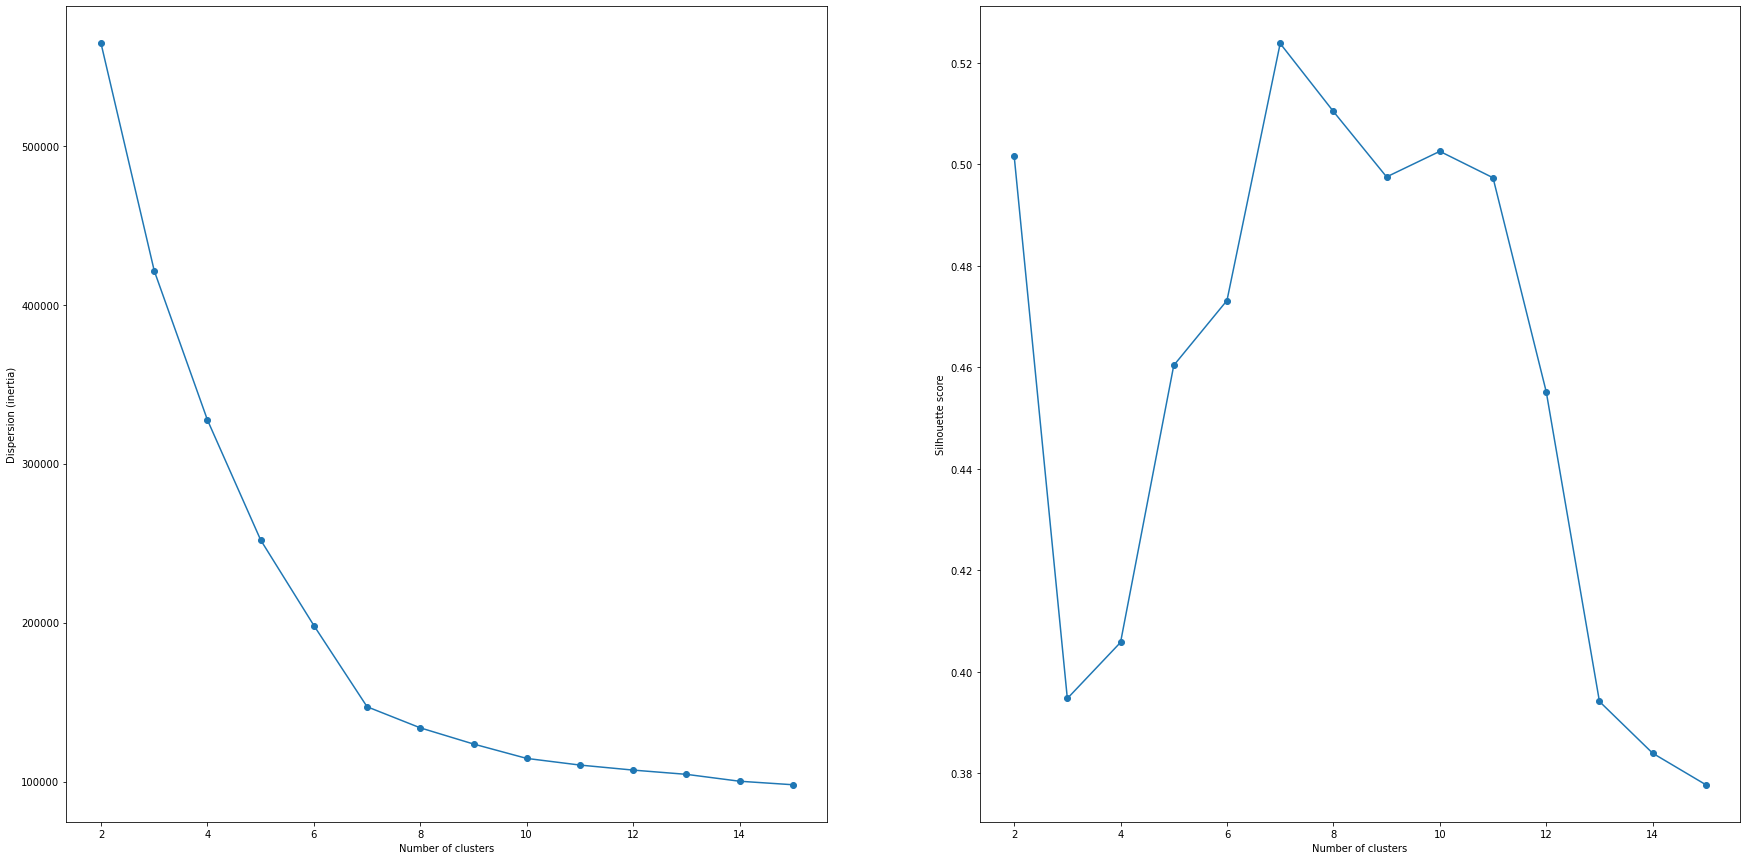

In [ ]:
plot_inertia_and_silhouette(people_rb_scl)

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state = 0).fit(people_rb_scl)
people['rb_kmeans7'] = kmeans.predict(people_rb_scl)

# kmeans = KMeans(n_clusters = 8, random_state = 0).fit(people_rb_scl)
# people['rb_kmeans8'] = kmeans.predict(people_rb_scl)

In [ ]:
# clusters_comparison(people, 'rb_kmeans7', 'rb_kmeans8')

In [ ]:
clusters_comparison(people, 'rb_kmeans8', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
rb_kmeans8 0 Cluster                   0                   0   
rb_kmeans8 1 Cluster                   0                4610   
rb_kmeans8 2 Cluster                   0                   0   
rb_kmeans8 3 Cluster                   0                   0   
rb_kmeans8 4 Cluster                4764                   0   
rb_kmeans8 5 Cluster                   0                   0   
rb_kmeans8 6 Cluster                   0                   0   
rb_kmeans8 7 Cluster                   0                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
rb_kmeans8 0 Cluster                   0                   0   
rb_kmeans8 1 Cluster                   0                   0   
rb_kmeans8 2 Cluster                4562                   0   
rb_kmeans8 3 Cluster                   0                   0   
rb_kmeans8 4 Cluster                   0                   0   
rb_kmeans8 5 Cluster                   0                4722   
rb_kmeans8 6 Cluster                   0                   0   
rb_kmeans8 7 Cluster                 105                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
rb_kmeans8 0 Cluster                   0                2413   
rb_kmeans8 1 Cluster                   0                   1   
rb_kmeans8 2 Cluster                   0                   0   
rb_kmeans8 3 Cluster                4921                   0   
rb_kmeans8 4 Cluster                   0                   0   
rb_kmeans8 5 Cluster                   0                   0   
rb_kmeans8 6 Cluster                   0                 148   
rb_kmeans8 7 Cluster                   0                   8   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
rb_kmeans8 0 Cluster                   0                   0  
rb_kmeans8 1 Cluster                   0                   0  
rb_kmeans8 2 Cluster                   0                   0  
rb_kmeans8 3 Cluster                   0                   0  
rb_kmeans8 4 Cluster                   0                   0  
rb_kmeans8 5 Cluster                   0                   0  
rb_kmeans8 6 Cluster                1248                   0  
rb_kmeans8 7 Cluster                   0                2272

In [ ]:
groupby_mean(people, 'rb_kmeans8')

rb_kmeans8                                        0            1            2  \
customer_gender                            0.502694     0.505964     0.499342   
customer_age                              53.730626    56.327695    56.276414   
kids_home                                  0.513469     0.689438     3.145989   
teens_home                                 0.518442     0.068749     1.841736   
number_complaints                          0.736428     0.500108     0.934678   
distinct_stores_visited                    1.944053     1.992626     3.009645   
spend_groceries                          587.559055   200.371286  4996.982683   
spend_electronics                        572.015748  4998.943396   199.924156   
typical_hour                              13.645669    20.948384    17.407278   
spend_vegetables                         289.141732    20.074604   601.948488   
spend_nonalcohol_drinks                  288.992126  1500.682282   900.871109   
spend_alcohol_drinks                     293.725653   499.821080   501.130644   
spend_meat                               189.749275    57.740187  1100.842832   
spend_fish                               189.324078    58.946216  1101.085708   
spend_hygiene                             50.145462    49.911950   502.412977   
spend_videogames                         186.723581  2001.806983   997.933363   
total_distinct_products                   61.092831    99.780091  2001.682157   
percentage_of_products_bought_promotion    0.106897     0.099999     0.200137   
customer_loyalty                           0.050559     0.099978     0.300088   
latitude                                  38.748155    38.747752    38.749523   
longitude                                 -9.157840    -9.157493    -9.157424   
percentage_spend_groceries                 0.212034     0.021402     0.458400   
percentage_spend_electronics               0.196075     0.531263     0.018349   
percentage_spend_vegetables                0.114236     0.002153     0.055178   
percentage_spend_nonalcohol_drinks         0.114043     0.160304     0.082618   
percentage_spend_alcohol_drinks            0.122988     0.053382     0.045922   
percentage_spend_meat                      0.073728     0.006152     0.100971   
percentage_spend_fish                      0.073851     0.006283     0.100997   
percentage_spend_hygiene                   0.022000     0.005328     0.046040   
percentage_spend_videogames                0.071044     0.213733     0.091525   
customer_education                         0.362619     1.008675     0.995397   

rb_kmeans8                                        3             4  \
customer_gender                            0.508433      0.500210   
customer_age                              55.883763     56.219563   
kids_home                                  1.000203      0.997901   
teens_home                                 0.069904      0.271620   
number_complaints                          1.010567      1.551008   
distinct_stores_visited                   20.001829      7.999580   
spend_groceries                          302.959764  14993.307935   
spend_electronics                         20.000000    199.970403   
typical_hour                               8.991668     11.914568   
spend_vegetables                         300.231863    799.560034   
spend_nonalcohol_drinks                  300.431823    900.786104   
spend_alcohol_drinks                     199.776671    599.145886   
spend_meat                               151.107702   1501.016583   
spend_fish                               149.465962   1498.781276   
spend_hygiene                             50.032514    199.985306   
spend_videogames                           5.000000     50.012804   
total_distinct_products                  499.575493   4011.462636   
percentage_of_products_bought_promotion    0.499966      0.149955   
customer_loyalty                           0.049990      0.599916   
latitude                   

gamers | spenders | veggies | promo hunters | parents(??) | alcoholics(??) | young adults  & low standards(??)

---

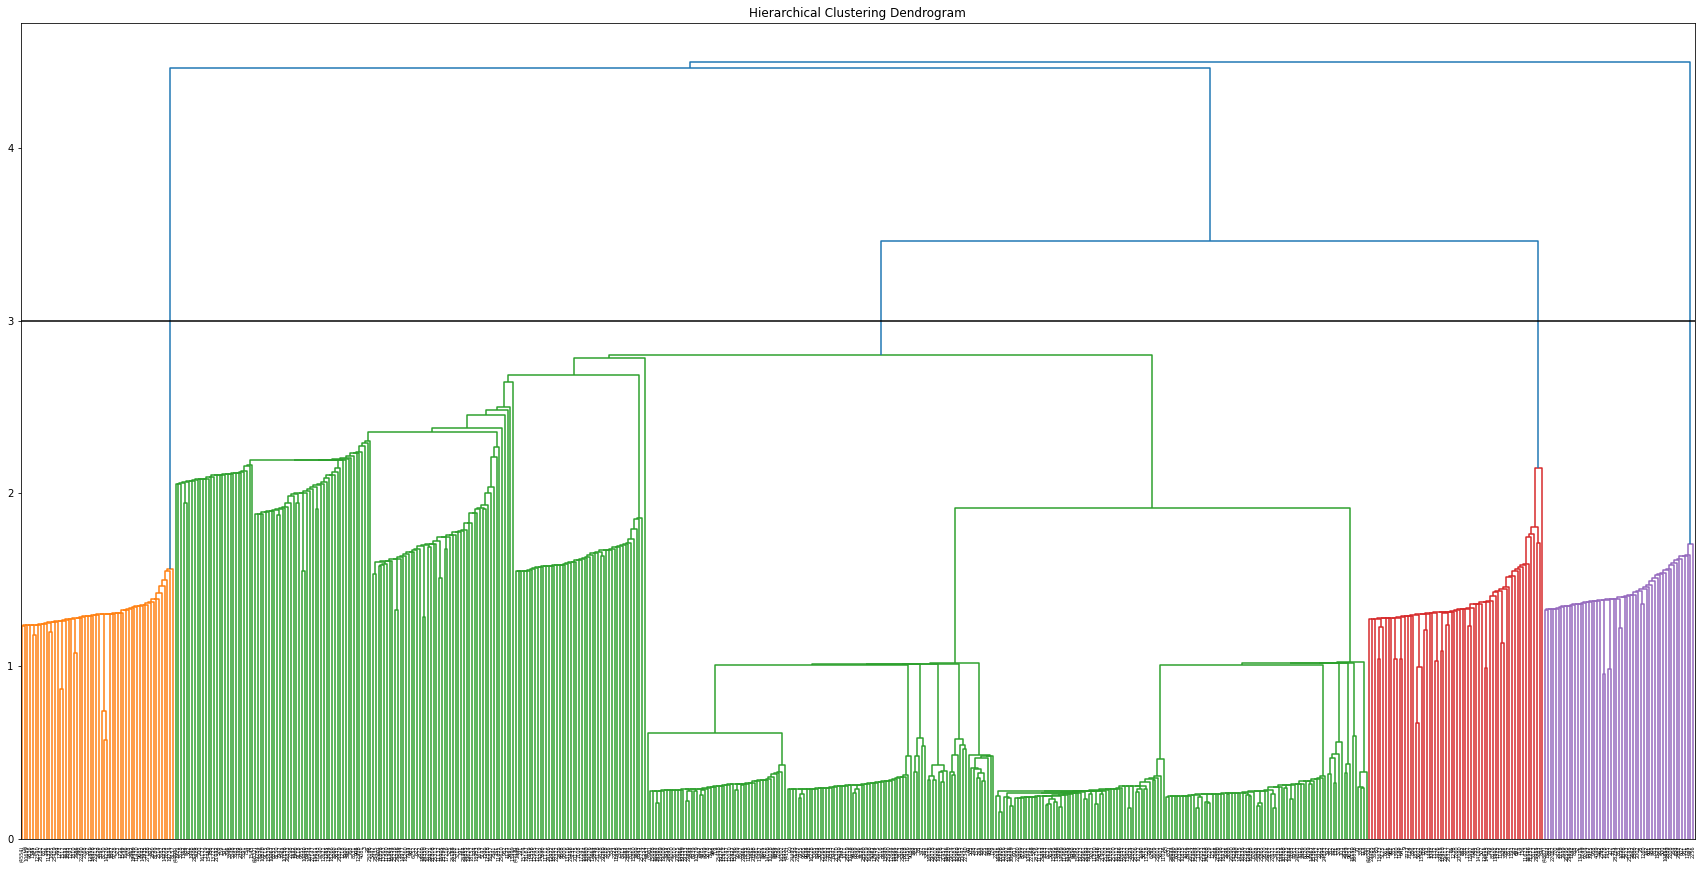

In [ ]:
plot_dendrogram(people_rb_scl, 'single', cut_line = 3)

In [ ]:
people['rb_single4'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 4
    ).fit_predict(people_rb_scl)

In [ ]:
clusters_comparison(people, 'rb_single4', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
rb_single4 0 Cluster                4764                   0   
rb_single4 1 Cluster                   0                   0   
rb_single4 2 Cluster                   0                4610   
rb_single4 3 Cluster                   0                   0   

                      pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
rb_single4 0 Cluster                4667                   0   
rb_single4 1 Cluster                   0                4722   
rb_single4 2 Cluster                   0                   0   
rb_single4 3 Cluster                   0                   0   

                      pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
rb_single4 0 Cluster                   0                2570   
rb_single4 1 Cluster                   0                   0   
rb_single4 2 Cluster                   0                   0   
rb_single4 3 Cluster                4921                   0   

                      pc_ward8 6 Cluster  pc_ward8 7 Cluster  
rb_single4 0 Cluster                1248                2272  
rb_single4 1 Cluster                   0                   0  
rb_single4 2 Cluster                   0                   0  
rb_single4 3 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'rb_single4')

rb_single4                                         0            1  \
customer_gender                             0.499259     0.509530   
customer_age                               49.365440    55.980940   
kids_home                                   1.341408     1.160525   
teens_home                                  0.714194     0.771495   
number_complaints                           0.913923     0.310885   
distinct_stores_visited                     4.274016     2.000212   
spend_groceries                          7231.057342   997.551461   
spend_electronics                         359.142517    50.036637   
typical_hour                               15.628052     9.988564   
spend_vegetables                          533.096514  1499.739094   
spend_nonalcohol_drinks                   668.109593    20.005294   
spend_alcohol_drinks                      515.253270    20.117535   
spend_meat                                928.160428     0.000000   
spend_fish                                927.633464     0.000000   
spend_hygiene                             253.574125   100.033037   
spend_videogames                          426.165067    49.929691   
total_distinct_products                  1923.519941   199.708598   
percentage_of_products_bought_promotion     0.162800     0.049988   
customer_loyalty                            0.313060     0.049979   
latitude                                   38.746645    38.748634   
longitude                                  -9.158828    -9.157192   
percentage_spend_groceries                  0.490632     0.360987   
percentage_spend_electronics                0.053181     0.018380   
percentage_spend_vegetables                 0.053630     0.550838   
percentage_spend_nonalcohol_drinks          0.073034     0.007344   
percentage_spend_alcohol_drinks             0.099478     0.007386   
percentage_spend_meat                       0.076378     0.000000   
percentage_spend_fish                       0.076416     0.000000   
percentage_spend_hygiene                    0.025985     0.036729   
percentage_spend_videogames                 0.051267     0.018336   
customer_education                          0.803621     1.007624   

rb_single4                                         2           3  
customer_gender                             0.505857    0.508433  
customer_age                               56.326247   55.883763  
kids_home                                   0.689588    1.000203  
teens_home                                  0.068547    0.069904  
number_complaints                           0.500000    1.010567  
distinct_stores_visited                     1.992625   20.001829  
spend_groceries                           200.406291  302.959764  
spend_electronics                        4999.557484   20.000000  
typical_hour                               20.951844    8.991668  
spend_vegetables                           20.033623  300.231863  
spend_nonalcohol_drinks                  1500.946855  300.431823  
spend_alcohol_drinks                      499.866161  199.776671  
spend_meat                                 57.739913  151.107702  
spend_fish                                 58.946421  149.465962  
spend_hygiene                              49.912148   50.032514  
spend_videogames                         2002.197397    5.000000  
total_distinct_products                    99.785249  499.575493  
percentage_of_products_bought_promotion     0.100002    0.499966  
customer_loyalty                            0.100000    0.049990  
latitude                                   38.747749   38.747834  
longitude                                  -9.157489   -9.157208  
percentage_spend_groceries                  0.021404    0.197824  
percentage_spend_electronics                0.531238    0.013706  
percentage_spend_vegetables                 0.002140    0.204999  
percentage_spend_nonalcohol_drinks          0.160321    0.205122  
percentage_spend_alcohol_drinks             0.053

gamers | veggies | promo hunters | others

---

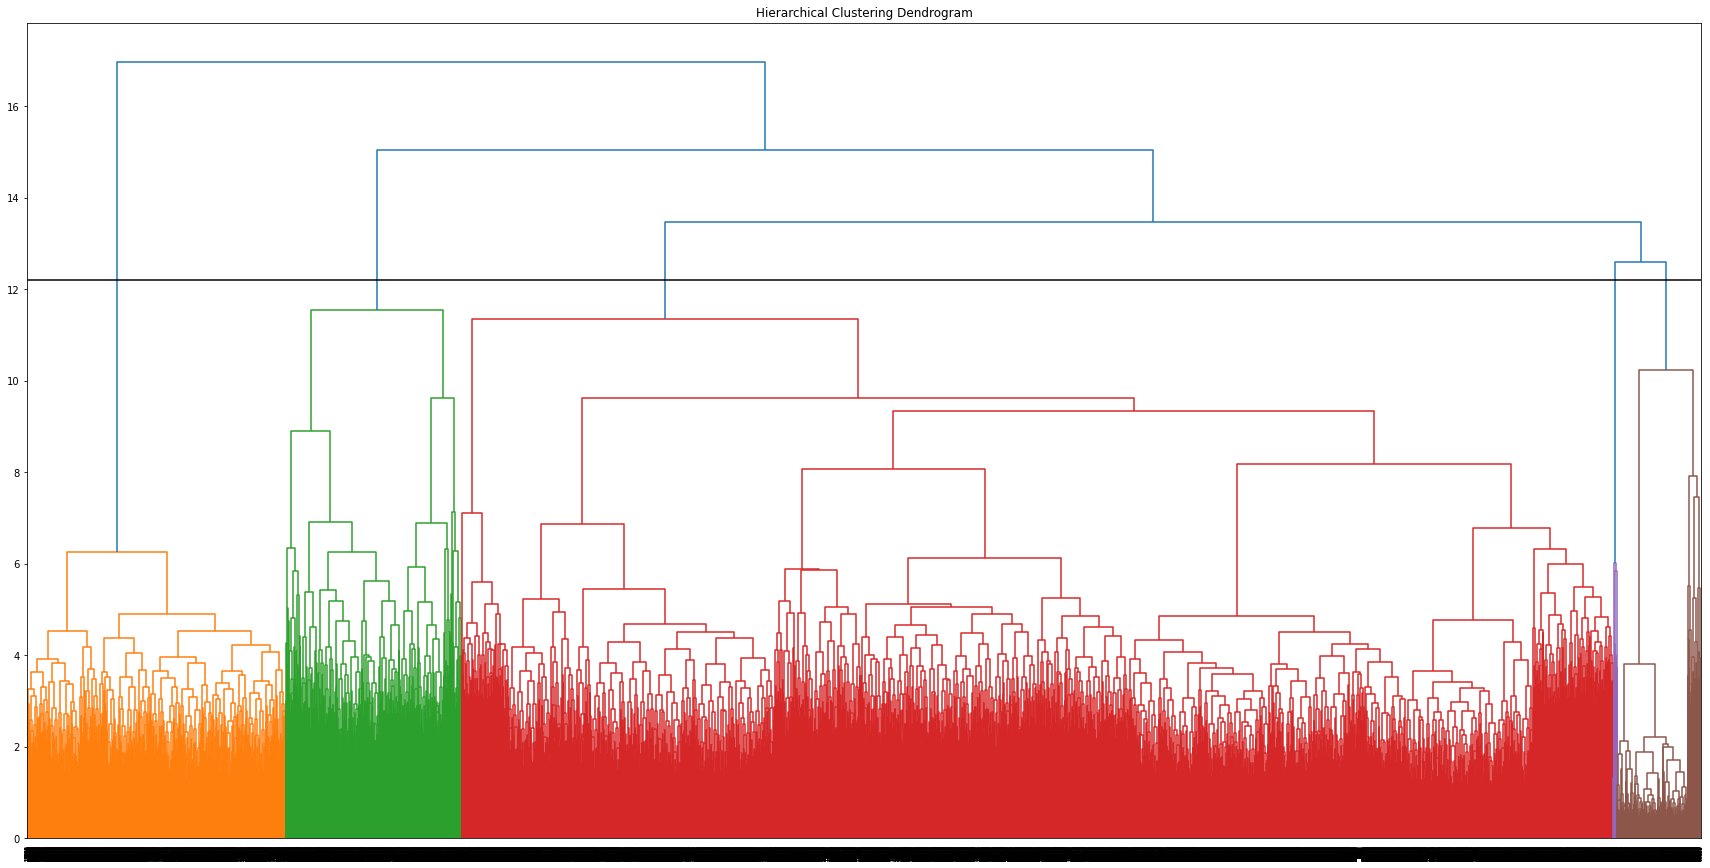

In [ ]:
plot_dendrogram(people_rb_scl, 'complete', cut_line = 12.2)

In [ ]:
people['rb_complete5'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 5
    ).fit_predict(people_rb_scl)

In [ ]:
clusters_comparison(people, 'rb_complete5', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
rb_complete5 0 Cluster                   0                   0   
rb_complete5 1 Cluster                4764                   0   
rb_complete5 2 Cluster                   0                   0   
rb_complete5 3 Cluster                   0                4610   
rb_complete5 4 Cluster                   0                   0   

                        pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
rb_complete5 0 Cluster                3121                   0   
rb_complete5 1 Cluster                1546                4722   
rb_complete5 2 Cluster                   0                   0   
rb_complete5 3 Cluster                   0                   0   
rb_complete5 4 Cluster                   0                   0   

                        pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
rb_complete5 0 Cluster                   0                   0   
rb_complete5 1 Cluster                4921                2262   
rb_complete5 2 Cluster                   0                 239   
rb_complete5 3 Cluster                   0                   0   
rb_complete5 4 Cluster                   0                  69   

                        pc_ward8 6 Cluster  pc_ward8 7 Cluster  
rb_complete5 0 Cluster                   0                   0  
rb_complete5 1 Cluster                   0                2272  
rb_complete5 2 Cluster                1248                   0  
rb_complete5 3 Cluster                   0                   0  
rb_complete5 4 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'rb_complete5')

rb_complete5                                       0            1           2  \
customer_gender                             0.512336     0.501391    0.498991   
customer_age                               55.918295    52.732855   30.748487   
kids_home                                   3.760333     0.943037    0.090114   
teens_home                                  2.147389     0.400303    0.086079   
number_complaints                           0.939122     0.801484    0.534633   
distinct_stores_visited                     3.002884     7.909162    1.839274   
spend_groceries                          4995.415252  5010.848977  116.386685   
spend_electronics                         200.043576   256.587592   18.289845   
typical_hour                               17.390900    12.185288   19.745797   
spend_vegetables                          602.369433   727.164006   33.002017   
spend_nonalcohol_drinks                   901.546299   431.913116  183.848689   
spend_alcohol_drinks                      500.559116   307.408698  803.751177   
spend_meat                               1100.779558   568.000146   49.938130   
spend_fish                               1099.108619   567.431884   50.031607   
spend_hygiene                             503.369112   146.722312   49.776059   
spend_videogames                          996.993271   177.588568   84.067249   
total_distinct_products                  2002.793015  1311.818519   83.112979   
percentage_of_products_bought_promotion     0.200211     0.209264    0.199952   
customer_loyalty                            0.277475     0.216772    0.020175   
latitude                                   38.749471    38.748321   38.727966   
longitude                                  -9.157910    -9.157160   -9.172578   
percentage_spend_groceries                  0.458390     0.424994    0.093902   
percentage_spend_electronics                0.018366     0.044028    0.013103   
percentage_spend_vegetables                 0.055227     0.205806    0.030394   
percentage_spend_nonalcohol_drinks          0.082702     0.083730    0.131698   
percentage_spend_alcohol_drinks             0.045882     0.060892    0.561593   
percentage_spend_meat                       0.100992     0.064253    0.037614   
percentage_spend_fish                       0.100839     0.064014    0.037685   
percentage_spend_hygiene                    0.046141     0.026426    0.037538   
percentage_spend_videogames                 0.091462     0.025857    0.056473   
customer_education                          0.942006     0.744960    0.004035   

rb_complete5                                       3           4  
customer_gender                             0.505857    0.637681  
customer_age                               56.326247   71.956522  
kids_home                                   0.689588    0.463768  
teens_home                                  0.068547    0.594203  
number_complaints                           0.500000    6.956522  
distinct_stores_visited                     1.992625    1.000000  
spend_groceries                           200.406291  195.985507  
spend_electronics                        4999.557484   10.159420  
typical_hour                               20.951844   10.115942  
spend_vegetables                           20.033623  100.318841  
spend_nonalcohol_drinks                  1500.946855  100.086957  
spend_alcohol_drinks                      499.866161  290.391304  
spend_meat                                 57.739913   45.927536  
spend_fish                                 58.946421   52.594203  
spend_hygiene                              49.912148   48.666667  
spend_videogames                         2002.197397    0.000000  
total_distinct_products                    99.785249   99.362319  
percentage_of_products_bought_promotion     0.100002    0.200313  
customer_loyalty                            0.100000    0.057971  
latitude                                   38.747749   38.744490  


gamers | alcoholics(??) | parents(???) | others

---

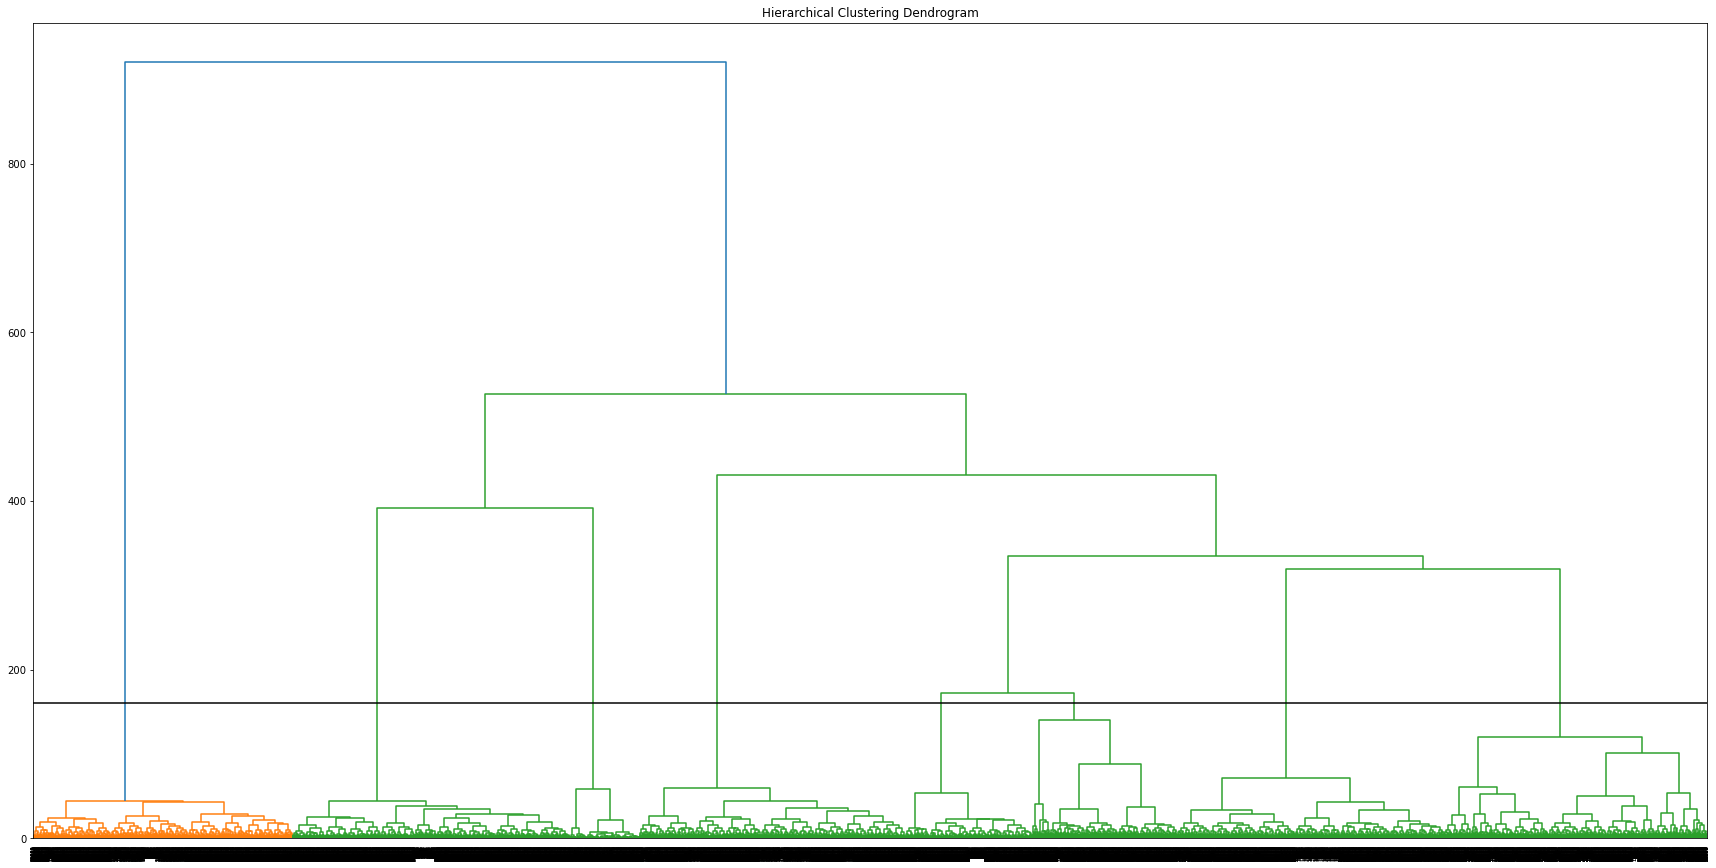

In [ ]:
plot_dendrogram(people_rb_scl, 'ward', cut_line = 160)

In [ ]:
# people['rb_ward7'] = AgglomerativeClustering(
#     linkage = 'ward', n_clusters = 7
#     ).fit_predict(people_rb_scl)

people['rb_ward8'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 8
    ).fit_predict(people_rb_scl)

In [ ]:
# clusters_comparison(people, 'rb_ward7', 'rb_ward8')

In [ ]:
clusters_comparison(people, 'pc_ward8', 'rb_ward8')

rb_ward8 0 Cluster  rb_ward8 1 Cluster  \
pc_ward8 0 Cluster                   0                   0   
pc_ward8 1 Cluster                   0                   0   
pc_ward8 2 Cluster                   0                   0   
pc_ward8 3 Cluster                   0                4722   
pc_ward8 4 Cluster                   0                   0   
pc_ward8 5 Cluster                2570                   0   
pc_ward8 6 Cluster                   0                   0   
pc_ward8 7 Cluster                   0                   0   

                    rb_ward8 2 Cluster  rb_ward8 3 Cluster  \
pc_ward8 0 Cluster                   0                   0   
pc_ward8 1 Cluster                   0                   0   
pc_ward8 2 Cluster                4667                   0   
pc_ward8 3 Cluster                   0                   0   
pc_ward8 4 Cluster                   0                   0   
pc_ward8 5 Cluster                   0                   0   
pc_ward8 6 Cluster                   0                   0   
pc_ward8 7 Cluster                   0                2272   

                    rb_ward8 4 Cluster  rb_ward8 5 Cluster  \
pc_ward8 0 Cluster                   0                   0   
pc_ward8 1 Cluster                   0                   0   
pc_ward8 2 Cluster                   0                   0   
pc_ward8 3 Cluster                   0                   0   
pc_ward8 4 Cluster                4921                   0   
pc_ward8 5 Cluster                   0                   0   
pc_ward8 6 Cluster                   0                1248   
pc_ward8 7 Cluster                   0                   0   

                    rb_ward8 6 Cluster  rb_ward8 7 Cluster  
pc_ward8 0 Cluster                4764                   0  
pc_ward8 1 Cluster                   0                4610  
pc_ward8 2 Cluster                   0                   0  
pc_ward8 3 Cluster                   0                   0  
pc_ward8 4 Cluster                   0                   0  
pc_ward8 5 Cluster                   0                   0  
pc_ward8 6 Cluster                   0                   0  
pc_ward8 7 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'rb_ward8')

rb_ward8                                          0            1            2  \
customer_gender                            0.503502     0.509530     0.499893   
customer_age                              54.668482    55.980940    56.162846   
kids_home                                  0.508560     1.160525     3.078852   
teens_home                                 0.519844     0.771495     1.811656   
number_complaints                          0.932685     0.310885     0.933576   
distinct_stores_visited                    1.890272     2.000212     3.007285   
spend_groceries                          567.300778   997.551461  4997.018856   
spend_electronics                        538.980156    50.036637   200.006642   
typical_hour                              13.444747     9.988564    17.401971   
spend_vegetables                         278.354864  1499.739094   602.098779   
spend_nonalcohol_drinks                  278.221401    20.005294   900.787872   
spend_alcohol_drinks                     297.955642    20.117535   500.900364   
spend_meat                               181.542412     0.000000  1100.662738   
spend_fish                               181.359922     0.000000  1101.494750   
spend_hygiene                             50.104280   100.033037   500.748018   
spend_videogames                         176.022568    49.929691   997.704307   
total_distinct_products                   63.334630   199.708598  2001.371759   
percentage_of_products_bought_promotion    0.112244     0.049988     0.200119   
customer_loyalty                           0.047471     0.049979     0.299979   
latitude                                  38.748020    38.748634    38.749548   
longitude                                 -9.158964    -9.157192    -9.157408   
percentage_spend_groceries                 0.212316     0.360987     0.458474   
percentage_spend_electronics               0.185115     0.018380     0.018360   
percentage_spend_vegetables                0.113954     0.550838     0.055201   
percentage_spend_nonalcohol_drinks         0.113797     0.007344     0.082623   
percentage_spend_alcohol_drinks            0.138933     0.007386     0.045909   
percentage_spend_meat                      0.072392     0.000000     0.100971   
percentage_spend_fish                      0.072709     0.000000     0.101051   
percentage_spend_hygiene                   0.023861     0.036729     0.045893   
percentage_spend_videogames                0.066922     0.018336     0.091518   
customer_education                         0.345525     1.007624     0.995715   

rb_ward8                                           3           4           5  \
customer_gender                             0.490317    0.508433    0.500801   
customer_age                               29.517606   55.883763   22.994391   
kids_home                                   0.162852    1.000203    0.016026   
teens_home                                  0.000000    0.069904    0.000000   
number_complaints                           0.018486    1.010567    0.000000   
distinct_stores_visited                     3.009683   20.001829    2.000000   
spend_groceries                          6998.608715  302.959764  100.346955   
spend_electronics                        1002.705986   20.000000   19.899038   
typical_hour                               18.956426    8.991668   21.606571   
spend_vegetables                          402.549736  300.231863   20.133814   
spend_nonalcohol_drinks                   400.469190  300.431823  199.929487   
spend_alcohol_drinks                      402.982394  199.776671  900.553686   
spend_meat                                699.633363  151.107702   49.848558   
spend_fish                                699.194542  149.465962   49.891026   
spend_hygiene                             200.338908   50.032514   49.731571   
spend_videogames                          502.893926    5.000000  100.166667   
total_distinct_products                   502.5

gamers | spenders | veggies | alcoholics | parents | promo hunters | young adults | low standards

---

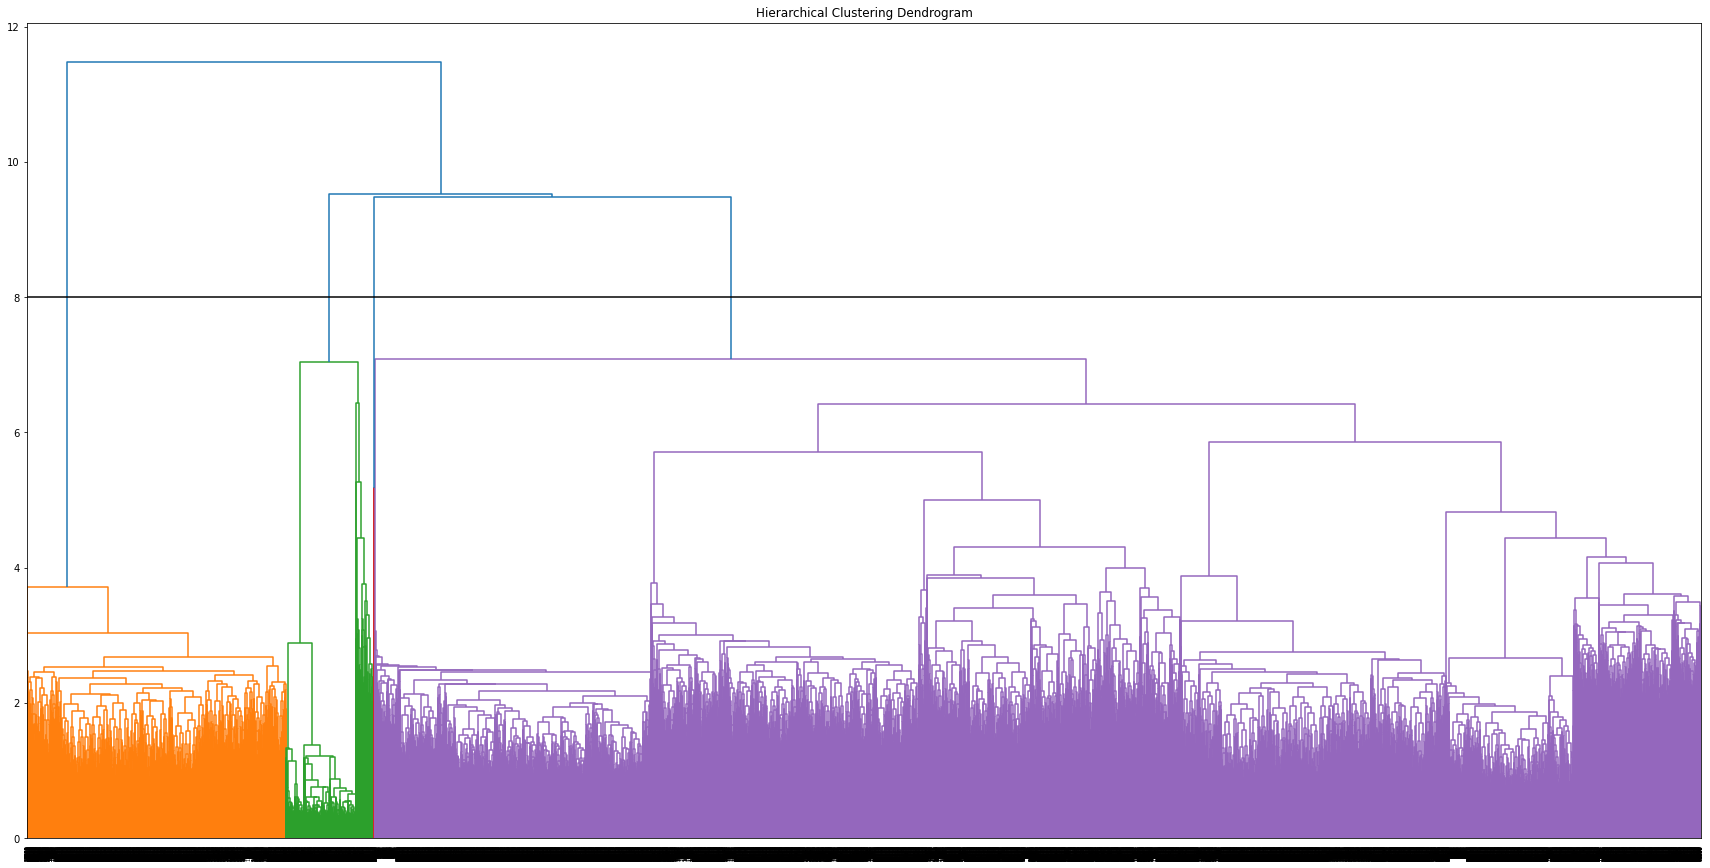

In [ ]:
plot_dendrogram(people_rb_scl, 'average', cut_line = 8)

In [ ]:
people['rb_average4'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 4
    ).fit_predict(people_rb_scl)

In [ ]:
clusters_comparison(people, 'rb_average4', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
rb_average4 0 Cluster                4764                   0   
rb_average4 1 Cluster                   0                   0   
rb_average4 2 Cluster                   0                   0   
rb_average4 3 Cluster                   0                4610   

                       pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
rb_average4 0 Cluster                4651                4722   
rb_average4 1 Cluster                  16                   0   
rb_average4 2 Cluster                   0                   0   
rb_average4 3 Cluster                   0                   0   

                       pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
rb_average4 0 Cluster                4921                2262   
rb_average4 1 Cluster                   0                   0   
rb_average4 2 Cluster                   0                 308   
rb_average4 3 Cluster                   0                   0   

                       pc_ward8 6 Cluster  pc_ward8 7 Cluster  
rb_average4 0 Cluster                   0                2272  
rb_average4 1 Cluster                   0                   0  
rb_average4 2 Cluster                1248                   0  
rb_average4 3 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'rb_average4')

rb_average4                                        0            1           2  \
customer_gender                             0.503052     0.187500    0.505141   
customer_age                               53.148991    60.500000   32.575835   
kids_home                                   1.310953     8.000000    0.106684   
teens_home                                  0.628815     4.250000    0.108612   
number_complaints                           0.819557     1.000000    0.819409   
distinct_stores_visited                     7.263310     3.187500    1.802057   
spend_groceries                          5008.846473  4953.000000  119.916452   
spend_electronics                         249.149034   195.125000   17.929306   
typical_hour                               12.869829    18.250000   19.318766   
spend_vegetables                          710.751399   584.812500   35.987147   
spend_nonalcohol_drinks                   493.725161   897.875000  180.134319   
spend_alcohol_drinks                      332.780222   573.500000  780.986504   
spend_meat                                638.103594  1125.750000   49.760283   
spend_fish                                637.387843  1127.562500   50.145244   
spend_hygiene                             193.677136   480.250000   49.726864   
spend_videogames                          285.420863  1014.000000   80.339332   
total_distinct_products                  1402.758944  2003.375000   83.833548   
percentage_of_products_bought_promotion     0.208072     0.200744    0.199968   
customer_loyalty                            0.224695     0.375000    0.021851   
latitude                                   38.748473    38.749401   38.728699   
longitude                                  -9.157272    -9.137284   -9.172547   
percentage_spend_groceries                  0.429393     0.452347    0.100061   
percentage_spend_electronics                0.040651     0.017833    0.013067   
percentage_spend_vegetables                 0.185989     0.053326    0.034408   
percentage_spend_nonalcohol_drinks          0.083595     0.081918    0.131206   
percentage_spend_alcohol_drinks             0.058913     0.052315    0.551666   
percentage_spend_meat                       0.069087     0.102865    0.038374   
percentage_spend_fish                       0.068859     0.102971    0.038772   
percentage_spend_hygiene                    0.029022     0.043825    0.038478   
percentage_spend_videogames                 0.034491     0.092601    0.053968   
customer_education                          0.770685     1.250000    0.003856   

rb_average4                                        3  
customer_gender                             0.505857  
customer_age                               56.326247  
kids_home                                   0.689588  
teens_home                                  0.068547  
number_complaints                           0.500000  
distinct_stores_visited                     1.992625  
spend_groceries                           200.406291  
spend_electronics                        4999.557484  
typical_hour                               20.951844  
spend_vegetables                           20.033623  
spend_nonalcohol_drinks                  1500.946855  
spend_alcohol_drinks                      499.866161  
spend_meat                                 57.739913  
spend_fish                                 58.946421  
spend_hygiene                              49.912148  
spend_videogames                         2002.197397  
total_distinct_products                    99.785249  
percentage_of_products_bought_promotion     0.100002  
customer_loyalty                            0.100000  
latitude                                   38.747749  
longitude                                  -9.157489  
percentage_spend_groceries                  0.021404  
percentage_spend_electronics                0.531238  
percentage_spend_vegetables                 0.002140  
percentage_spend_nonalcohol_drin

gamers | alcoholics(??) | others | 16

---

In [ ]:
# rb_meanshift = MeanShift(bandwidth = 2.5, n_jobs = -1, bin_seeding = True).fit(people_rb_scl)
# people['rb_meanshift8'] = rb_meanshift.labels_

rb_meanshift = MeanShift(bandwidth = 3, n_jobs = -1, bin_seeding = True).fit(people_rb_scl)
people['rb_meanshift9'] = rb_meanshift.labels_

In [ ]:
# clusters_comparison(people, 'rb_meanshift8', 'rb_meanshift9')

In [ ]:
clusters_comparison(people, 'rb_meanshift9', 'pc_ward8')

pc_ward8 0 Cluster  pc_ward8 1 Cluster  \
rb_meanshift9 0 Cluster                   0                   0   
rb_meanshift9 1 Cluster                4764                   0   
rb_meanshift9 2 Cluster                   0                   0   
rb_meanshift9 3 Cluster                   0                4610   
rb_meanshift9 4 Cluster                   0                   0   
rb_meanshift9 5 Cluster                   0                   0   
rb_meanshift9 6 Cluster                   0                   0   
rb_meanshift9 7 Cluster                   0                   0   
rb_meanshift9 8 Cluster                   0                   0   

                         pc_ward8 2 Cluster  pc_ward8 3 Cluster  \
rb_meanshift9 0 Cluster                   0                   0   
rb_meanshift9 1 Cluster                   0                   0   
rb_meanshift9 2 Cluster                   0                4722   
rb_meanshift9 3 Cluster                   0                   0   
rb_meanshift9 4 Cluster                4641                   0   
rb_meanshift9 5 Cluster                  26                   0   
rb_meanshift9 6 Cluster                   0                   0   
rb_meanshift9 7 Cluster                   0                   0   
rb_meanshift9 8 Cluster                   0                   0   

                         pc_ward8 4 Cluster  pc_ward8 5 Cluster  \
rb_meanshift9 0 Cluster                4921                   0   
rb_meanshift9 1 Cluster                   0                   0   
rb_meanshift9 2 Cluster                   0                   0   
rb_meanshift9 3 Cluster                   0                   1   
rb_meanshift9 4 Cluster                   0                   0   
rb_meanshift9 5 Cluster                   0                   5   
rb_meanshift9 6 Cluster                   0                2262   
rb_meanshift9 7 Cluster                   0                   3   
rb_meanshift9 8 Cluster                   0                 299   

                         pc_ward8 6 Cluster  pc_ward8 7 Cluster  
rb_meanshift9 0 Cluster                   0                   0  
rb_meanshift9 1 Cluster                   0                   0  
rb_meanshift9 2 Cluster                   0                   0  
rb_meanshift9 3 Cluster                   0                   0  
rb_meanshift9 4 Cluster                   0                   0  
rb_meanshift9 5 Cluster                   0                2272  
rb_meanshift9 6 Cluster                   0                   0  
rb_meanshift9 7 Cluster                1248                   0  
rb_meanshift9 8 Cluster                   0                   0

In [ ]:
groupby_mean(people, 'rb_meanshift9')

rb_meanshift9                                     0             1  \
customer_gender                            0.508433      0.500210   
customer_age                              55.883763     56.219563   
kids_home                                  1.000203      0.997901   
teens_home                                 0.069904      0.271620   
number_complaints                          1.010567      1.551008   
distinct_stores_visited                   20.001829      7.999580   
spend_groceries                          302.959764  14993.307935   
spend_electronics                         20.000000    199.970403   
typical_hour                               8.991668     11.914568   
spend_vegetables                         300.231863    799.560034   
spend_nonalcohol_drinks                  300.431823    900.786104   
spend_alcohol_drinks                     199.776671    599.145886   
spend_meat                               151.107702   1501.016583   
spend_fish                               149.465962   1498.781276   
spend_hygiene                             50.032514    199.985306   
spend_videogames                           5.000000     50.012804   
total_distinct_products                  499.575493   4011.462636   
percentage_of_products_bought_promotion    0.499966      0.149955   
customer_loyalty                           0.049990      0.599916   
latitude                                  38.747834     38.747749   
longitude                                 -9.157208     -9.157703   
percentage_spend_groceries                 0.197824      0.722259   
percentage_spend_electronics               0.013706      0.009665   
percentage_spend_vegetables                0.204999      0.038626   
percentage_spend_nonalcohol_drinks         0.205122      0.043512   
percentage_spend_alcohol_drinks            0.136196      0.028935   
percentage_spend_meat                      0.102781      0.072525   
percentage_spend_fish                      0.101698      0.072418   
percentage_spend_hygiene                   0.034247      0.009642   
percentage_spend_videogames                0.003427      0.002417   
customer_education                         0.198537      0.701511   

rb_meanshift9                                      2            3  \
customer_gender                             0.509530     0.505964   
customer_age                               55.980940    56.327695   
kids_home                                   1.160525     0.689438   
teens_home                                  0.771495     0.068749   
number_complaints                           0.310885     0.500108   
distinct_stores_visited                     2.000212     1.992626   
spend_groceries                           997.551461   200.371286   
spend_electronics                          50.036637  4998.943396   
typical_hour                                9.988564    20.948384   
spend_vegetables                         1499.739094    20.074604   
spend_nonalcohol_drinks                    20.005294  1500.682282   
spend_alcohol_drinks                       20.117535   499.821080   
spend_meat                                  0.000000    57.740187   
spend_fish                                  0.000000    58.946216   
spend_hygiene                             100.033037    49.911950   
spend_videogames                           49.929691  2001.806983   
total_distinct_products                   199.708598    99.780091   
percentage_of_products_bought_promotion     0.049988     0.099999   
customer_loyalty                            0.049979     0.099978   
latitude                                   38.748634    38.747752   
longitude                                  -9.157192    -9.157493   
percentage_spend_groceries                  0.360987     0.021402   
percentage_spend_electronics                0.018380     0.531263   
percentage_spend_vegetables                 0.550838     0.002153   
percentage_spend_nonalcohol_drinks          0.007344     0.160304 

spenders | promo hunters | veggies | gamers(+1) | alcoholics(+3) | parents(?) | low standards(?) | young adults (??) | 299

---
---

## Provisional best solution

Hierarchical clustering ward method was chosen as the best even with principal components, standard scaler and robust scaler.

In [ ]:
pd.concat([groupby_mean(people, 'pc_ward8'),
          people.iloc[:,:31].mean()],
          axis = 1)

0            1  \
customer_gender                              0.500210     0.505857   
customer_age                                56.219563    56.326247   
kids_home                                    0.997901     0.689588   
teens_home                                   0.271620     0.068547   
number_complaints                            1.551008     0.500000   
distinct_stores_visited                      7.999580     1.992625   
spend_groceries                          14993.307935   200.406291   
spend_electronics                          199.970403  4999.557484   
typical_hour                                11.914568    20.951844   
spend_vegetables                           799.560034    20.033623   
spend_nonalcohol_drinks                    900.786104  1500.946855   
spend_alcohol_drinks                       599.145886   499.866161   
spend_meat                                1501.016583    57.739913   
spend_fish                                1498.781276    58.946421   
spend_hygiene                              199.985306    49.912148   
spend_videogames                            50.012804  2002.197397   
total_distinct_products                   4011.462636    99.785249   
percentage_of_products_bought_promotion      0.149955     0.100002   
customer_loyalty                             0.599916     0.100000   
latitude                                    38.747749    38.747749   
longitude                                   -9.157703    -9.157489   
percentage_spend_groceries                   0.722259     0.021404   
percentage_spend_electronics                 0.009665     0.531238   
percentage_spend_vegetables                  0.038626     0.002140   
percentage_spend_nonalcohol_drinks           0.043512     0.160321   
percentage_spend_alcohol_drinks              0.028935     0.053375   
percentage_spend_meat                        0.072525     0.006150   
percentage_spend_fish                        0.072418     0.006280   
percentage_spend_hygiene                     0.009642     0.005326   
percentage_spend_videogames                  0.002417     0.213766   
customer_education                           0.701511     1.008894   

                                                   2            3           4  \
customer_gender                             0.499893     0.509530    0.508433   
customer_age                               56.162846    55.980940   55.883763   
kids_home                                   3.078852     1.160525    1.000203   
teens_home                                  1.811656     0.771495    0.069904   
number_complaints                           0.933576     0.310885    1.010567   
distinct_stores_visited                     3.007285     2.000212   20.001829   
spend_groceries                          4997.018856   997.551461  302.959764   
spend_electronics                         200.006642    50.036637   20.000000   
typical_hour                               17.401971     9.988564    8.991668   
spend_vegetables                          602.098779  1499.739094  300.231863   
spend_nonalcohol_drinks                   900.787872    20.005294  300.431823   
spend_alcohol_drinks                      500.900364    20.117535  199.776671   
spend_meat                               1100.662738     0.000000  151.107702   
spend_fish                               1101.494750     0.000000  149.465962   
spend_hygiene                             500.748018   100.033037   50.032514   
spend_videogames                          997.704307    49.929691    5.000000   
total_distinct_products                  2001.371759   199.708598  499.575493   
percentage_of_products_bought_promotion     0.200119     0.049988    0.499966   
customer_loyalty                            0.299979     0.049979    0.049990   
latitude                                   38.749548    38.748634   38.747834   
longitude                                  -9.157408    -9.157192   -9.157208   
percentage_spend_groceries   

In [ ]:
gamers = people[people['pc_ward8'] == 1] #4610
spenders = people[people['pc_ward8'] == 0] #4765
veggies = people[people['pc_ward8'] == 3] #4772
promo_hunters = people[people['pc_ward8'] == 4] #4921
alcoholics = people[people['pc_ward8'] == 6] #1248
parents = people[people['pc_ward8'] == 2] #4667
young_adults = people[people['pc_ward8'] == 7] #2272
low_standards = people[people['pc_ward8'] == 5] #2570

## Subset analysis

Since young adults and low standards are the most inconsistent clusters, they will get an individual cluster analysis.

In [ ]:
people_subset = people_no_scl[people_no_scl.index.isin(np.concatenate([young_adults.index, low_standards.index]))].copy()

In [ ]:
people_subset_st_scl = StandardScaler().fit_transform(people_subset)
people_subset_mm_scl = MinMaxScaler().fit_transform(people_subset)
people_subset_rb_scl = RobustScaler().fit_transform(people_subset)

---

### Standard

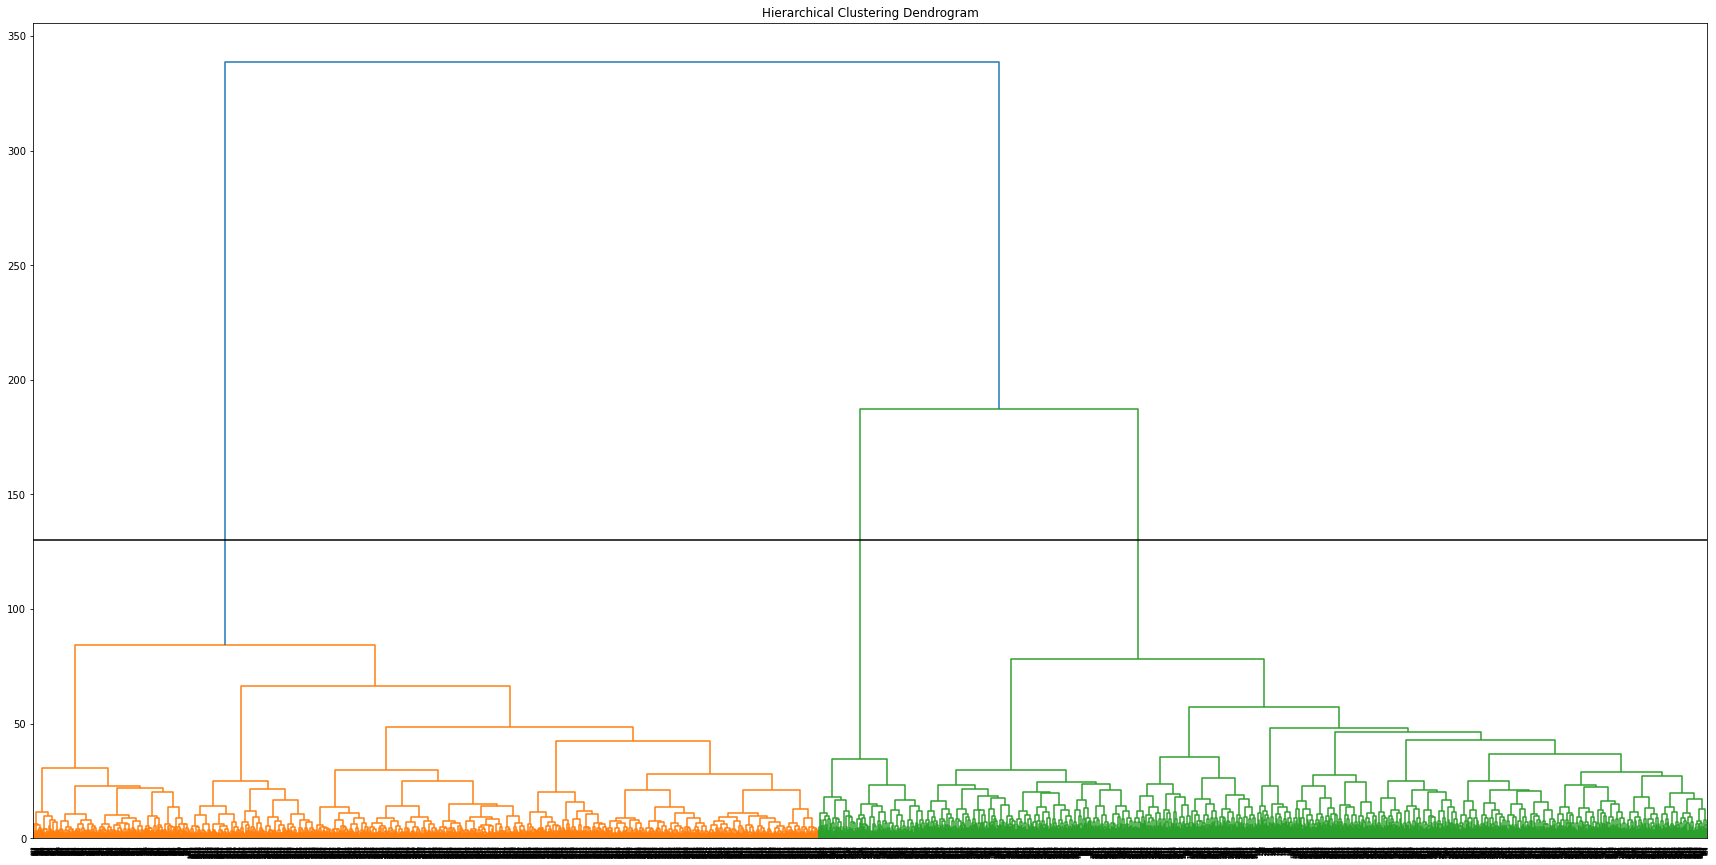

In [ ]:
plot_dendrogram(people_subset_st_scl, linkage_method = 'ward', cut_line = 130)

In [ ]:
people_subset['st_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(people_subset_st_scl)

In [ ]:
groupby_mean(people_subset, 'st_ward3')

st_ward3                                           0           1           2
customer_gender                             0.490317    0.500884    0.522727
customer_age                               29.517606   52.390363   71.399351
kids_home                                   0.162852    0.513263    0.474026
teens_home                                  0.000000    0.515915    0.548701
number_complaints                           0.018486    0.496021    4.139610
distinct_stores_visited                     3.009683    2.011494    1.000000
spend_groceries                          6998.608715  617.420866  199.211039
spend_electronics                        1002.705986  611.014589    9.948052
typical_hour                               18.956426   13.907162   10.048701
spend_vegetables                          402.549736  302.609637  100.224026
spend_nonalcohol_drinks                   400.469190  302.498674   99.925325
spend_alcohol_drinks                      402.982394  298.152962  296.506494
spend_meat                                699.633363  199.534925   49.402597
spend_fish                                699.194542  199.086207   51.175325
spend_hygiene                             200.338908   50.158267   49.707792
spend_videogames                          502.893926  199.990274    0.000000
total_distinct_products                   502.506162   58.268789  100.538961
percentage_of_products_bought_promotion     0.149835    0.100307    0.199909
customer_loyalty                            0.199824    0.049956    0.029221
latitude                                   38.749198   38.748111   38.747348
longitude                                  -9.156626   -9.156902   -9.174110
percentage_spend_groceries                  0.618400    0.209486    0.233096
percentage_spend_electronics                0.088581    0.208708    0.011844
percentage_spend_vegetables                 0.035662    0.113259    0.119057
percentage_spend_nonalcohol_drinks          0.035484    0.113124    0.118742
percentage_spend_alcohol_drinks             0.035709    0.111569    0.339900
percentage_spend_meat                       0.062012    0.074324    0.058205
percentage_spend_fish                       0.061959    0.074427    0.060095
percentage_spend_hygiene                    0.017687    0.019068    0.059062
percentage_spend_videogames                 0.044507    0.076035    0.000000
customer_education                          1.582746    0.389920    0.019481

young adults | low standards | olds

---

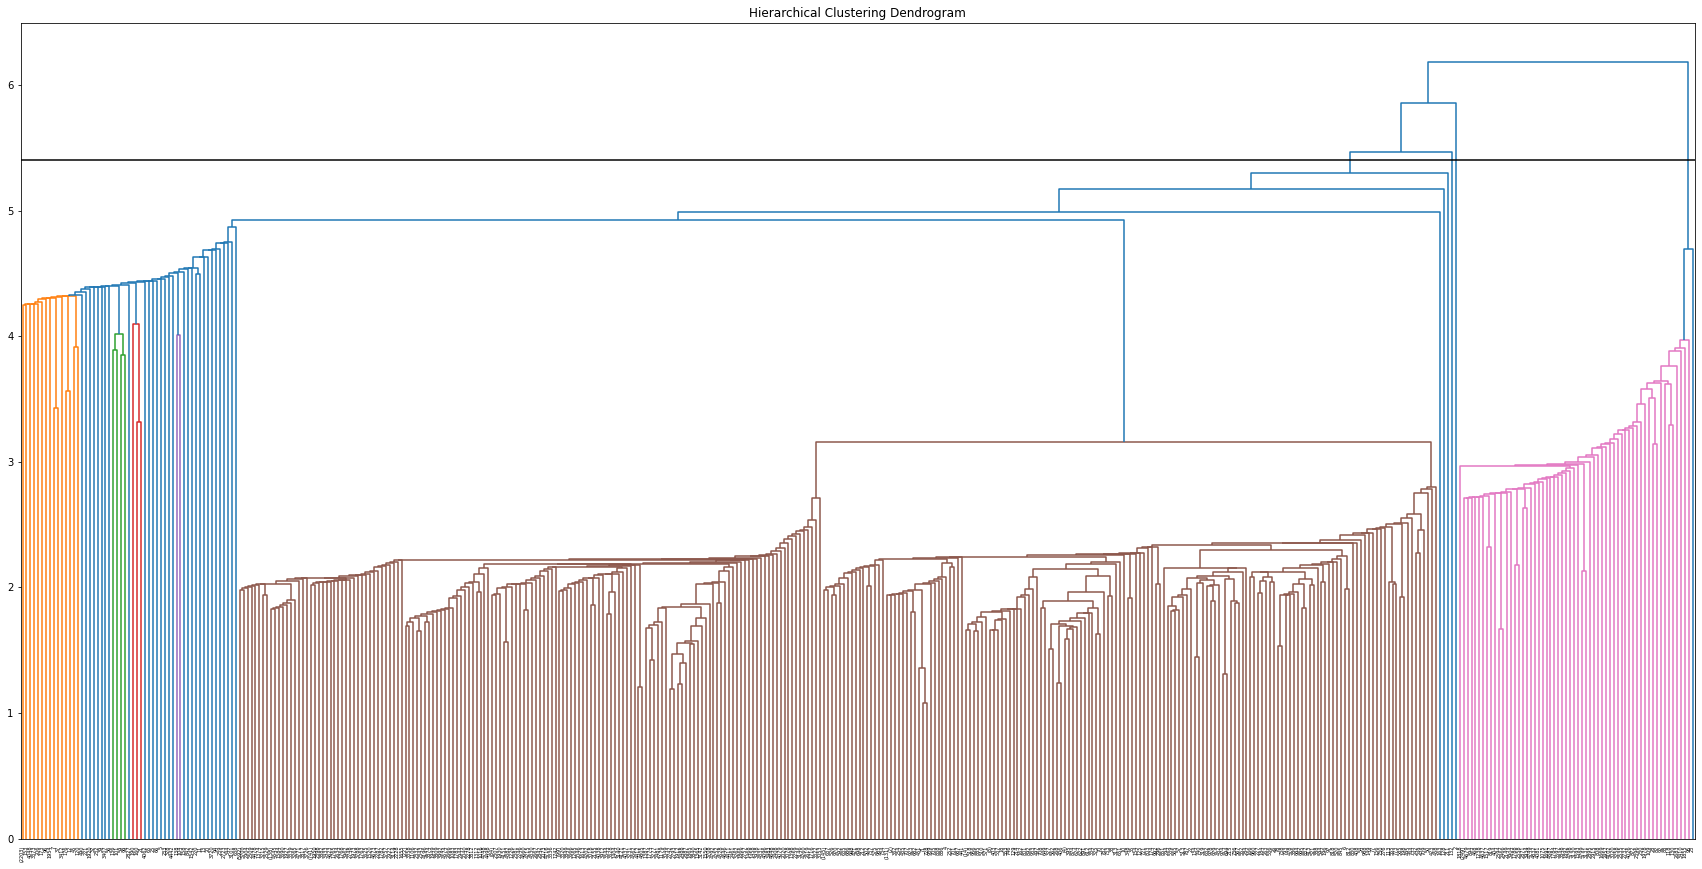

In [ ]:
plot_dendrogram(people_subset_st_scl, linkage_method = 'single', cut_line = 5.4)

In [ ]:
people_subset['st_single4'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 4
    ).fit_predict(people_subset_st_scl)

In [ ]:
clusters_comparison(people_subset, 'st_single4', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
st_single4 0 Cluster                2272                2260   
st_single4 1 Cluster                   0                   0   
st_single4 2 Cluster                   0                   1   
st_single4 3 Cluster                   0                   1   

                      st_ward3 2 Cluster  
st_single4 0 Cluster                   0  
st_single4 1 Cluster                 308  
st_single4 2 Cluster                   0  
st_single4 3 Cluster                   0

In [ ]:
groupby_mean(people_subset, 'st_single4')

st_single4                                         0           1           2  \
customer_gender                             0.495587    0.522727    1.000000   
customer_age                               40.923433   71.399351   32.000000   
kids_home                                   0.337599    0.474026    1.000000   
teens_home                                  0.257282    0.548701    1.000000   
number_complaints                           0.256620    4.139610    1.000000   
distinct_stores_visited                     2.512136    1.000000    2.000000   
spend_groceries                          3816.643425  199.211039  246.000000   
spend_electronics                         807.577670    9.948052   97.000000   
typical_hour                               16.442189   10.048701    7.000000   
spend_vegetables                          352.735878  100.224026  127.000000   
spend_nonalcohol_drinks                   351.689982   99.925325   78.000000   
spend_alcohol_drinks                      350.758826  296.506494  216.000000   
spend_meat                                450.166372   49.402597  327.000000   
spend_fish                                449.786408   51.175325  345.000000   
spend_hygiene                             125.448367   49.707792   58.000000   
spend_videogames                          351.843778    0.000000  195.000000   
total_distinct_products                   280.976611  100.538961   78.000000   
percentage_of_products_bought_promotion     0.125130    0.199909    0.123454   
customer_loyalty                            0.124669    0.029221    1.000000   
latitude                                   38.748664   38.747348   38.716784   
longitude                                  -9.156758   -9.174110   -9.158155   
percentage_spend_groceries                  0.414525    0.233096    0.145648   
percentage_spend_electronics                0.148539    0.011844    0.057430   
percentage_spend_vegetables                 0.074348    0.119057    0.075192   
percentage_spend_nonalcohol_drinks          0.074220    0.118742    0.046181   
percentage_spend_alcohol_drinks             0.073543    0.339900    0.127886   
percentage_spend_meat                       0.068091    0.058205    0.193606   
percentage_spend_fish                       0.068149    0.060095    0.204263   
percentage_spend_hygiene                    0.018372    0.059062    0.034340   
percentage_spend_videogames                 0.060214    0.000000    0.115453   
customer_education                          0.987202    0.019481    3.000000   

st_single4                                        3  
customer_gender                            0.000000  
customer_age                              74.000000  
kids_home                                  0.000000  
teens_home                                 0.000000  
number_complaints                          0.000000  
distinct_stores_visited                    1.000000  
spend_groceries                          171.000000  
spend_electronics                        224.000000  
typical_hour                               4.000000  
spend_vegetables                         370.000000  
spend_nonalcohol_drinks                  181.000000  
spend_alcohol_drinks                     143.000000  
spend_meat                               434.000000  
spend_fish                               126.000000  
spend_hygiene                             38.000000  
spend_videogames                         202.000000  
total_distinct_products                   34.000000  
percentage_of_products_bought_promotion    0.106402  
customer_loyalty                           1.000000  
latitude                                  38.742785  
longitude                                 -9.179939  
percentage_spend_groceries                 0.090524  
percentage_spend_electronics               0.118581  
percentage_spend_vegetables                0.195871  
percentage_spend_nonalcohol_drinks         0.095818  
percentage_spend_alcohol_drinks    

young adults | olds | low standards(-1) | 1

---

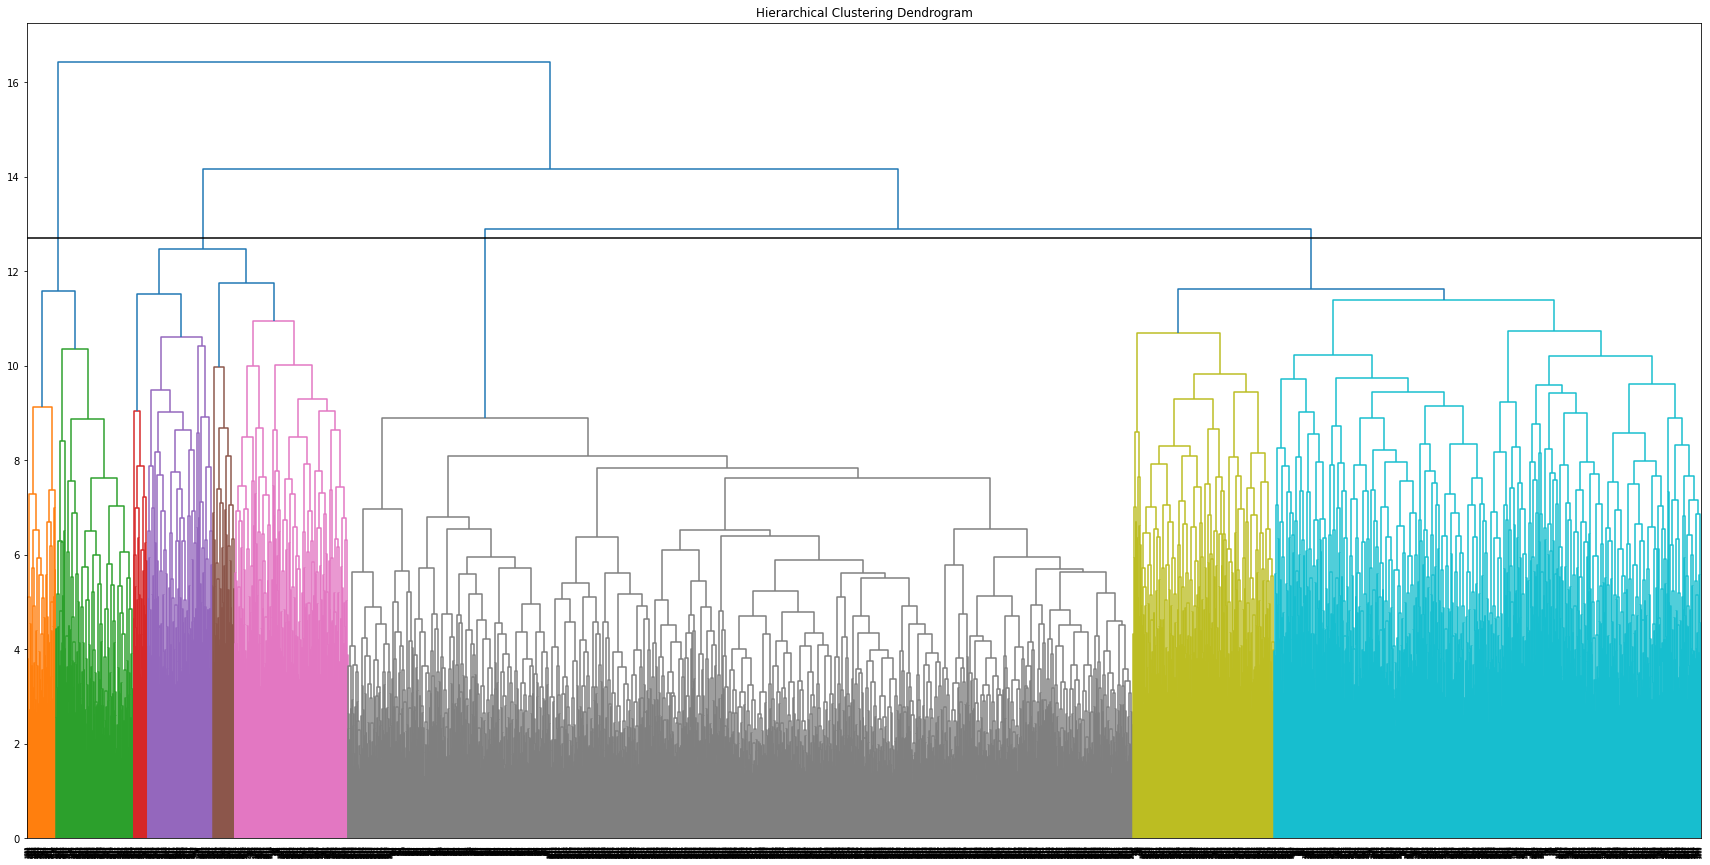

In [ ]:
plot_dendrogram(people_subset_st_scl, linkage_method = 'complete', cut_line = 12.7)

In [ ]:
people_subset['st_complete4'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 4
    ).fit_predict(people_subset_st_scl)

# people_subset['st_complete5'] = AgglomerativeClustering(
#     linkage = 'complete', n_clusters = 5
#     ).fit_predict(people_subset_st_scl)

In [ ]:
# clusters_comparison(people_subset, 'st_complete4', 'st_complete5')

In [ ]:
clusters_comparison(people_subset, 'st_complete4', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
st_complete4 0 Cluster                   0                 620   
st_complete4 1 Cluster                   0                   0   
st_complete4 2 Cluster                   0                1642   
st_complete4 3 Cluster                2272                   0   

                        st_ward3 2 Cluster  
st_complete4 0 Cluster                   0  
st_complete4 1 Cluster                 308  
st_complete4 2 Cluster                   0  
st_complete4 3 Cluster                   0

In [ ]:
groupby_mean(people_subset, 'st_complete4')

st_complete4                                      0           1           2  \
customer_gender                            0.475806    0.522727    0.510353   
customer_age                              54.275806   71.399351   51.678441   
kids_home                                  0.480645    0.474026    0.525579   
teens_home                                 0.624194    0.548701    0.475030   
number_complaints                          0.482258    4.139610    0.501218   
distinct_stores_visited                    2.000000    1.000000    2.015834   
spend_groceries                          418.133871  199.211039  692.669306   
spend_electronics                        307.612903    9.948052  725.575518   
typical_hour                              13.820968   10.048701   13.939708   
spend_vegetables                         309.864516  100.224026  299.870280   
spend_nonalcohol_drinks                  274.416129   99.925325  313.102314   
spend_alcohol_drinks                     281.493548  296.506494  304.443362   
spend_meat                               232.737097   49.402597  186.998173   
spend_fish                               209.640323   51.175325  195.101096   
spend_hygiene                             50.024194   49.707792   50.208892   
spend_videogames                         200.091935    0.000000  199.951888   
total_distinct_products                   57.682258  100.538961   58.490256   
percentage_of_products_bought_promotion    0.100804    0.199909    0.100119   
customer_loyalty                           0.059677    0.029221    0.046285   
latitude                                  38.749735   38.747348   38.747498   
longitude                                 -9.157023   -9.174110   -9.156856   
percentage_spend_groceries                 0.171302    0.233096    0.223904   
percentage_spend_electronics               0.132167    0.011844    0.237609   
percentage_spend_vegetables                0.138316    0.119057    0.103798   
percentage_spend_nonalcohol_drinks         0.123272    0.118742    0.109292   
percentage_spend_alcohol_drinks            0.125502    0.339900    0.106308   
percentage_spend_meat                      0.102679    0.058205    0.063617   
percentage_spend_fish                      0.093300    0.060095    0.067301   
percentage_spend_hygiene                   0.022696    0.059062    0.017698   
percentage_spend_videogames                0.090765    0.000000    0.070472   
customer_education                         0.319355    0.019481    0.416565   

st_complete4                                       3  
customer_gender                             0.490317  
customer_age                               29.517606  
kids_home                                   0.162852  
teens_home                                  0.000000  
number_complaints                           0.018486  
distinct_stores_visited                     3.009683  
spend_groceries                          6998.608715  
spend_electronics                        1002.705986  
typical_hour                               18.956426  
spend_vegetables                          402.549736  
spend_nonalcohol_drinks                   400.469190  
spend_alcohol_drinks                      402.982394  
spend_meat                                699.633363  
spend_fish                                699.194542  
spend_hygiene                             200.338908  
spend_videogames                          502.893926  
total_distinct_products                   502.506162  
percentage_of_products_bought_promotion     0.149835  
customer_loyalty                            0.199824  
latitude                                   38.749198  
longitude                                  -9.156626  
percentage_spend_groceries                  0.618400  
percentage_spend_electronics                0.088581  
percentage_spend_vegetables                 0.035662  
percentage_spend_nonalcohol_drinks          0.035484  
percentage_spend_alcohol_drinks          

young adults | olds | more spenders low standards | less spenders low standards 

---

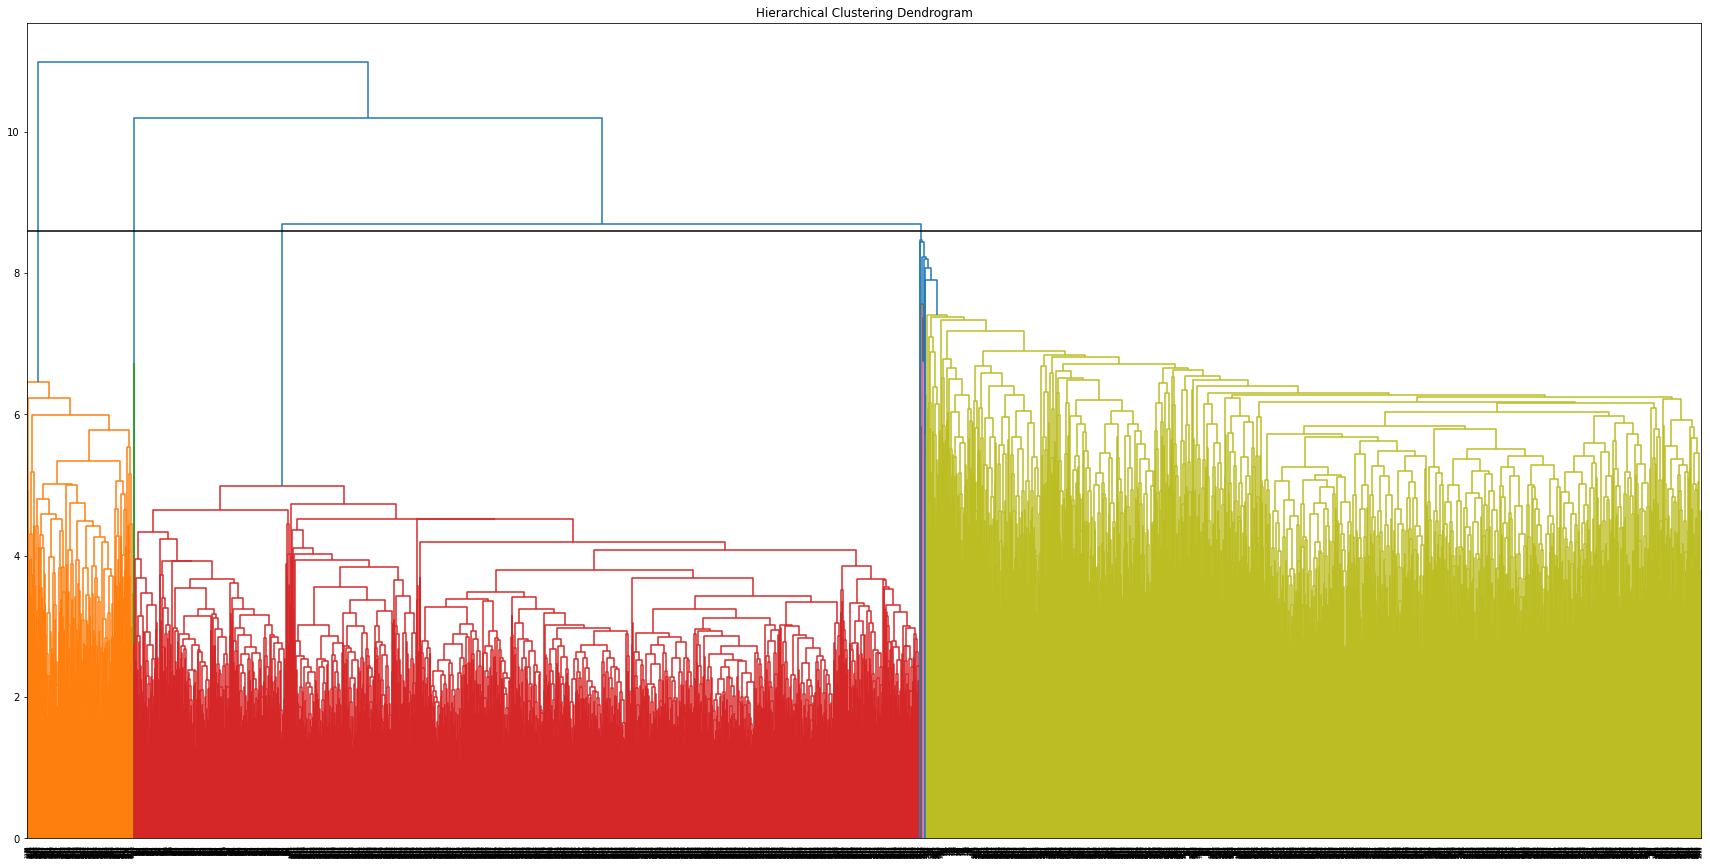

In [ ]:
plot_dendrogram(people_subset_st_scl, linkage_method = 'average', cut_line = 8.6)

In [ ]:
people_subset['st_average4'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 4
    ).fit_predict(people_subset_st_scl)

In [ ]:
clusters_comparison(people_subset, 'st_average4', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
st_average4 0 Cluster                   0                2260   
st_average4 1 Cluster                   0                   0   
st_average4 2 Cluster                   0                   2   
st_average4 3 Cluster                2272                   0   

                       st_ward3 2 Cluster  
st_average4 0 Cluster                   0  
st_average4 1 Cluster                 308  
st_average4 2 Cluster                   0  
st_average4 3 Cluster                   0

In [ ]:
groupby_mean(people_subset, 'st_average4')

st_average4                                       0           1           2  \
customer_gender                            0.500885    0.522727    0.500000   
customer_age                              52.394690   71.399351   47.500000   
kids_home                                  0.513274    0.474026    0.500000   
teens_home                                 0.515487    0.548701    1.000000   
number_complaints                          0.496018    4.139610    0.500000   
distinct_stores_visited                    2.011062    1.000000    2.500000   
spend_groceries                          617.773451  199.211039  219.000000   
spend_electronics                        611.466372    9.948052  100.500000   
typical_hour                              13.909292   10.048701   11.500000   
spend_vegetables                         302.740708  100.224026  154.500000   
spend_nonalcohol_drinks                  302.653982   99.925325  127.000000   
spend_alcohol_drinks                     298.156637  296.506494  294.000000   
spend_meat                               199.419469   49.402597  330.000000   
spend_fish                               198.984071   51.175325  314.500000   
spend_hygiene                             50.153097   49.707792   56.000000   
spend_videogames                         199.992920    0.000000  197.000000   
total_distinct_products                   58.246018  100.538961   84.000000   
percentage_of_products_bought_promotion    0.100298    0.199909    0.110175   
customer_loyalty                           0.049115    0.029221    1.000000   
latitude                                  38.748110   38.747348   38.749698   
longitude                                 -9.156919   -9.174110   -9.137503   
percentage_spend_groceries                 0.209563    0.233096    0.123457   
percentage_spend_electronics               0.208843    0.011844    0.056141   
percentage_spend_vegetables                0.113283    0.119057    0.085592   
percentage_spend_nonalcohol_drinks         0.113163    0.118742    0.069504   
percentage_spend_alcohol_drinks            0.111524    0.339900    0.162044   
percentage_spend_meat                      0.074226    0.058205    0.184619   
percentage_spend_fish                      0.074336    0.060095    0.177026   
percentage_spend_hygiene                   0.019057    0.059062    0.031410   
percentage_spend_videogames                0.076004    0.000000    0.110205   
customer_education                         0.388496    0.019481    2.000000   

st_average4                                        3  
customer_gender                             0.490317  
customer_age                               29.517606  
kids_home                                   0.162852  
teens_home                                  0.000000  
number_complaints                           0.018486  
distinct_stores_visited                     3.009683  
spend_groceries                          6998.608715  
spend_electronics                        1002.705986  
typical_hour                               18.956426  
spend_vegetables                          402.549736  
spend_nonalcohol_drinks                   400.469190  
spend_alcohol_drinks                      402.982394  
spend_meat                                699.633363  
spend_fish                                699.194542  
spend_hygiene                             200.338908  
spend_videogames                          502.893926  
total_distinct_products                   502.506162  
percentage_of_products_bought_promotion     0.149835  
customer_loyalty                            0.199824  
latitude                                   38.749198  
longitude                                  -9.156626  
percentage_spend_groceries                  0.618400  
percentage_spend_electronics                0.088581  
percentage_spend_vegetables                 0.035662  
percentage_spend_nonalcohol_drinks          0.035484  
percentage_spend_alcohol_drinks          

young adults | olds | low standards(-2) | 2

---
---

### MinMax

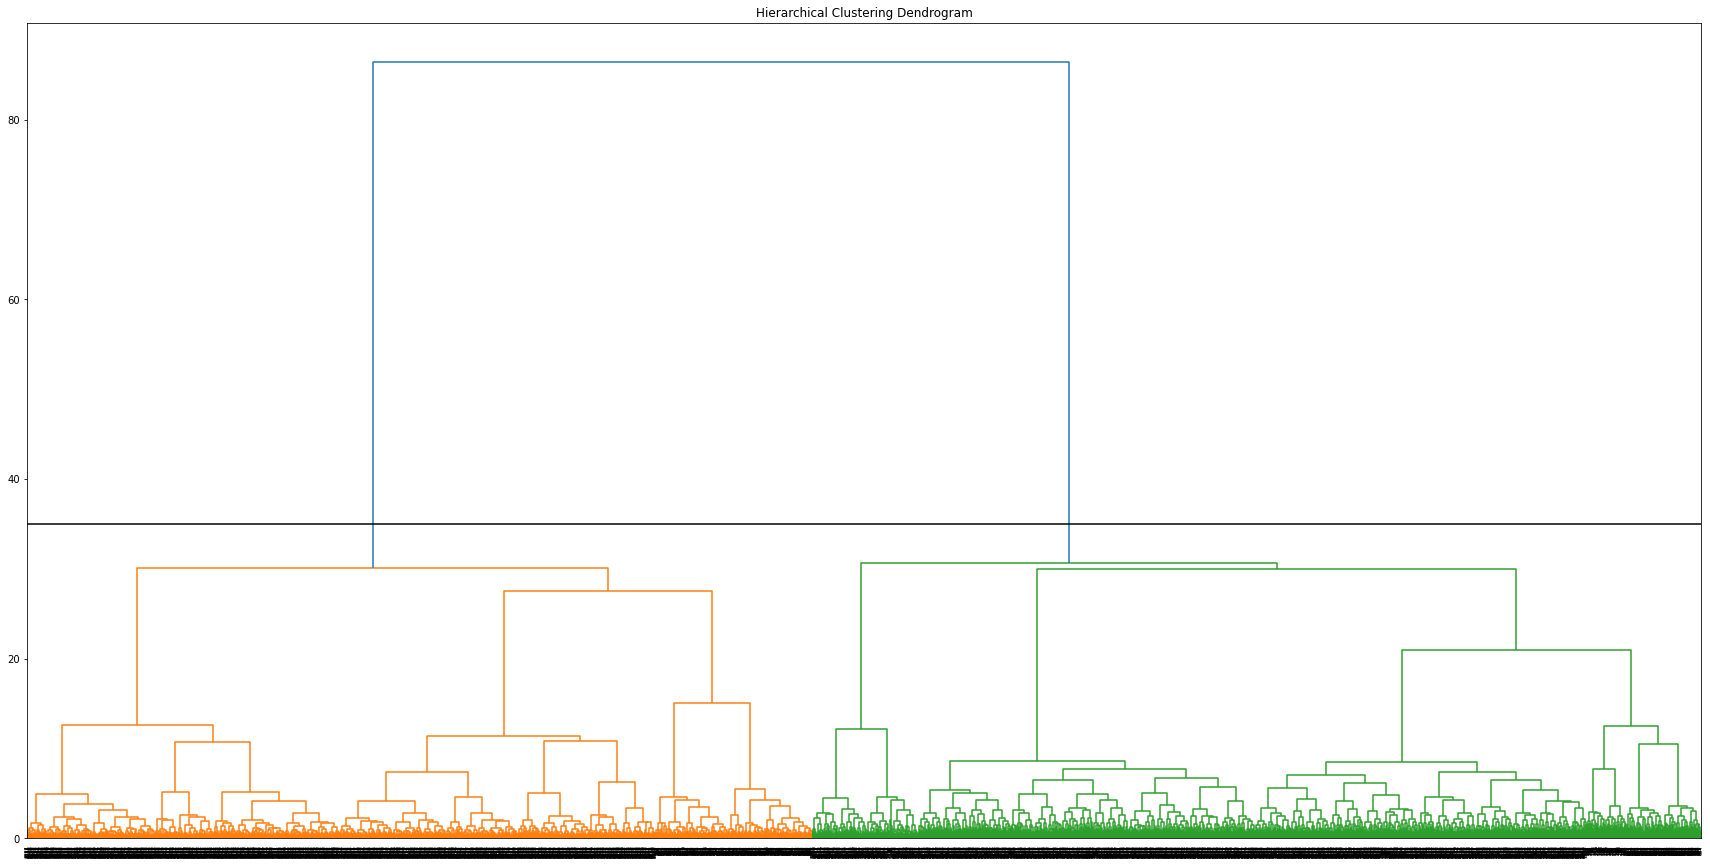

In [ ]:
plot_dendrogram(people_subset_mm_scl, linkage_method = 'ward', cut_line = 35)

In [ ]:
# people_subset['mm_ward2'] = AgglomerativeClustering(
#     linkage = 'ward', n_clusters = 2
#     ).fit_predict(people_subset_mm_scl)

people_subset['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(people_subset_mm_scl)

In [ ]:
# clusters_comparison(people_subset, 'mm_ward2', 'mm_ward3')

In [ ]:
clusters_comparison(people_subset, 'mm_ward3', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  st_ward3 2 Cluster
mm_ward3 0 Cluster                2272                   0                   0
mm_ward3 1 Cluster                   0                2262                   1
mm_ward3 2 Cluster                   0                   0                 307

In [ ]:
groupby_mean(people_subset, 'mm_ward3')

mm_ward3                                           0           1           2
customer_gender                             0.490317    0.501105    0.521173
customer_age                               29.517606   52.393725   71.436482
kids_home                                   0.162852    0.513478    0.472313
teens_home                                  0.000000    0.515687    0.550489
number_complaints                           0.018486    0.496686    4.146580
distinct_stores_visited                     3.009683    2.011047    1.000000
spend_groceries                          6998.608715  617.297393  198.758958
spend_electronics                        1002.705986  610.749448    9.944625
typical_hour                               18.956426   13.905877   10.045603
spend_vegetables                          402.549736  302.519664  100.228013
spend_nonalcohol_drinks                   400.469190  302.410959   99.912052
spend_alcohol_drinks                      402.982394  298.102961  296.869707
spend_meat                                699.633363  199.469289   49.397394
spend_fish                                699.194542  199.020327   51.179153
spend_hygiene                             200.338908   50.159965   49.693811
spend_videogames                          502.893926  199.901900    0.000000
total_distinct_products                   502.506162   58.283694  100.566775
percentage_of_products_bought_promotion     0.149835    0.100353    0.199890
customer_loyalty                            0.199824    0.050376    0.026059
latitude                                   38.749198   38.748097   38.747452
longitude                                  -9.156626   -9.156920   -9.174034
percentage_spend_groceries                  0.618400    0.209561    0.232621
percentage_spend_electronics                0.088581    0.208622    0.011842
percentage_spend_vegetables                 0.035662    0.113258    0.119083
percentage_spend_nonalcohol_drinks          0.035484    0.113126    0.118749
percentage_spend_alcohol_drinks             0.035709    0.111611    0.340331
percentage_spend_meat                       0.062012    0.074316    0.058208
percentage_spend_fish                       0.061959    0.074419    0.060109
percentage_spend_hygiene                    0.017687    0.019087    0.059057
percentage_spend_videogames                 0.044507    0.076001    0.000000
customer_education                          1.582746    0.391074    0.009772

young adults | low standards | olds

---

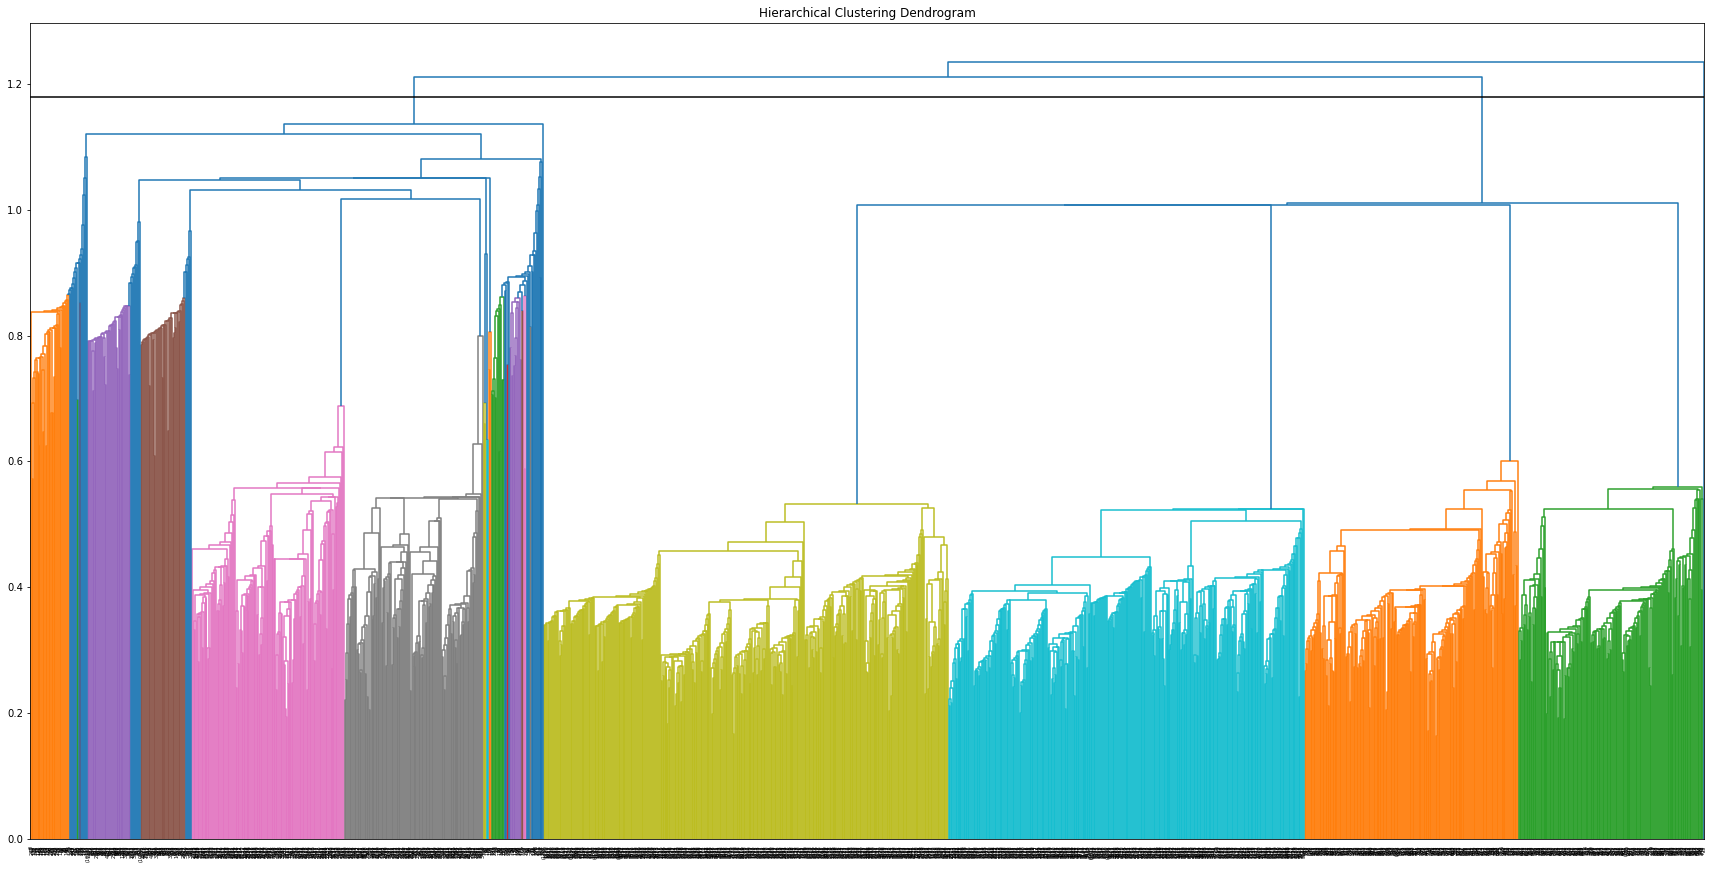

In [ ]:
plot_dendrogram(people_subset_mm_scl, linkage_method = 'single', cut_line = 1.18)

In [ ]:
people_subset['mm_single4'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 4
    ).fit_predict(people_subset_mm_scl)

In [ ]:
clusters_comparison(people_subset, 'mm_single4', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
mm_single4 0 Cluster                   0                2261   
mm_single4 1 Cluster                   0                   1   
mm_single4 2 Cluster                2272                   0   
mm_single4 3 Cluster                   0                   0   

                      st_ward3 2 Cluster  
mm_single4 0 Cluster                 307  
mm_single4 1 Cluster                   0  
mm_single4 2 Cluster                   0  
mm_single4 3 Cluster                   1

In [ ]:
groupby_mean(people_subset, 'mm_single4')

mm_single4                                        0           1            2  \
customer_gender                            0.503505    0.000000     0.490317   
customer_age                              54.675234   32.000000    29.517606   
kids_home                                  0.508567    0.000000     0.162852   
teens_home                                 0.519860    1.000000     0.000000   
number_complaints                          0.932243    1.000000     0.018486   
distinct_stores_visited                    1.890576    2.000000     3.009683   
spend_groceries                          567.487539  317.000000  6998.608715   
spend_electronics                        539.369159   68.000000  1002.705986   
typical_hour                              13.447819    8.000000    18.956426   
spend_vegetables                         278.447819  219.000000   402.549736   
spend_nonalcohol_drinks                  278.377726   51.000000   400.469190   
spend_alcohol_drinks                     297.989486  324.000000   402.982394   
spend_meat                               181.653037   28.000000   699.633363   
spend_fish                               181.387072  243.000000   699.194542   
spend_hygiene                             50.103193   49.000000   200.338908   
spend_videogames                         176.082555  198.000000   502.893926   
total_distinct_products                   63.319704   73.000000   502.506162   
percentage_of_products_bought_promotion    0.112202    0.124796     0.149835   
customer_loyalty                           0.046729    1.000000     0.199824   
latitude                                  38.748018   38.784640    38.749198   
longitude                                 -9.158952   -9.150964    -9.156626   
percentage_spend_groceries                 0.212251    0.211757     0.618400   
percentage_spend_electronics               0.185237    0.045424     0.088581   
percentage_spend_vegetables                0.113942    0.146293     0.035662   
percentage_spend_nonalcohol_drinks         0.113827    0.034068     0.035484   
percentage_spend_alcohol_drinks            0.138876    0.216433     0.035709   
percentage_spend_meat                      0.072419    0.018704     0.062012   
percentage_spend_fish                      0.072681    0.162325     0.061959   
percentage_spend_hygiene                   0.023844    0.032732     0.017687   
percentage_spend_videogames                0.066923    0.132265     0.044507   
customer_education                         0.343458    3.000000     1.582746   

mm_single4                                        3  
customer_gender                            1.000000  
customer_age                              60.000000  
kids_home                                  1.000000  
teens_home                                 0.000000  
number_complaints                          2.000000  
distinct_stores_visited                    1.000000  
spend_groceries                          338.000000  
spend_electronics                         11.000000  
typical_hour                              11.000000  
spend_vegetables                          99.000000  
spend_nonalcohol_drinks                  104.000000  
spend_alcohol_drinks                     185.000000  
spend_meat                                51.000000  
spend_fish                                50.000000  
spend_hygiene                             54.000000  
spend_videogames                           0.000000  
total_distinct_products                   92.000000  
percentage_of_products_bought_promotion    0.205853  
customer_loyalty                           1.000000  
latitude                                  38.715368  
longitude                                 -9.197416  
percentage_spend_groceries                 0.378924  
percentage_spend_electronics               0.012332  
percentage_spend_vegetables                0.110987  
percentage_spend_nonalcohol_drinks         0.116592  
percentage_spend_alcohol_drinks    

young adults | low standards | olds(-1) | 1

---

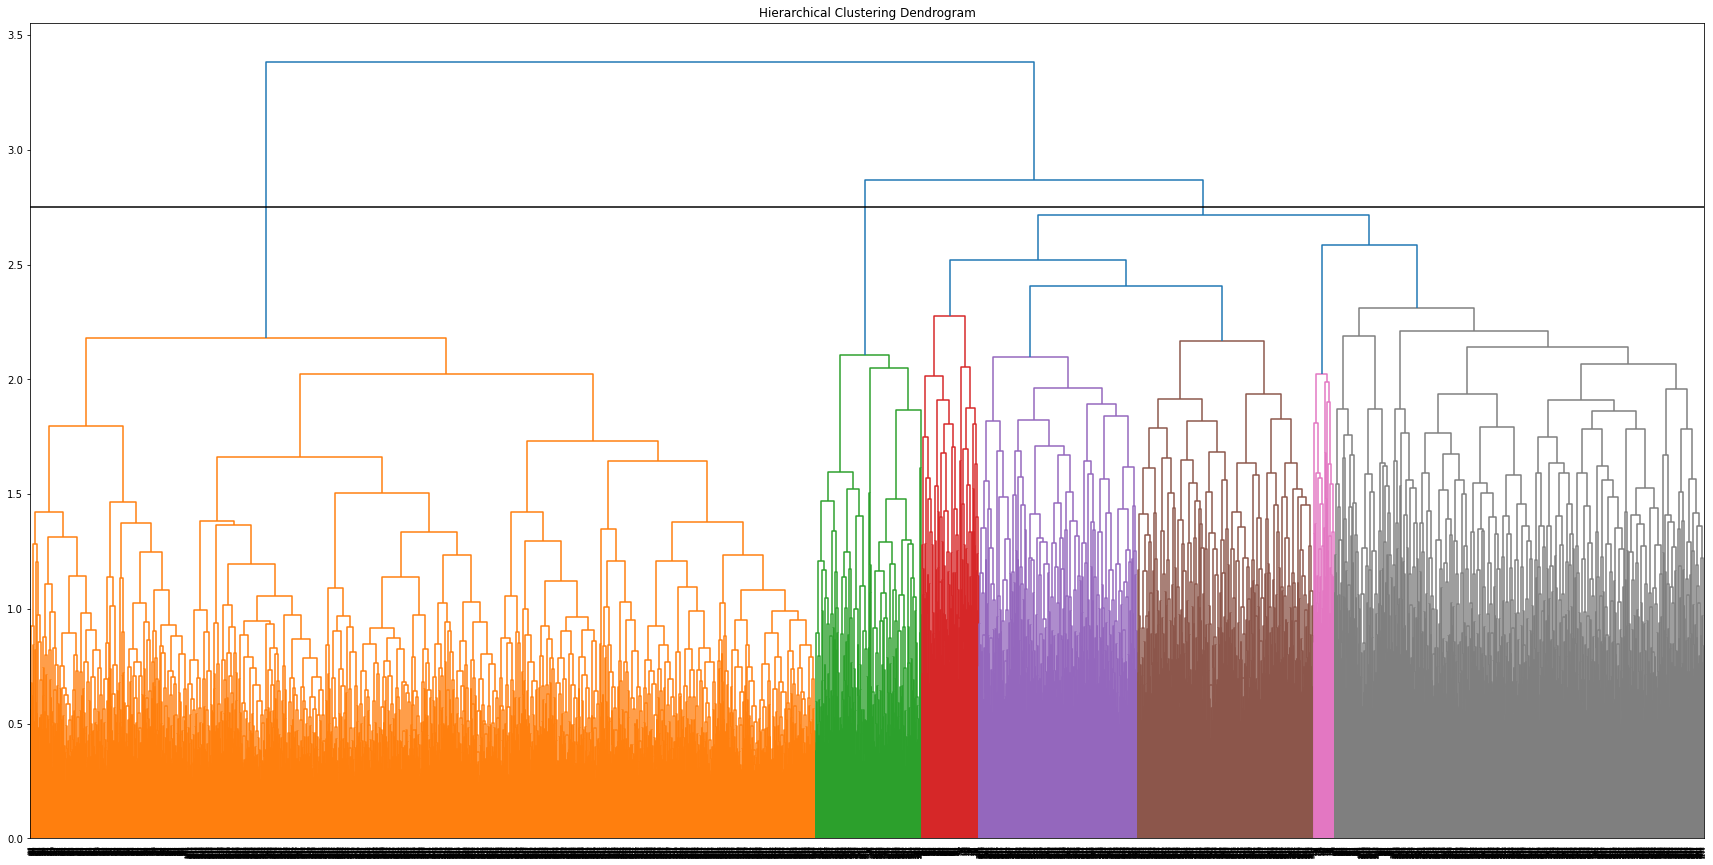

In [ ]:
plot_dendrogram(people_subset_mm_scl, linkage_method = 'complete', cut_line = 2.75)

In [ ]:
people_subset['mm_complete3'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 3
    ).fit_predict(people_subset_mm_scl)

In [ ]:
clusters_comparison(people_subset, 'mm_complete3', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
mm_complete3 0 Cluster                   0                2262   
mm_complete3 1 Cluster                2272                   0   
mm_complete3 2 Cluster                   0                   0   

                        st_ward3 2 Cluster  
mm_complete3 0 Cluster                   1  
mm_complete3 1 Cluster                   0  
mm_complete3 2 Cluster                 307

In [ ]:
groupby_mean(people_subset, 'mm_complete3')

mm_complete3                                      0            1           2
customer_gender                            0.501105     0.490317    0.521173
customer_age                              52.393725    29.517606   71.436482
kids_home                                  0.513478     0.162852    0.472313
teens_home                                 0.515687     0.000000    0.550489
number_complaints                          0.496686     0.018486    4.146580
distinct_stores_visited                    2.011047     3.009683    1.000000
spend_groceries                          617.297393  6998.608715  198.758958
spend_electronics                        610.749448  1002.705986    9.944625
typical_hour                              13.905877    18.956426   10.045603
spend_vegetables                         302.519664   402.549736  100.228013
spend_nonalcohol_drinks                  302.410959   400.469190   99.912052
spend_alcohol_drinks                     298.102961   402.982394  296.869707
spend_meat                               199.469289   699.633363   49.397394
spend_fish                               199.020327   699.194542   51.179153
spend_hygiene                             50.159965   200.338908   49.693811
spend_videogames                         199.901900   502.893926    0.000000
total_distinct_products                   58.283694   502.506162  100.566775
percentage_of_products_bought_promotion    0.100353     0.149835    0.199890
customer_loyalty                           0.050376     0.199824    0.026059
latitude                                  38.748097    38.749198   38.747452
longitude                                 -9.156920    -9.156626   -9.174034
percentage_spend_groceries                 0.209561     0.618400    0.232621
percentage_spend_electronics               0.208622     0.088581    0.011842
percentage_spend_vegetables                0.113258     0.035662    0.119083
percentage_spend_nonalcohol_drinks         0.113126     0.035484    0.118749
percentage_spend_alcohol_drinks            0.111611     0.035709    0.340331
percentage_spend_meat                      0.074316     0.062012    0.058208
percentage_spend_fish                      0.074419     0.061959    0.060109
percentage_spend_hygiene                   0.019087     0.017687    0.059057
percentage_spend_videogames                0.076001     0.044507    0.000000
customer_education                         0.391074     1.582746    0.009772

young adults | low standards | olds

---
---

### Robust

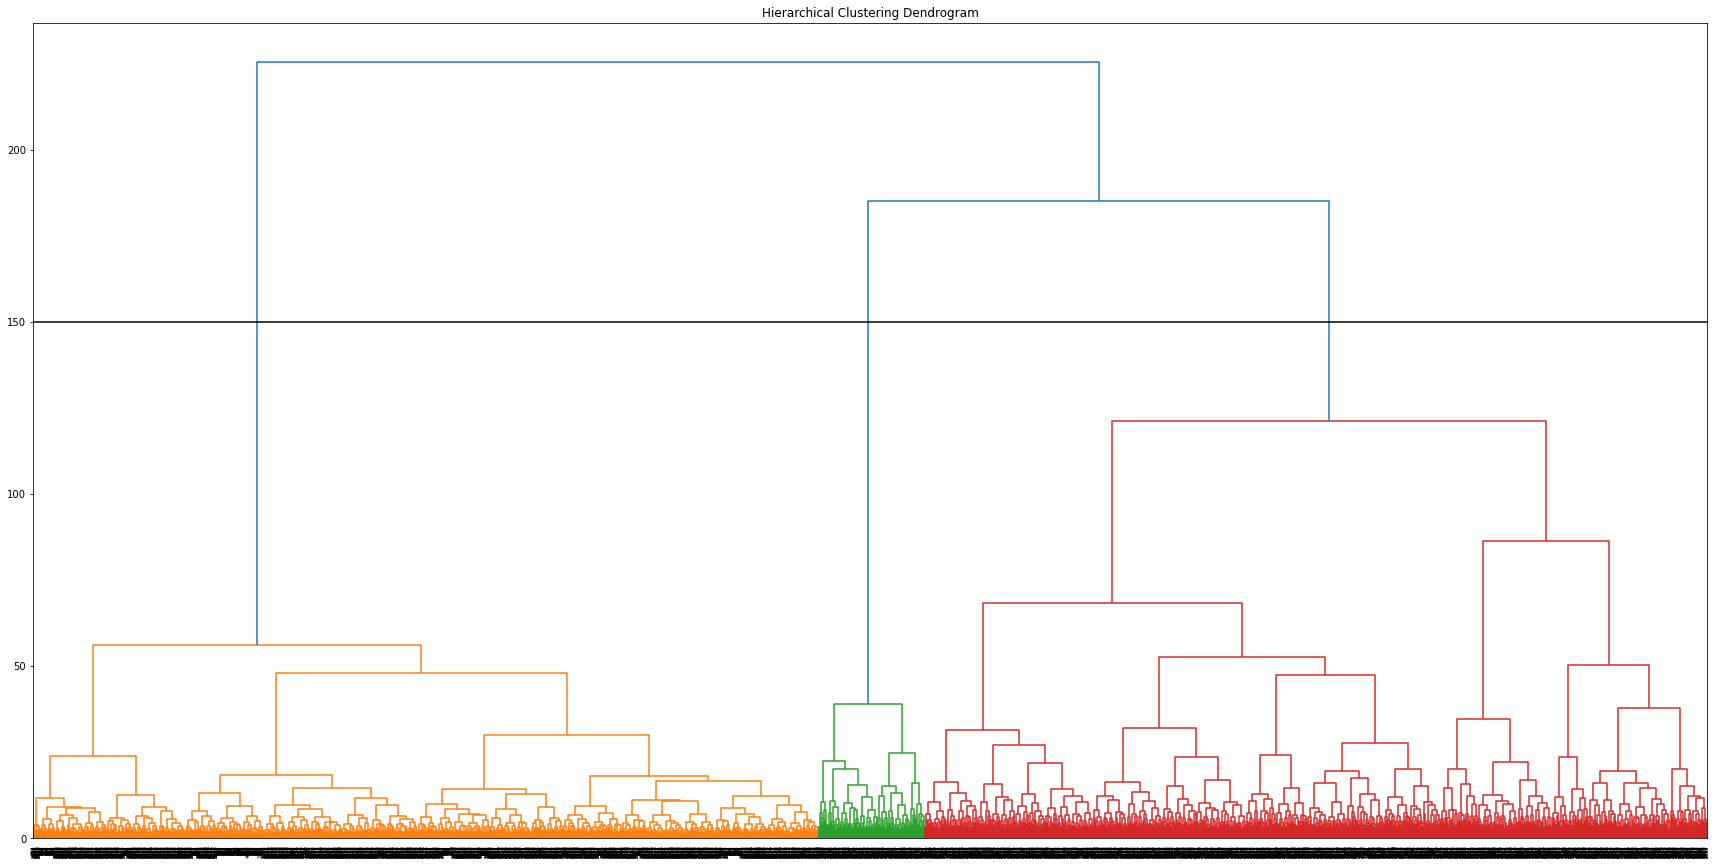

In [ ]:
plot_dendrogram(people_subset_rb_scl, linkage_method = 'ward', cut_line =  150)

In [ ]:
people_subset['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(people_subset_rb_scl)

# people_subset['rb_ward4'] = AgglomerativeClustering(
#     linkage = 'ward', n_clusters = 4
#     ).fit_predict(people_subset_rb_scl)

In [ ]:
# clusters_comparison(people_subset, 'rb_ward3', 'rb_ward4')

In [ ]:
clusters_comparison(people_subset, 'rb_ward3', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  st_ward3 2 Cluster
rb_ward3 0 Cluster                   0                2262                   0
rb_ward3 1 Cluster                2272                   0                   0
rb_ward3 2 Cluster                   0                   0                 308

In [ ]:
groupby_mean(people_subset, 'rb_ward3')

rb_ward3                                          0            1           2
customer_gender                            0.500884     0.490317    0.522727
customer_age                              52.390363    29.517606   71.399351
kids_home                                  0.513263     0.162852    0.474026
teens_home                                 0.515915     0.000000    0.548701
number_complaints                          0.496021     0.018486    4.139610
distinct_stores_visited                    2.011494     3.009683    1.000000
spend_groceries                          617.420866  6998.608715  199.211039
spend_electronics                        611.014589  1002.705986    9.948052
typical_hour                              13.907162    18.956426   10.048701
spend_vegetables                         302.609637   402.549736  100.224026
spend_nonalcohol_drinks                  302.498674   400.469190   99.925325
spend_alcohol_drinks                     298.152962   402.982394  296.506494
spend_meat                               199.534925   699.633363   49.402597
spend_fish                               199.086207   699.194542   51.175325
spend_hygiene                             50.158267   200.338908   49.707792
spend_videogames                         199.990274   502.893926    0.000000
total_distinct_products                   58.268789   502.506162  100.538961
percentage_of_products_bought_promotion    0.100307     0.149835    0.199909
customer_loyalty                           0.049956     0.199824    0.029221
latitude                                  38.748111    38.749198   38.747348
longitude                                 -9.156902    -9.156626   -9.174110
percentage_spend_groceries                 0.209486     0.618400    0.233096
percentage_spend_electronics               0.208708     0.088581    0.011844
percentage_spend_vegetables                0.113259     0.035662    0.119057
percentage_spend_nonalcohol_drinks         0.113124     0.035484    0.118742
percentage_spend_alcohol_drinks            0.111569     0.035709    0.339900
percentage_spend_meat                      0.074324     0.062012    0.058205
percentage_spend_fish                      0.074427     0.061959    0.060095
percentage_spend_hygiene                   0.019068     0.017687    0.059062
percentage_spend_videogames                0.076035     0.044507    0.000000
customer_education                         0.389920     1.582746    0.019481

young adults | low standards | olds

---

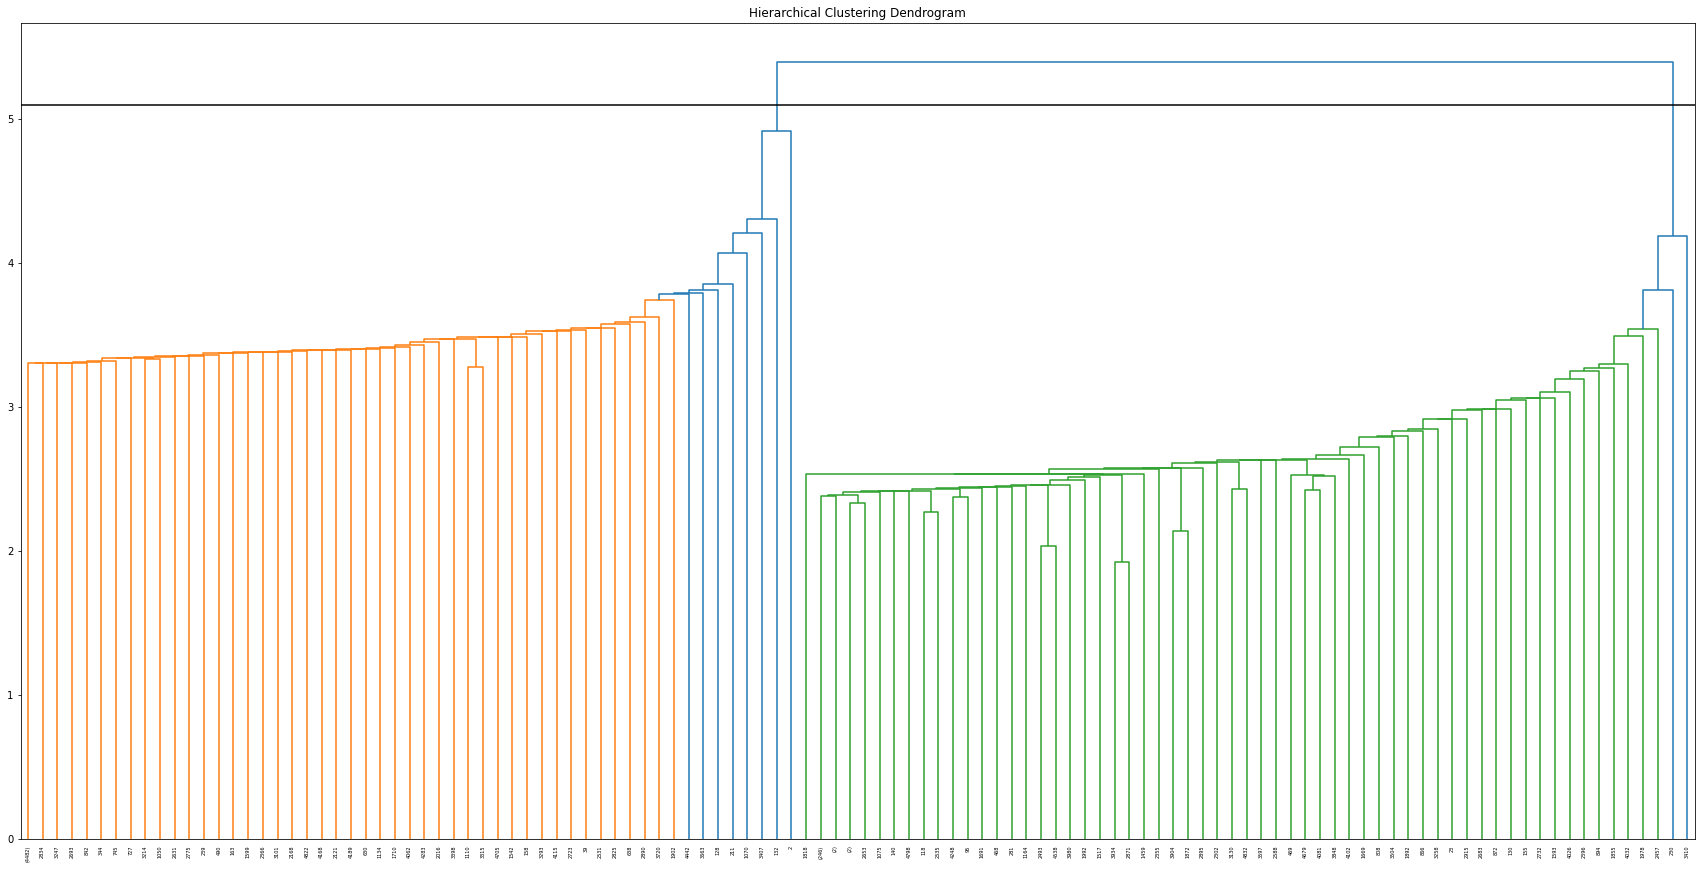

In [ ]:
plot_dendrogram(people_subset_rb_scl, linkage_method = 'single', cut_line = 5.1)

In [ ]:
people_subset['rb_single2'] = AgglomerativeClustering(
    linkage = 'single', n_clusters = 2
    ).fit_predict(people_subset_rb_scl)

In [ ]:
clusters_comparison(people_subset, 'rb_single2', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
rb_single2 0 Cluster                2272                2262   
rb_single2 1 Cluster                   0                   0   

                      st_ward3 2 Cluster  
rb_single2 0 Cluster                   0  
rb_single2 1 Cluster                 308

In [ ]:
groupby_mean(people_subset, 'rb_single2')

rb_single2                                         0           1
customer_gender                             0.495589    0.522727
customer_age                               40.928760   71.399351
kids_home                                   0.337671    0.474026
teens_home                                  0.257389    0.548701
number_complaints                           0.256727    4.139610
distinct_stores_visited                     2.511689    1.000000
spend_groceries                          3815.051831  199.211039
spend_electronics                         807.292236    9.948052
typical_hour                               16.437362   10.048701
spend_vegetables                          352.689899  100.224026
spend_nonalcohol_drinks                   351.591972   99.925325
spend_alcohol_drinks                      350.683282  296.506494
spend_meat                                450.135642   49.402597
spend_fish                                449.691884   51.175325
spend_hygiene                             125.414204   49.707792
spend_videogames                          351.776136    0.000000
total_distinct_products                   280.877371  100.538961
percentage_of_products_bought_promotion     0.125126    0.199909
customer_loyalty                            0.125055    0.029221
latitude                                   38.748656   38.747348
longitude                                  -9.156764   -9.174110
percentage_spend_groceries                  0.414394    0.233096
percentage_spend_electronics                0.148512    0.011844
percentage_spend_vegetables                 0.074375    0.119057
percentage_spend_nonalcohol_drinks          0.074218    0.118742
percentage_spend_alcohol_drinks             0.073555    0.339900
percentage_spend_meat                       0.068154    0.058205
percentage_spend_fish                       0.068179    0.060095
percentage_spend_hygiene                    0.018376    0.059062
percentage_spend_videogames                 0.060236    0.000000
customer_education                          0.987649    0.019481

olds | young adults & low standards

---

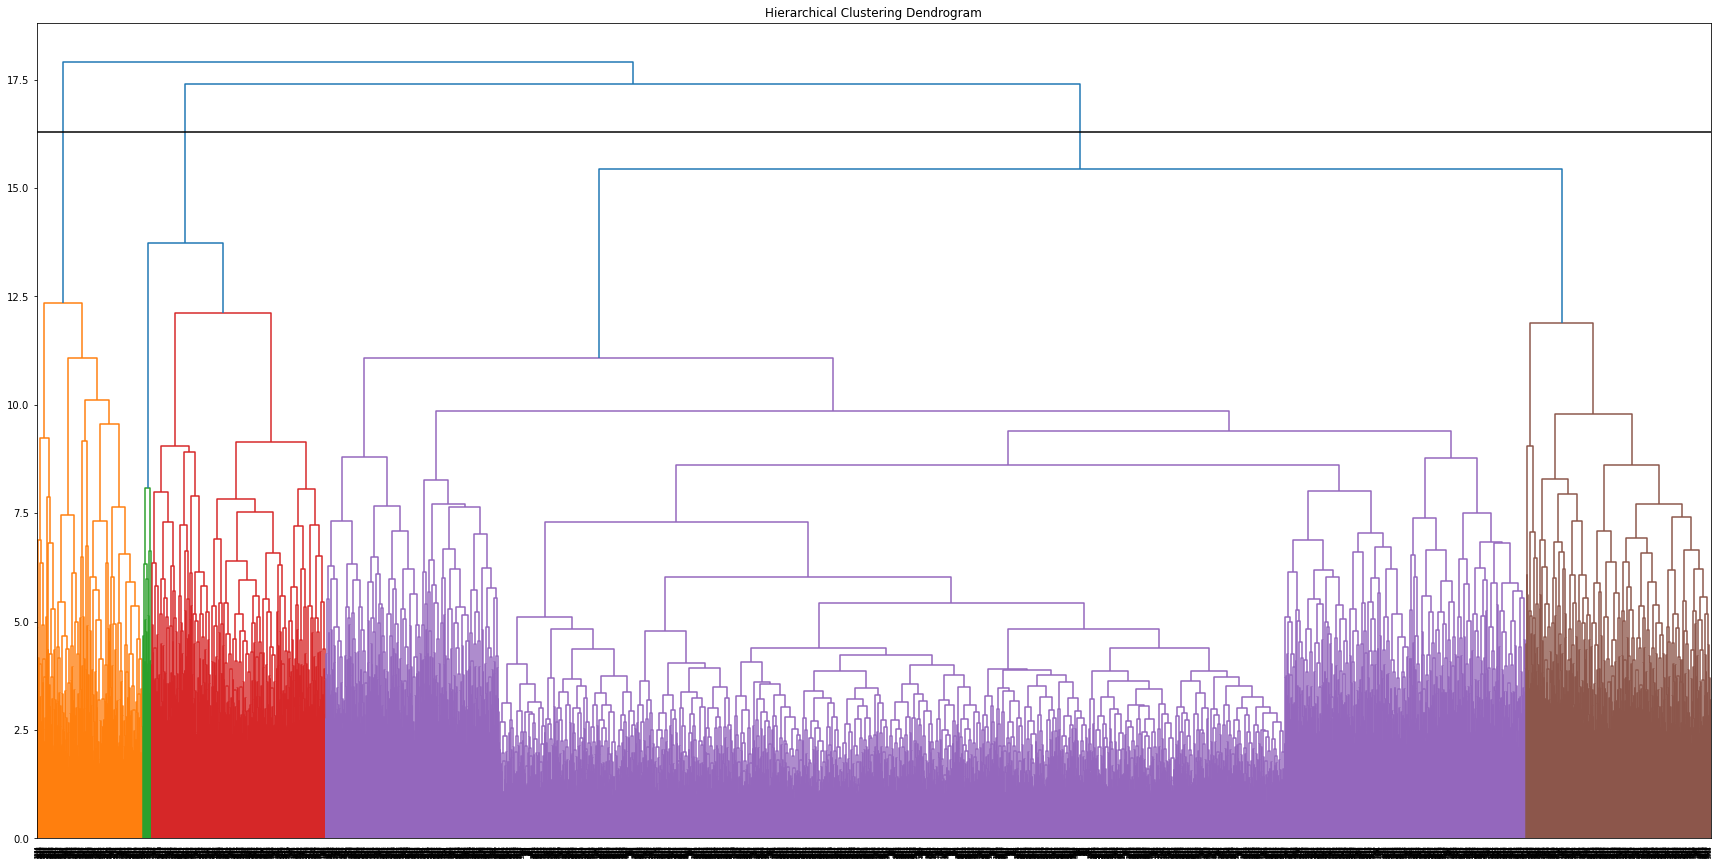

In [ ]:
plot_dendrogram(people_subset_rb_scl, linkage_method = 'complete', cut_line = 16.3)

In [ ]:
people_subset['rb_complete3'] = AgglomerativeClustering(
    linkage = 'complete', n_clusters = 3
    ).fit_predict(people_subset_rb_scl)

In [ ]:
clusters_comparison(people_subset, 'rb_complete3', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
rb_complete3 0 Cluster                2272                1733   
rb_complete3 1 Cluster                   0                   0   
rb_complete3 2 Cluster                   0                 529   

                        st_ward3 2 Cluster  
rb_complete3 0 Cluster                   0  
rb_complete3 1 Cluster                 308  
rb_complete3 2 Cluster                   0

In [ ]:
groupby_mean(people_subset, 'rb_complete3')

rb_complete3                                       0           1           2
customer_gender                             0.494881    0.522727    0.500945
customer_age                               39.541323   71.399351   51.432892
kids_home                                   0.313358    0.474026    0.521739
teens_home                                  0.229213    0.548701    0.470699
number_complaints                           0.227216    4.139610    0.480151
distinct_stores_visited                     2.585268    1.000000    1.954631
spend_groceries                          4262.449438  199.211039  427.854442
spend_electronics                         861.850687    9.948052  394.236295
typical_hour                               16.751311   10.048701   14.060491
spend_vegetables                          362.403496  100.224026  279.149338
spend_nonalcohol_drinks                   360.854931   99.925325  281.463138
spend_alcohol_drinks                      360.705368  296.506494  274.807183
spend_meat                                483.482147   49.402597  197.672968
spend_fish                                470.648939   51.175325  291.028355
spend_hygiene                             135.376030   49.707792   49.994329
spend_videogames                          371.842447    0.000000  199.856333
total_distinct_products                   310.511860  100.538961   56.517958
percentage_of_products_bought_promotion     0.128496    0.199909    0.099607
customer_loyalty                            0.135331    0.029221    0.047259
latitude                                   38.748723   38.747348   38.748144
longitude                                  -9.156570   -9.174110   -9.158229
percentage_spend_groceries                  0.447005    0.233096    0.167504
percentage_spend_electronics                0.147143    0.011844    0.158882
percentage_spend_vegetables                 0.068363    0.119057    0.119889
percentage_spend_nonalcohol_drinks          0.068123    0.118742    0.120362
percentage_spend_alcohol_drinks             0.067673    0.339900    0.118087
percentage_spend_meat                       0.066160    0.058205    0.083252
percentage_spend_fish                       0.060856    0.060095    0.123618
percentage_spend_hygiene                    0.017937    0.059062    0.021702
percentage_spend_videogames                 0.056740    0.000000    0.086705
customer_education                          1.061673    0.019481    0.427221

olds | young adults & low standards(??) | 246

---

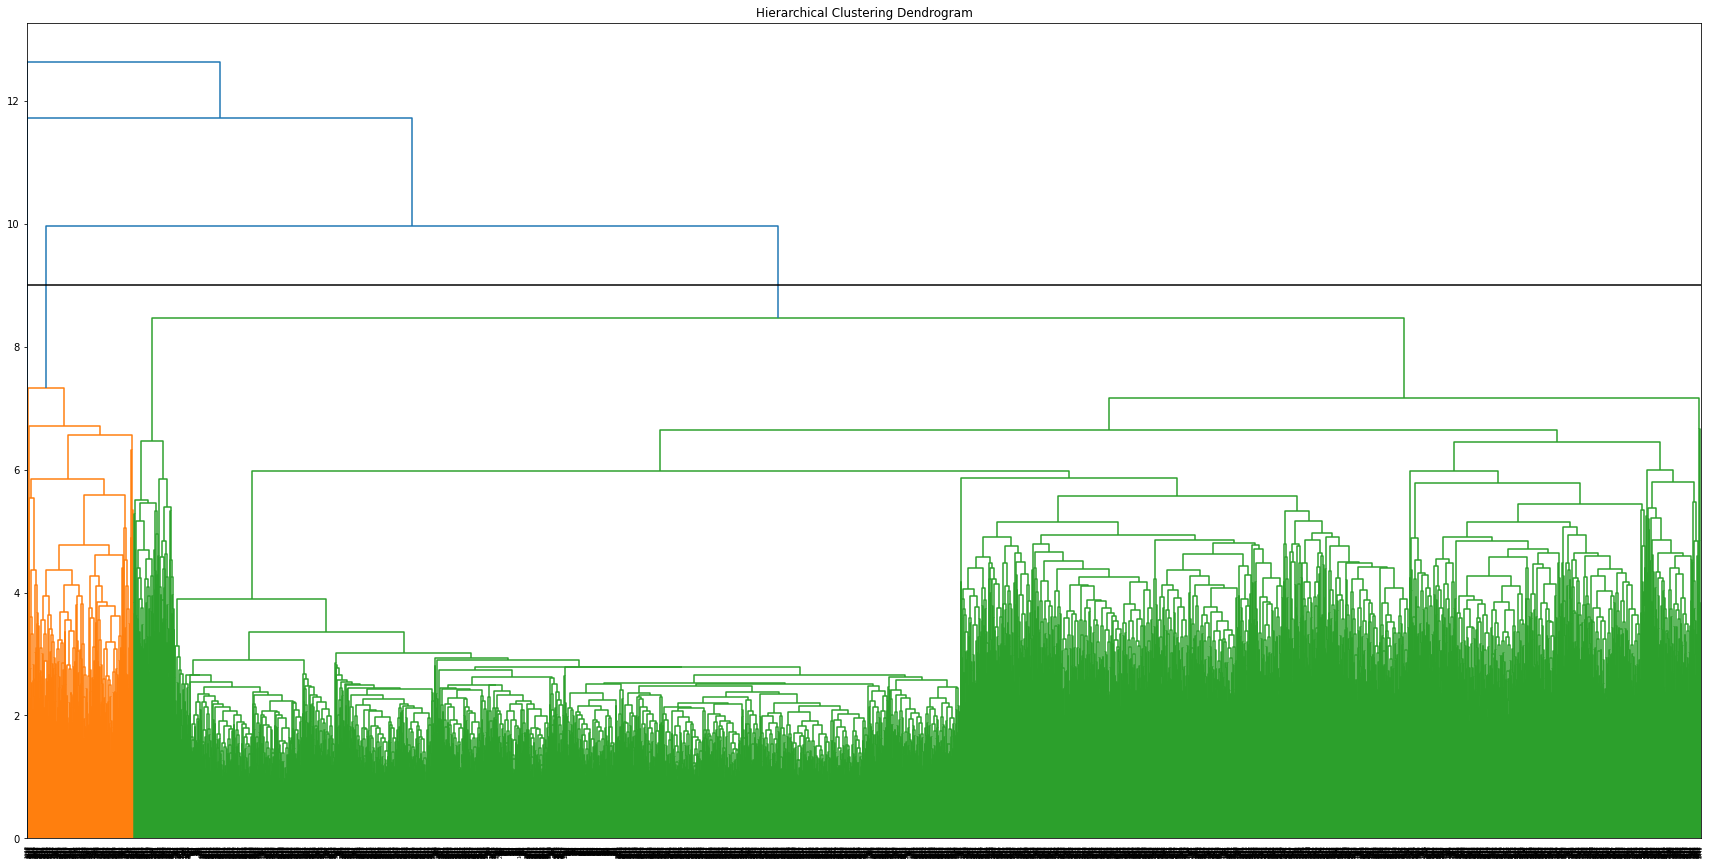

In [ ]:
plot_dendrogram(people_subset_rb_scl, linkage_method = 'average', cut_line = 9)

In [ ]:
people_subset['rb_average4'] = AgglomerativeClustering(
    linkage = 'average', n_clusters = 4
    ).fit_predict(people_subset_rb_scl)

In [ ]:
clusters_comparison(people_subset, 'rb_average4', 'st_ward3')

st_ward3 0 Cluster  st_ward3 1 Cluster  \
rb_average4 0 Cluster                2272                2260   
rb_average4 1 Cluster                   0                   0   
rb_average4 2 Cluster                   0                   1   
rb_average4 3 Cluster                   0                   1   

                       st_ward3 2 Cluster  
rb_average4 0 Cluster                   0  
rb_average4 1 Cluster                 308  
rb_average4 2 Cluster                   0  
rb_average4 3 Cluster                   0

In [ ]:
groupby_mean(people_subset, 'rb_average4')

rb_average4                                        0           1           2  \
customer_gender                             0.495587    0.522727    0.000000   
customer_age                               40.923213   71.399351   75.000000   
kids_home                                   0.337599    0.474026    0.000000   
teens_home                                  0.257061    0.548701    1.000000   
number_complaints                           0.256399    4.139610    1.000000   
distinct_stores_visited                     2.511915    1.000000    2.000000   
spend_groceries                          3816.663063  199.211039   82.000000   
spend_electronics                         807.557149    9.948052  317.000000   
typical_hour                               16.440424   10.048701   12.000000   
spend_vegetables                          352.810459  100.224026   32.000000   
spend_nonalcohol_drinks                   351.670344   99.925325  270.000000   
spend_alcohol_drinks                      350.746470  296.506494  199.000000   
spend_meat                                450.185128   49.402597  349.000000   
spend_fish                                449.807811   51.175325   29.000000   
spend_hygiene                             125.444837   49.707792   54.000000   
spend_videogames                          351.843778    0.000000  202.000000   
total_distinct_products                   280.956531  100.538961  125.000000   
percentage_of_products_bought_promotion     0.125137    0.199909    0.074291   
customer_loyalty                            0.124890    0.029221    0.000000   
latitude                                   38.748663   38.747348   38.748213   
longitude                                  -9.156755   -9.174110   -9.192717   
percentage_spend_groceries                  0.414533    0.233096    0.053455   
percentage_spend_electronics                0.148520    0.011844    0.206649   
percentage_spend_vegetables                 0.074387    0.119057    0.020860   
percentage_spend_nonalcohol_drinks          0.074202    0.118742    0.176010   
percentage_spend_alcohol_drinks             0.073531    0.339900    0.129726   
percentage_spend_meat                       0.068091    0.058205    0.227510   
percentage_spend_fish                       0.068160    0.060095    0.018905   
percentage_spend_hygiene                    0.018369    0.059062    0.035202   
percentage_spend_videogames                 0.060208    0.000000    0.131682   
customer_education                          0.987423    0.019481    0.000000   

rb_average4                                       3  
customer_gender                            1.000000  
customer_age                              32.000000  
kids_home                                  1.000000  
teens_home                                 1.000000  
number_complaints                          1.000000  
distinct_stores_visited                    2.000000  
spend_groceries                          246.000000  
spend_electronics                         97.000000  
typical_hour                               7.000000  
spend_vegetables                         127.000000  
spend_nonalcohol_drinks                   78.000000  
spend_alcohol_drinks                     216.000000  
spend_meat                               327.000000  
spend_fish                               345.000000  
spend_hygiene                             58.000000  
spend_videogames                         195.000000  
total_distinct_products                   78.000000  
percentage_of_products_bought_promotion    0.123454  
customer_loyalty                           1.000000  
latitude                                  38.716784  
longitude                                 -9.158155  
percentage_spend_groceries                 0.145648  
percentage_spend_electronics               0.057430  
percentage_spend_vegetables                0.075192  
percentage_spend_nonalcohol_drinks         0.046181  
percentage_spend_alcohol_drinks    

young adults | olds | low standards(-7) | 7

---
---

## Final solution

In [ ]:
low_standards = people_subset[people_subset['st_ward3'] == 1] #2262
olds = people_subset[people_subset['st_ward3'] == 2] #308

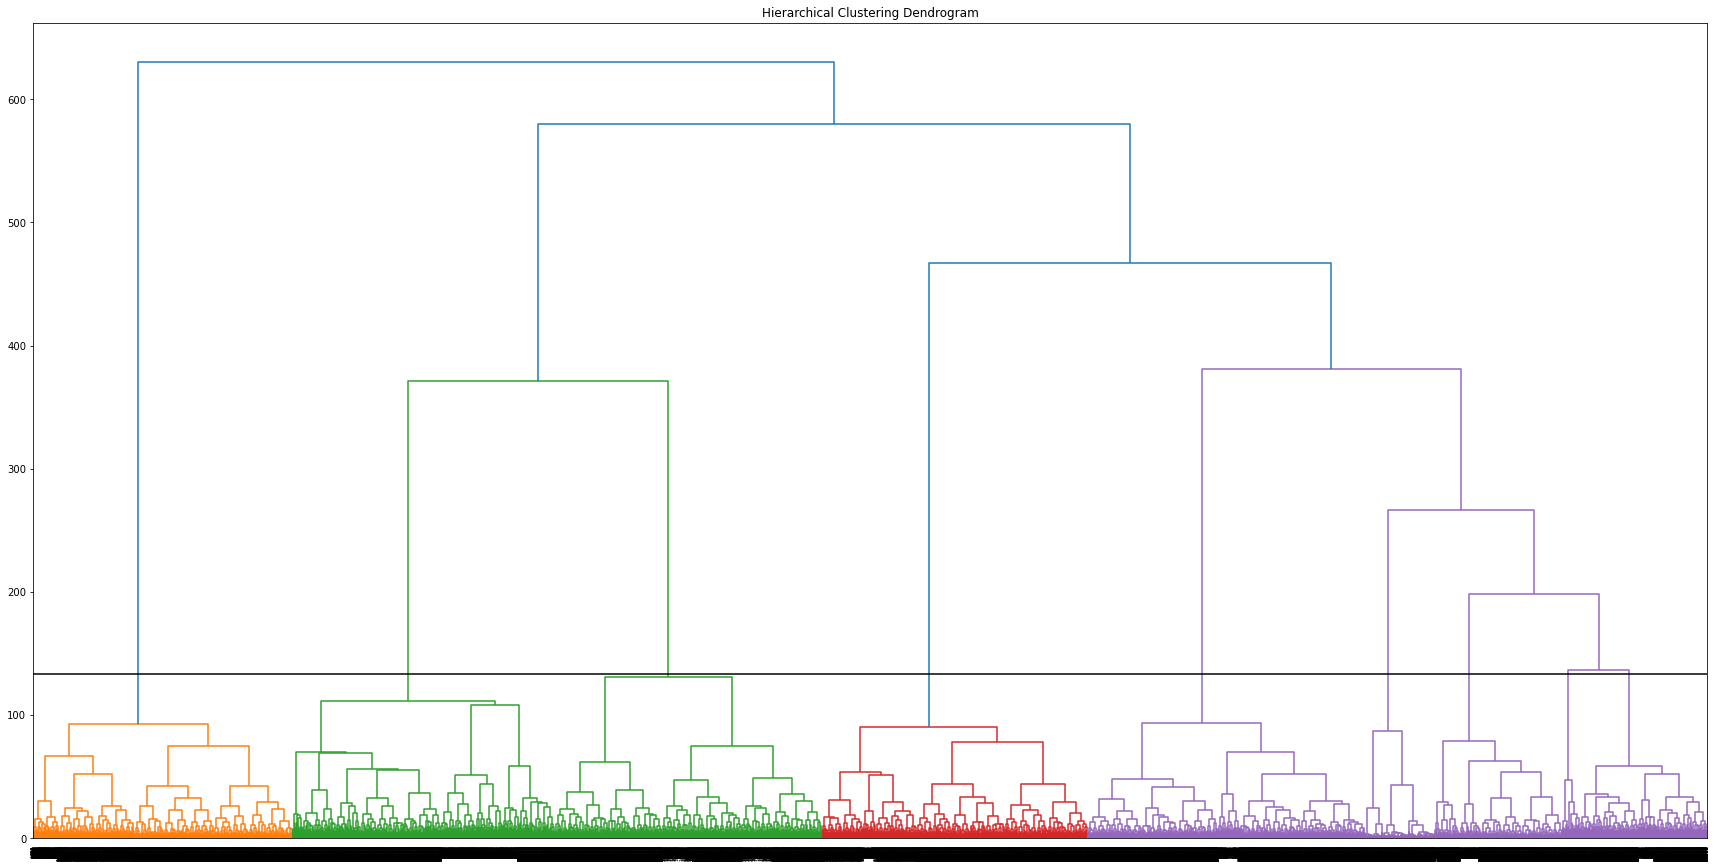

In [ ]:
plot_dendrogram(people_st_scl, 'ward', cut_line = 133)

Increasing the number of clusters from 8 to 9 using the standard scaler and the hierarchical clustering Ward's methods, low standards and olds are separated.

In [ ]:
people['st_ward9'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 9
    ).fit_predict(people_st_scl)

In [ ]:
groupby_mean(people, 'st_ward9')

st_ward9                                            0           1  \
customer_gender                              0.500210    0.508433   
customer_age                                56.219563   55.883763   
kids_home                                    0.997901    1.000203   
teens_home                                   0.271620    0.069904   
number_complaints                            1.551008    1.010567   
distinct_stores_visited                      7.999580   20.001829   
spend_groceries                          14993.307935  302.959764   
spend_electronics                          199.970403   20.000000   
typical_hour                                11.914568    8.991668   
spend_vegetables                           799.560034  300.231863   
spend_nonalcohol_drinks                    900.786104  300.431823   
spend_alcohol_drinks                       599.145886  199.776671   
spend_meat                                1501.016583  151.107702   
spend_fish                                1498.781276  149.465962   
spend_hygiene                              199.985306   50.032514   
spend_videogames                            50.012804    5.000000   
total_distinct_products                   4011.462636  499.575493   
percentage_of_products_bought_promotion      0.149955    0.499966   
customer_loyalty                             0.599916    0.049990   
latitude                                    38.747749   38.747834   
longitude                                   -9.157703   -9.157208   
percentage_spend_groceries                   0.722259    0.197824   
percentage_spend_electronics                 0.009665    0.013706   
percentage_spend_vegetables                  0.038626    0.204999   
percentage_spend_nonalcohol_drinks           0.043512    0.205122   
percentage_spend_alcohol_drinks              0.028935    0.136196   
percentage_spend_meat                        0.072525    0.102781   
percentage_spend_fish                        0.072418    0.101698   
percentage_spend_hygiene                     0.009642    0.034247   
percentage_spend_videogames                  0.002417    0.003427   
customer_education                           0.701511    0.198537   

st_ward9                                           2            3  \
customer_gender                             0.499893     0.509530   
customer_age                               56.162846    55.980940   
kids_home                                   3.078852     1.160525   
teens_home                                  1.811656     0.771495   
number_complaints                           0.933576     0.310885   
distinct_stores_visited                     3.007285     2.000212   
spend_groceries                          4997.018856   997.551461   
spend_electronics                         200.006642    50.036637   
typical_hour                               17.401971     9.988564   
spend_vegetables                          602.098779  1499.739094   
spend_nonalcohol_drinks                   900.787872    20.005294   
spend_alcohol_drinks                      500.900364    20.117535   
spend_meat                               1100.662738     0.000000   
spend_fish                               1101.494750     0.000000   
spend_hygiene                             500.748018   100.033037   
spend_videogames                          997.704307    49.929691   
total_distinct_products                  2001.371759   199.708598   
percentage_of_products_bought_promotion     0.200119     0.049988   
customer_loyalty                            0.299979     0.049979   
latitude                                   38.749548    38.748634   
longitude                                  -9.157408    -9.157192   
percentage_spend_groceries                  0.458474     0.360987   
percentage_spend_electronics                0.018360     0.018380   
percentage_spend_vegetables                 0.055201     0.550838   
percentage_spend_nonalcohol_drinks          0.082623     0.007344 

In [ ]:
people['rb_ward9'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 9
    ).fit_predict(people_rb_scl)

In [ ]:
clusters_comparison(people, 'st_ward9', 'rb_ward9')

rb_ward9 0 Cluster  rb_ward9 1 Cluster  \
st_ward9 0 Cluster                   0                   0   
st_ward9 1 Cluster                   0                   0   
st_ward9 2 Cluster                4667                   0   
st_ward9 3 Cluster                   0                4722   
st_ward9 4 Cluster                   0                   0   
st_ward9 5 Cluster                   0                   0   
st_ward9 6 Cluster                   0                   0   
st_ward9 7 Cluster                   0                   0   
st_ward9 8 Cluster                   0                   0   

                    rb_ward9 2 Cluster  rb_ward9 3 Cluster  \
st_ward9 0 Cluster                   0                   0   
st_ward9 1 Cluster                   0                   0   
st_ward9 2 Cluster                   0                   0   
st_ward9 3 Cluster                   0                   0   
st_ward9 4 Cluster                   0                   0   
st_ward9 5 Cluster                2262                   0   
st_ward9 6 Cluster                   0                   0   
st_ward9 7 Cluster                   0                2272   
st_ward9 8 Cluster                   0                   0   

                    rb_ward9 4 Cluster  rb_ward9 5 Cluster  \
st_ward9 0 Cluster                   0                   0   
st_ward9 1 Cluster                4921                   0   
st_ward9 2 Cluster                   0                   0   
st_ward9 3 Cluster                   0                   0   
st_ward9 4 Cluster                   0                   0   
st_ward9 5 Cluster                   0                   0   
st_ward9 6 Cluster                   0                1248   
st_ward9 7 Cluster                   0                   0   
st_ward9 8 Cluster                   0                   0   

                    rb_ward9 6 Cluster  rb_ward9 7 Cluster  rb_ward9 8 Cluster  
st_ward9 0 Cluster                4764                   0                   0  
st_ward9 1 Cluster                   0                   0                   0  
st_ward9 2 Cluster                   0                   0                   0  
st_ward9 3 Cluster                   0                   0                   0  
st_ward9 4 Cluster                   0                4610                   0  
st_ward9 5 Cluster                   0                   0                   0  
st_ward9 6 Cluster                   0                   0                   0  
st_ward9 7 Cluster                   0                   0                   0  
st_ward9 8 Cluster                   0                   0                 308

In [ ]:
# Define the mapping from values to categories
clusters_mapping = {
    0: 'spenders',
    1: 'promo hunters',
    2: 'parents',
    3: 'veggies',
    4: 'gamers',
    5: 'low standards',
    6: 'alcoholics',
    7: 'young adults',
    8: 'olds'
}

# Create a new variable based on the existing variable
people['cluster'] = [clusters_mapping[value] for value in people['st_ward9']]

### UMAP

In [ ]:
umap_object = umap.UMAP(n_neighbors = 15, min_dist = 0.3, random_state = 42)

In [ ]:
umap_embedding = umap_object.fit_transform(people_no_scl)

c:\Users\Afonso Cadete\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

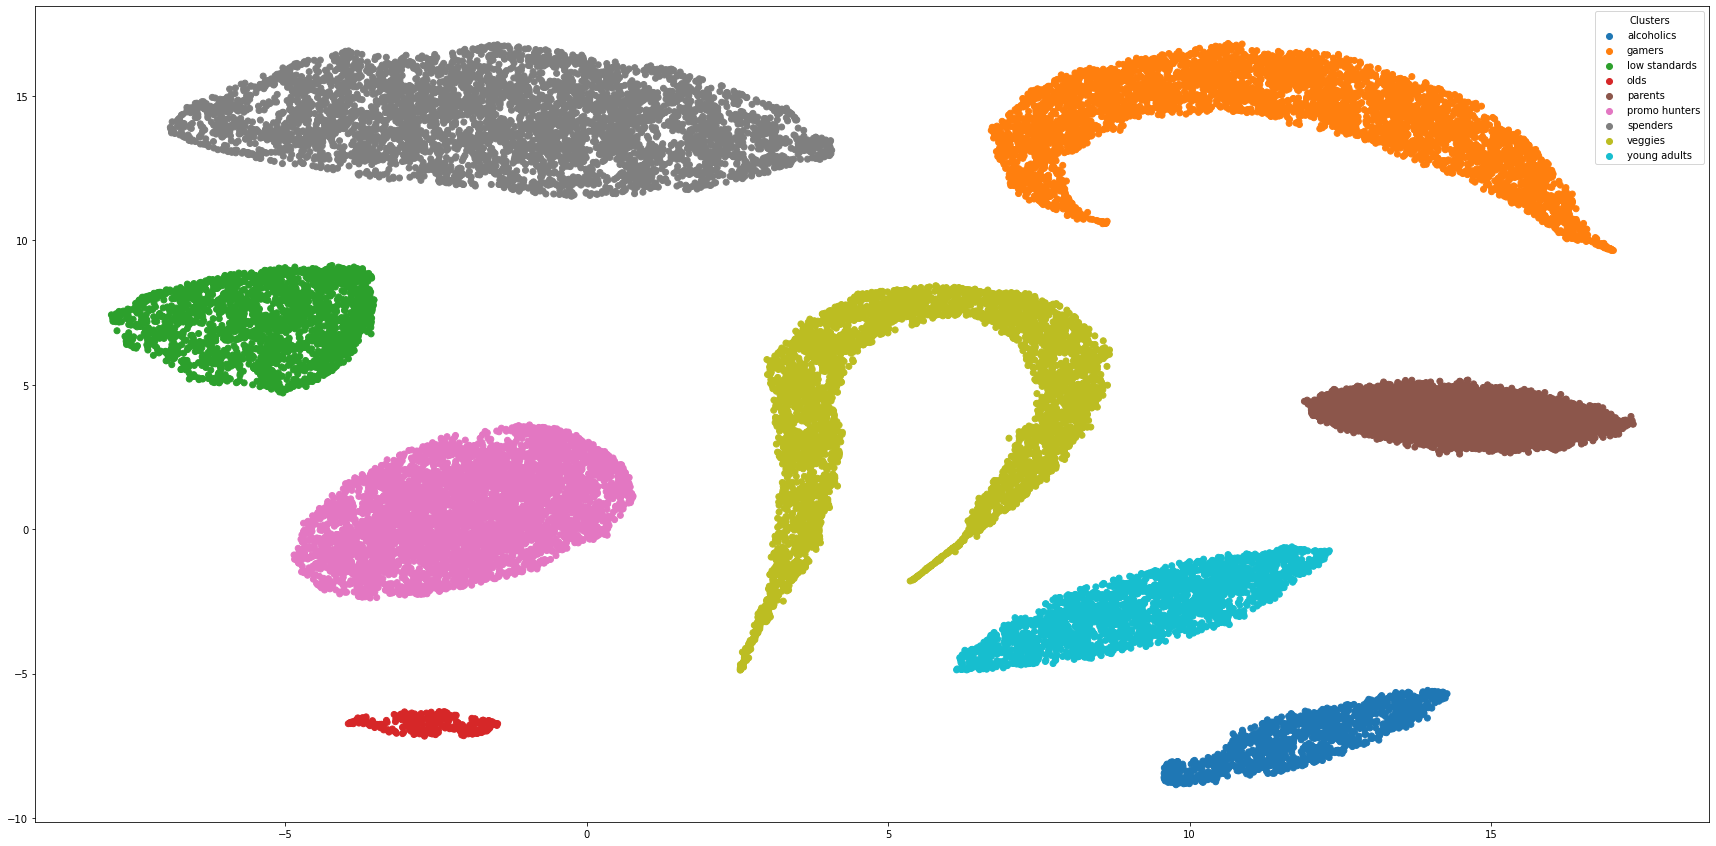

In [ ]:
visualize_dimensionality_reduction(umap_embedding, people['cluster'])

### Clusters exploration

### Solution dataframe

In [ ]:
solution['cluster_id'] = people['st_ward9'].copy()
solution['cluster'] = people['cluster'].copy()
solution['cluster_id'] = solution['cluster_id'].fillna(9)
solution['cluster'] = solution['cluster'].fillna('supermarket')

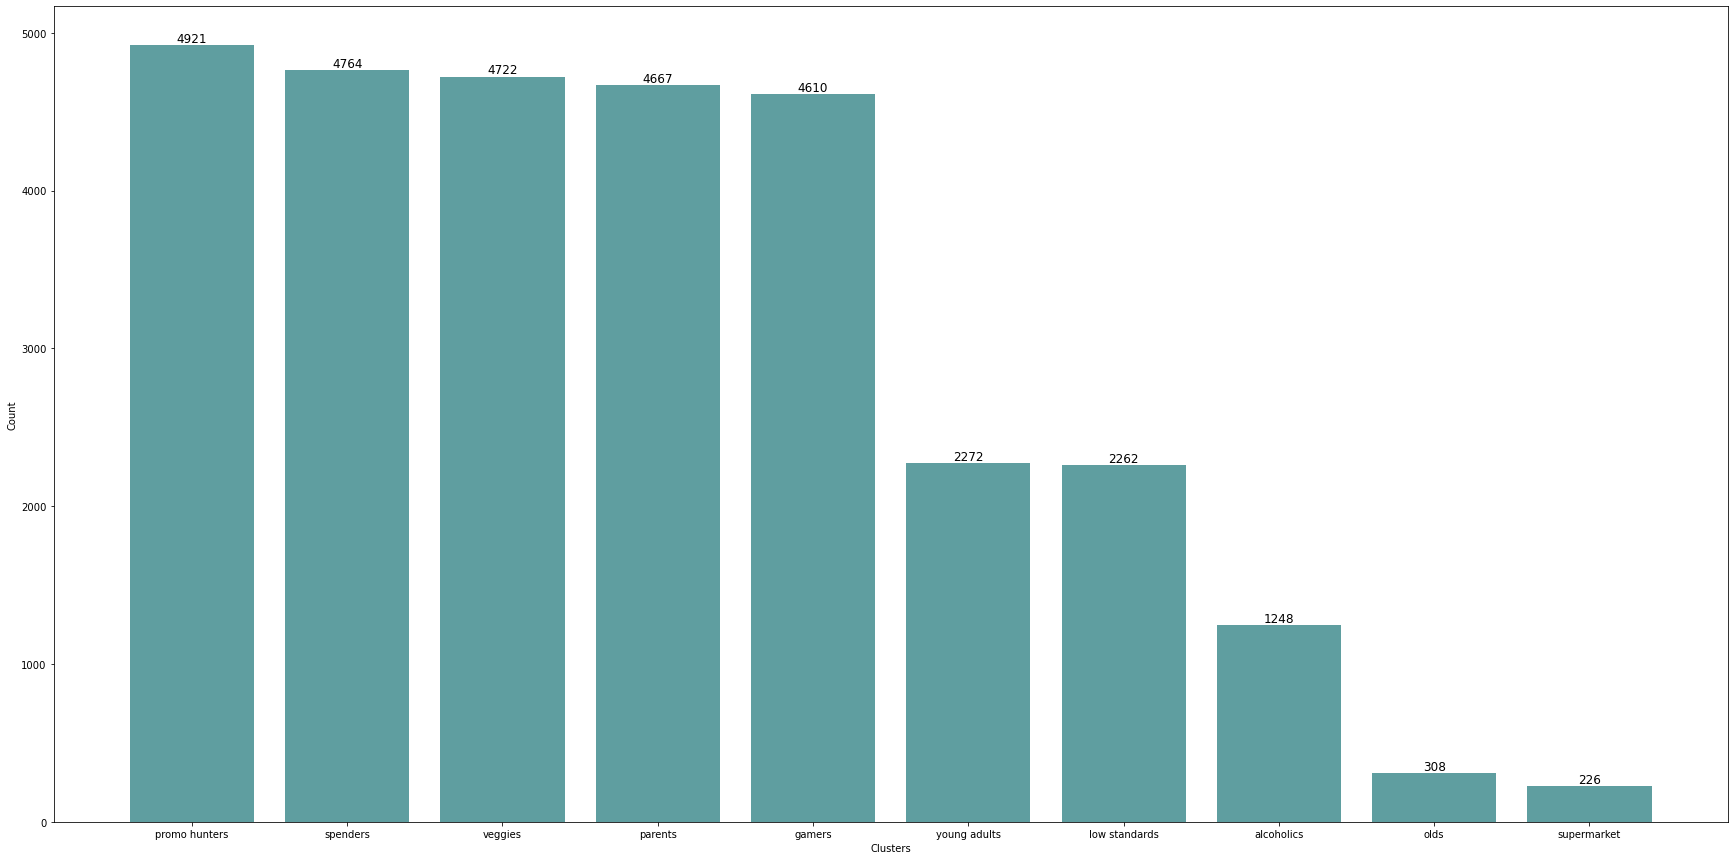

In [ ]:
fig, ax = plt.subplots()
plot_bar_chart(ax, solution, 'cluster', 'Clusters', annotate = True)

# Exports

In [ ]:
# clusters
gamers.to_csv(path + 'gamers.csv')
spenders.to_csv(path + 'spenders.csv')
veggies.to_csv(path + 'veggies.csv')
promo_hunters.to_csv(path + 'promo_hunters.csv')
alcoholics.to_csv(path + 'alcoholics.csv')
parents.to_csv(path + 'parents.csv')
young_adults.to_csv(path + 'young_adults.csv')
low_standards.to_csv(path + 'low_standards.csv')
olds.to_csv(path + 'olds.csv')

# dataframe
solution.to_csv(path + 'solution.csv')